# Import cleaned 2024 Turkish scraped Used Card data
# "2024_turkey_car_market_ML.csv" as "df_2024"

In [2]:
df_2024.columns

Index(['Ad Date', 'Make', 'Model', 'Package', 'Year', 'Kilometers (km)',
       'Transmission', 'Fuel Type', 'Body Type', 'Color', 'Engine Size (cc)',
       'Engine Power (hp)', 'Avg. Fuel Consumption (L/100km)',
       'Fuel Tank Size (L)', 'From', 'Price', 'Link', 'Ad Number', 'Page',
       'Traction', 'Scraped Date', 'Price USD', 'Car Age (Years)',
       'Make_Model', 'ML Price USD', 'ML Test Max Error',
       'ML Test Max Error Percent', 'ML MakeModel value count'],
      dtype='object')

In [6]:
import joblib

# Load Renault Clio model
model_path = 'MakeModel/Renault_Clio_model.pkl'
scaler_path = 'MakeModel/Renault_Clio_scaler.pkl'
encoder_path = 'MakeModel/onehot_encoder.pkl'

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
encoder = joblib.load(encoder_path)

# Get the columns required by the model as all models require the same columns
required_columns = scaler.feature_names_in_

print("Required columns by the model:")
print(required_columns)

Required columns by the model:
['Kilometers (km)' 'Car Age (Years)' 'Engine Size (cc)'
 'Engine Power (hp)' 'Transmission_Manual' 'Transmission_Semi-Automatic'
 'Fuel Type_Electric' 'Fuel Type_Gasoline' 'Fuel Type_Hybrid'
 'Fuel Type_LPG and Gasoline' 'Body Type_Cabrio' 'Body Type_Coupe'
 'Body Type_Crossover' 'Body Type_Glass Van' 'Body Type_Half Glass Van'
 'Body Type_Hard top' 'Body Type_Hatchback/3' 'Body Type_Hatchback/5'
 'Body Type_MPV' 'Body Type_Minibus' 'Body Type_Panel Van'
 'Body Type_Pick-up' 'Body Type_Refrigerated Panel Van'
 'Body Type_Roadster' 'Body Type_SUV' 'Body Type_Sedan'
 'Body Type_Station wagon' 'Color_Black' 'Color_Blue' 'Color_Brown'
 'Color_Champagne' 'Color_Dark Red' 'Color_Gold' 'Color_Gray'
 'Color_Green' 'Color_Metallic Blue' 'Color_Metallic Gray'
 'Color_Metallic Green' 'Color_Navy Blue' 'Color_Orange' 'Color_Pink'
 'Color_Purple' 'Color_Red' 'Color_Silver' 'Color_Smoke'
 'Color_Titanium Gray' 'Color_Turquoise' 'Color_White' 'Color_Yellow'
 'Traction_4

Let's estimate your car's value. Please enter:

Available makes: Alfa Romeo (212), Audi (1891), BMW (2670), Bentley (8), Chery (5), Chevrolet (1356), Citroen (2311), Dacia (1156), Ferrari (4), Fiat (7126), Ford (5401), GMC (1), Honda (2727), Hyundai (3963), Isuzu (2), Jaguar (58), Jeep (3), Kia (949), Lada (333), Land Rover (9), Lincoln (1), MINI (159), Maserati (21), Mazda (398), Mercedes (2292), Mitsubishi (302), Nissan (727), Opel (5788), Peugeot (2994), Porsche (74), Renault (8961), Rolls-Royce (3), Rover (85), Seat (1782), Skoda (2139), Smart (1), Subaru (57), Suzuki (251), Tata (110), Tofaş (2240), Toyota (2938), Volkswagen (8678), Volvo (662)
Make: fiat
Corrected Make: Fiat

Available models for Fiat: 124 Spider (1), 500 (37), Albea (156), Brava (18), Bravo (26), Doblo (32), Ducato (1), Egea (2325), Egea Cross (8), Fiorino (45), Freemont (1), Idea (2), Linea (2302), Marea (46), Palio (929), Panda (19), Punto (890), Siena (40), Stilo (17), Tempra (63), Tipo (75), Uno (93)
Model: 

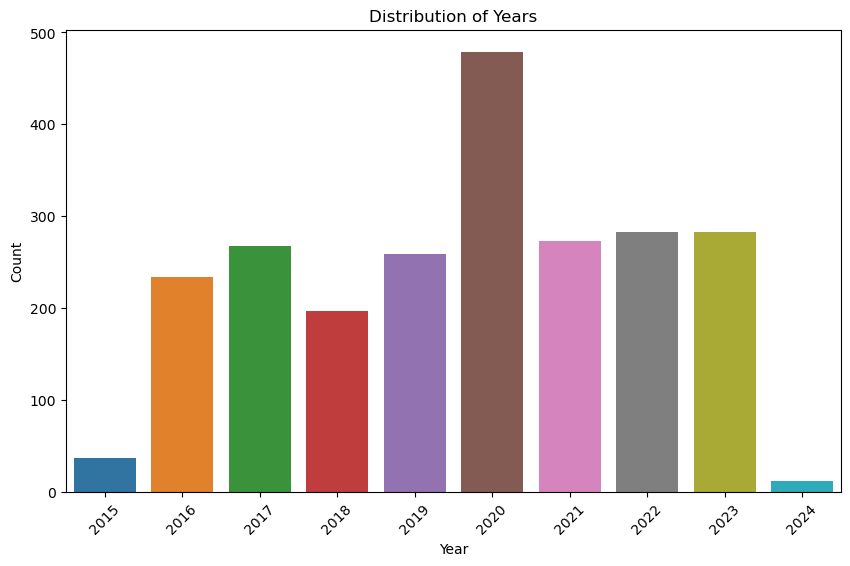

Available years: 2015 - 2024
Year: 2020



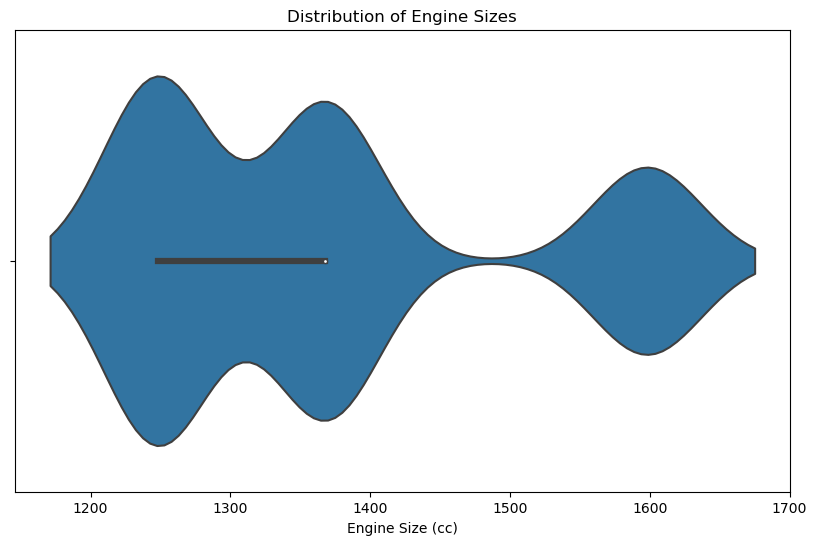

Available Engine sizes (cc): 1248 - 1598
Engine Size (cc): 1300



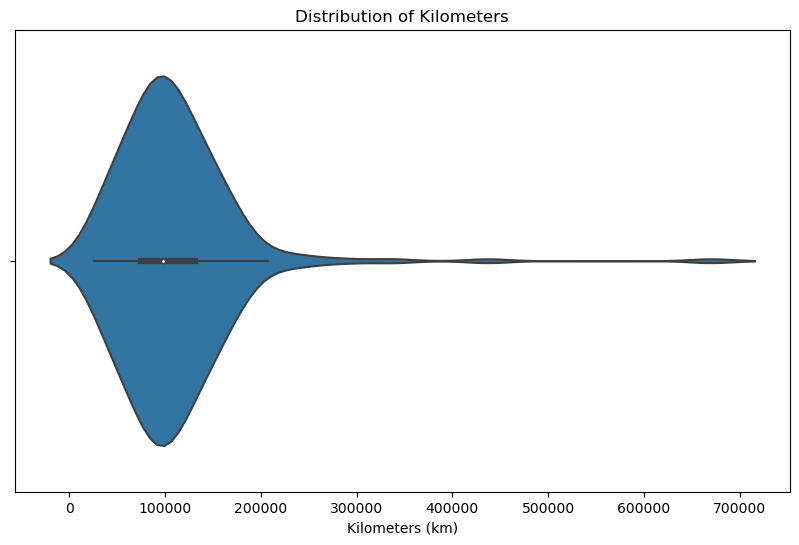

Available Kilometers: 25500 - 670000
Kilometers: 30000



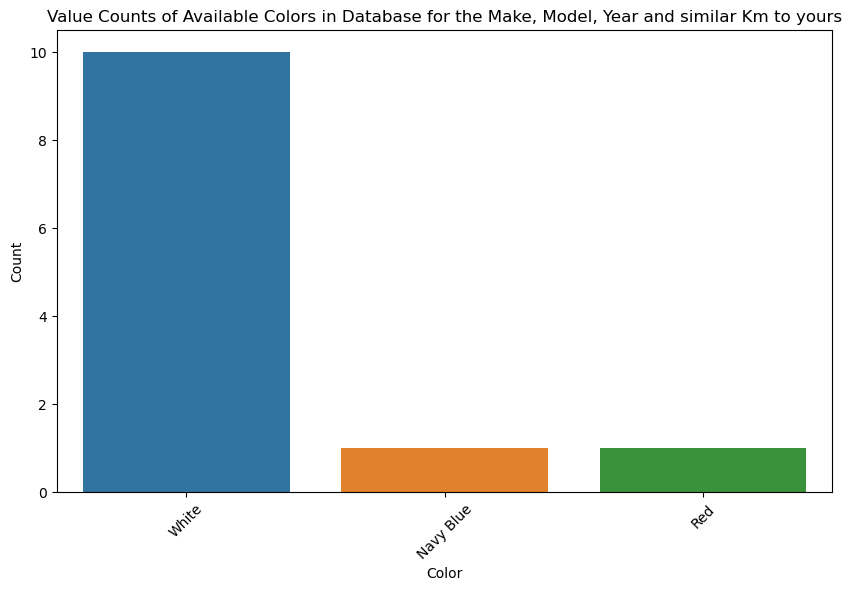

Available colors: Beige, Black, Blue, Brown, Champagne, Dark Red, Gold, Gray, Metallic Blue, Metallic Gray, Metallic Green, Navy Blue, Orange, Red, Silver, Smoke, Titanium Gray, Turquoise, White, Yellow
Color: white
Matching 'White' against choices: ('White', 100.0, 18)
Corrected Color: White

Transmission: Manual (58)

Body Type:
a: Sedan (52)
b: Hatchback/5 (6)
Select a body type option: a

Available fuel types:
a: Gasoline (34)
b: Diesel (11)
c: LPG and Gasoline (7)
Select a fuel type option: a

Traction: Front-wheel-drive (34)
-------------------

Base-line estimate: 21668 USD
Base-line confidence level: High (Standard Deviation: 1642)

Model available for Fiat_Egea.
GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,
                          random_state=123, subsample=0.7)
Model predicted price: 23692 USD
Model confidence level: Low - Model confidence is low due to the model's test max error being 34.55% and the value count being 2325.0.

Agreement level: Agreement l

In [3]:
import numpy as np
import pandas as pd
import joblib
from datetime import datetime
import os
from rapidfuzz import process, fuzz
import matplotlib.pyplot as plt
import seaborn as sns


# Define the filename of your CSV file
clean_csv_file = '2024_turkey_car_market_ML.csv'

# Load the data from the CSV file into a new DataFrame
df_2024 = pd.read_csv(clean_csv_file)

# Disable scientific notation for printing
pd.set_option('display.float_format', lambda x: '%.6f' % x)
np.set_printoptions(suppress=True)

# Create 'Make_Model' column
df_2024['Make_Model'] = df_2024['Make'] + ' ' + df_2024['Model']

def get_user_input(prompt):
    value = input(prompt)
    return value.strip() if value else None

def match_user_input(user_input, choices, cutoff=60):
    if not user_input:
        return None
    user_input = user_input.strip().title()  # Standardize user input
    match = process.extractOne(user_input, choices, scorer=fuzz.WRatio, score_cutoff=cutoff)
    print(f"Matching '{user_input}' against choices: {match}")  # Debugging print statement
    return match[0] if match else None

def apply_make_exceptions(user_input):
    make_exceptions = {
        'BMW': 'BMW', 'bmw': 'BMW', 'Bmw': 'BMW',
        'GMC': 'GMC', 'Gmc': 'GMC', 'gmc': 'GMC', 'MINI': 'MINI', 'Mini': 'MINI', 'mini': 'MINI',
        'VW': 'Volkswagen', 'vw': 'Volkswagen', 'Vw': 'Volkswagen', 'VOLKSWAGEN': 'Volkswagen',
        'Tofas': 'Tofaş', 'tofas': 'Tofaş'
    }
    return make_exceptions.get(user_input, None)

def user_input():
    print("Let's estimate your car's value. Please enter:\n")
    
    make_counts = df_2024['Make'].value_counts()
    makes = sorted(make_counts.index)
    makes_display = ', '.join([f"{make} ({make_counts[make]})" for make in makes])
    print(f"Available makes: {makes_display}")
    user_make = get_user_input("Make: ")

    # Step 1: Check in the make_exceptions dictionary
    corrected_make = apply_make_exceptions(user_make)
    if corrected_make:
        make = corrected_make
    else:
        # Step 2: Capitalize the input and check
        capitalized_make = user_make.capitalize()
        if capitalized_make in makes:
            make = capitalized_make
        else:
            # Step 3: Use fuzzy matching on the capitalized input
            make = match_user_input(capitalized_make, makes)

    print(f"Corrected Make: {make}\n")
    
    while not make:
        print("Make not found. Please try again.")
        user_make = get_user_input("Make: ")
        corrected_make = apply_make_exceptions(user_make)
        if corrected_make:
            make = corrected_make
        else:
            capitalized_make = user_make.capitalize()
            if capitalized_make in makes:
                make = capitalized_make
            else:
                make = match_user_input(capitalized_make, makes)
        print(f"Corrected Make: {make}\n")
    
    model_counts = df_2024[df_2024['Make'] == make]['Model'].value_counts()
    models = sorted(model_counts.index)
    models_display = ', '.join([f"{model} ({model_counts[model]})" for model in models])
    print(f"Available models for {make}: {models_display}")
    user_model = get_user_input("Model: ")
    model = match_user_input(user_model, models)
    
    while not model:
        print("Model not found. Please try again.")
        user_model = get_user_input("Model: ")
        model = match_user_input(user_model, models)
    
    print(f"Corrected Model: {model}\n")
    
    # Filter dataframe based on selected make and model
    filtered_df = df_2024[(df_2024['Make'] == make) & (df_2024['Model'] == model)]
    
    # Generate and display a count plot for years
    plt.figure(figsize=(10, 6))
    sns.countplot(x=filtered_df['Year'])
    plt.title('Distribution of Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate the x labels if needed for better readability
    ax = plt.gca()
    ax.set_xticklabels([int(x.get_text().split('.')[0]) for x in ax.get_xticklabels()])  # Display years as integers
    plt.show()
    
    # Year input with min-max range
    available_years = filtered_df['Year'].agg(['min', 'max'])
    print(f"Available years: {int(available_years['min'])} - {int(available_years['max'])}")
    year = int(get_user_input("Year: "))
    print()

    # Update filtered_df to include the year entered by the user
    filtered_df = filtered_df[filtered_df['Year'] == year]

    # Generate and display a violin plot for engine sizes
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=filtered_df['Engine Size (cc)'])
    plt.title('Distribution of Engine Sizes')
    plt.xlabel('Engine Size (cc)')
    plt.show()

    # Engine Size input with min-max range
    available_engine_sizes = filtered_df['Engine Size (cc)'].agg(['min', 'max'])
    print(f"Available Engine sizes (cc): {int(available_engine_sizes['min'])} - {int(available_engine_sizes['max'])}")
    engine_size_input = get_user_input("Engine Size (cc): ").replace(",", "")
    if "." in engine_size_input or float(engine_size_input) < 10:
        engine_size = int(float(engine_size_input) * 1000)
    else:
        engine_size = int(engine_size_input)
    print()

    # Update filtered_df to include the engine size entered by the user
    filtered_df = filtered_df[filtered_df['Engine Size (cc)'].between(engine_size * 0.95, engine_size * 1.05)]

    # Generate and display a violin plot for kilometers
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=filtered_df['Kilometers (km)'])
    plt.title('Distribution of Kilometers')
    plt.xlabel('Kilometers (km)')
    plt.show()

    # Kilometers input with min-max range
    available_kilometers = filtered_df['Kilometers (km)'].agg(['min', 'max'])
    print(f"Available Kilometers: {int(available_kilometers['min'])} - {int(available_kilometers['max'])}")
    km = int(get_user_input("Kilometers: ").replace(",", "").replace(".", ""))
    print()

    # Update filtered_df to include the kilometers entered by the user
    filtered_df = filtered_df[filtered_df['Kilometers (km)'].between(km * 0.7, km * 1.3)]
    
    # Generate and display a bar plot for colors
    color_counts = filtered_df['Color'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=color_counts.index, y=color_counts.values)
    plt.title('Value Counts of Available Colors in Database for the Make, Model, Year and similar Km to yours')
    plt.xlabel('Color')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
#    colors = sorted(filtered_df['Color'].unique())
    colors = sorted(df_2024[
        (df_2024['Make'] == make) & 
        (df_2024['Model'] == model)
    ]['Color'].unique())
    print(f"Available colors: {', '.join(colors)}")
    color = match_user_input(get_user_input("Color: "), colors)
    while not color:
        print(f"Invalid color. Available colors are: {', '.join(colors)}")
        color = match_user_input(get_user_input("Color: "), colors)
    print(f"Corrected Color: {color}\n")
    
    # Transmission options
    filtered_transmissions = df_2024[
        (df_2024['Make'] == make) & 
        (df_2024['Model'] == model) & 
        (df_2024['Year'] == year) & 
        (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
    ]['Transmission'].value_counts()
    transmission_options = {chr(97 + i): t for i, t in enumerate(filtered_transmissions.index)}
    if len(transmission_options) == 1:
        transmission = list(transmission_options.values())[0]
        print(f"Transmission: {transmission} ({filtered_transmissions[transmission]})")
    else:
        print("Transmission:")
        for k, v in transmission_options.items():
            print(f"{k}: {v} ({filtered_transmissions[v]})")
        transmission = get_user_input("Select a transmission option: ").lower()
        while transmission not in transmission_options:
            print("Invalid transmission option. Please try again.")
            for k, v in transmission_options.items():
                print(f"{k}: {v} ({filtered_transmissions[v]})")
            transmission = get_user_input("Select a transmission option: ").lower()
        transmission = transmission_options[transmission]
    print()

    # Update filtered_df to include the selected transmission
    filtered_df = df_2024[
        (df_2024['Make'] == make) & 
        (df_2024['Model'] == model) & 
        (df_2024['Year'] == year) & 
        (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3)) & 
        (df_2024['Transmission'] == transmission)
    ]

    # Body Type options
    filtered_body_types = filtered_df['Body Type'].value_counts()
    body_type_options = {chr(97 + i): bt for i, bt in enumerate(filtered_body_types.index)}
    if len(body_type_options) == 1:
        body_type = list(body_type_options.values())[0]
        print(f"Body Type: {body_type} ({filtered_body_types[body_type]})")
    else:
        print("Body Type:")
        for k, v in body_type_options.items():
            print(f"{k}: {v} ({filtered_body_types[v]})")
        body_type = get_user_input("Select a body type option: ").lower()
        while body_type not in body_type_options:
            print("Invalid body type. Please try again.")
            for k, v in body_type_options.items():
                print(f"{k}: {v} ({filtered_body_types[v]})")
            body_type = get_user_input("Select a body type option: ").lower()
        body_type = body_type_options[body_type]
    print()

    # Update filtered_df to include the selected body type
    filtered_df = filtered_df[filtered_df['Body Type'] == body_type]

    # Fuel Type options
    filtered_fuel_types = filtered_df['Fuel Type'].value_counts()
    fuel_type_options = {chr(97 + i): ft for i, ft in enumerate(filtered_fuel_types.index)}
    if len(fuel_type_options) == 1:
        fuel_type = list(fuel_type_options.values())[0]
        print(f"Fuel Type: {fuel_type} ({filtered_fuel_types[fuel_type]})")
    else:
        print("Available fuel types:")
        for k, v in fuel_type_options.items():
            print(f"{k}: {v} ({filtered_fuel_types[v]})")
        fuel_type = get_user_input("Select a fuel type option: ").lower()
        while fuel_type not in fuel_type_options:
            print("Invalid fuel type. Please try again.")
            for k, v in fuel_type_options.items():
                print(f"{k}: {v} ({filtered_fuel_types[v]})")
            fuel_type = get_user_input("Select a fuel type option: ").lower()
        fuel_type = fuel_type_options[fuel_type]
    print()

    # Update filtered_df to include the selected fuel type
    filtered_df = filtered_df[filtered_df['Fuel Type'] == fuel_type]

    # Traction options
    filtered_tractions = filtered_df['Traction'].value_counts()
    traction_options = {chr(97 + i): tt for i, tt in enumerate(filtered_tractions.index)}
    if len(traction_options) == 1:
        traction = list(traction_options.values())[0]
        print(f"Traction: {traction} ({filtered_tractions[traction]})")
    else:
        print("Traction:")
        for k, v in traction_options.items():
            print(f"{k}: {v} ({filtered_tractions[v]})")
        traction = get_user_input("Select a traction option: ").lower()
        while traction not in traction_options:
            print("Invalid traction type. Please try again.")
            for k, v in traction_options.items():
                print(f"{k}: {v} ({filtered_tractions[v]})")
            traction = get_user_input("Select a traction option: ").lower()
        traction = traction_options[traction]

    print("-------------------")

    return make, model, year, km, color, transmission, body_type, fuel_type, engine_size, "Owner", traction

def calculate_engine_power(make, model, year, engine_size):
    filtered_df = df_2024[
        (df_2024['Make'] == make) & 
        (df_2024['Model'] == model) & 
        (df_2024['Year'].between(year - 1, year + 1)) & 
        (df_2024['Engine Size (cc)'].between(engine_size * 0.95, engine_size * 1.05))
    ]
    
    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Engine Size (cc)'].between(engine_size * 0.95, engine_size * 1.05))
        ]
        
    if len(filtered_df) == 0:
        filtered_df = df_2024[
            (df_2024['Year'].between(year - 1, year + 1)) & 
            (df_2024['Engine Size (cc)'].between(engine_size * 0.95, engine_size * 1.05))
        ]
    
    if len(filtered_df) == 0:
        filtered_df = df_2024[df_2024['Engine Size (cc)'].between(engine_size * 0.95, engine_size * 1.05)]
    
    engine_power = filtered_df['Engine Power (hp)'].median()
    if pd.isna(engine_power):
        engine_power = 75  # Default placeholder if no data available
    return engine_power

def calculate_base_price(make, model, year, km, engine_size, overall_median_price, transmission, fuel_type, body_type):
    filtered_df = df_2024[
        (df_2024['Make'] == make) & 
        (df_2024['Model'] == model) & 
        (df_2024['Year'] == year) & 
        (df_2024['Transmission'] == transmission) & 
        (df_2024['Fuel Type'] == fuel_type) & 
        (df_2024['Body Type'] == body_type) & 
        (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
    ]

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Year'] == year) & 
            (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
        ]

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Year'] == year) & 
            (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
        ]

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Year'].between(year - 1, year + 1)) & 
            (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
        ]

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Year'].between(year - 2, year + 2)) & 
            (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
        ]

    if len(filtered_df) < 10:
        for i in range(1, 5):
            filtered_df = df_2024[
                (df_2024['Make'] == make) &
                (df_2024['Model'] == model) &
                (df_2024['Year'].between(year - i, year + i)) &
                (df_2024['Kilometers (km)'].between(km - 15000 * (i + 1), km + 15000 * (i + 1)))
            ]
            if len(filtered_df) >= 10:
                break

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) &
            (df_2024['Model'] == model)
        ]

    if len(filtered_df) < 10:
        base_confidence = "Low"
    elif len(filtered_df) < 30:
        base_confidence = "Medium"
    else:
        base_confidence = "High"

    if len(filtered_df) >= 10:
        filtered_df = filtered_df.sort_values(by='Price USD')
        base_line_price = filtered_df['Price USD'].median()
    else:
        base_line_price = filtered_df['Price USD'].median() if len(filtered_df) > 0 else overall_median_price

    base_std_dev = filtered_df['Price USD'].std()

    return base_line_price, base_confidence, filtered_df, base_std_dev

def calculate_weights(base_confidence, model_confidence, agreement_level):
    if base_confidence == "High" and model_confidence == "High":
        if agreement_level == "High":
            return 0.6, 0.4
        elif agreement_level == "Medium":
            return 0.65, 0.35
        else:
            return 0.7, 0.3
    elif base_confidence == "High" and model_confidence == "Low":
        if agreement_level == "High":
            return 0.7, 0.3
        elif agreement_level == "Medium":
            return 0.75, 0.25
        else:
            return 0.8, 0.2
    elif base_confidence == "Low" and model_confidence == "High":
        if agreement_level == "High":
            return 0.5, 0.5
        elif agreement_level == "Medium":
            return 0.55, 0.45
        else:
            return 0.6, 0.4
    else:
        if agreement_level == "High":
            return 0.55, 0.45
        elif agreement_level == "Medium":
            return 0.6, 0.4
        else:
            return 0.65, 0.35

def main():
    overall_median_price = df_2024['Price USD'].median()
    make, model, year, km, color, transmission, body_type, fuel_type, engine_size, ownership, traction = user_input()
    make_model = f"{make}_{model}".replace(' ', '_')

    model_path = f"MakeModel/{make_model}_model.pkl"
    scaler_path = f"MakeModel/{make_model}_scaler.pkl"
    encoder_path = "MakeModel/onehot_encoder.pkl"

    car_age = datetime.now().year - year

    engine_power = calculate_engine_power(make, model, year, engine_size)
    base_line_price, base_confidence, base_filtered_data, base_std_dev = calculate_base_price(make, model, year, km, engine_size, overall_median_price, transmission, fuel_type, body_type)

    preset_data = {
        'Kilometers (km)': [km],
        'Car Age (Years)': [car_age],
        'Engine Size (cc)': [engine_size],
        'Engine Power (hp)': [engine_power],
        'Transmission': [transmission],
        'Fuel Type': [fuel_type],
        'Body Type': [body_type],
        'Color': [color],
        'Traction': [traction]
    }
    
    user_data_df = pd.DataFrame(preset_data)

    # Load the encoder and scaler
    encoder = joblib.load(encoder_path)
    scaler = joblib.load(scaler_path)

    # Specify the numerical and categorical columns
    numerical_cols = ['Kilometers (km)', 'Car Age (Years)', 'Engine Size (cc)', 'Engine Power (hp)']
    categorical_cols = ['Transmission', 'Fuel Type', 'Body Type', 'Color', 'Traction']

    # Required columns by the model
    required_columns = [
        'Kilometers (km)', 'Car Age (Years)', 'Engine Size (cc)', 'Engine Power (hp)', 
        'Transmission_Manual', 'Transmission_Semi-Automatic', 'Fuel Type_Electric', 
        'Fuel Type_Gasoline', 'Fuel Type_Hybrid', 'Fuel Type_LPG and Gasoline', 
        'Body Type_Cabrio', 'Body Type_Coupe', 'Body Type_Crossover', 'Body Type_Glass Van', 
        'Body Type_Half Glass Van', 'Body Type_Hard top', 'Body Type_Hatchback/3', 
        'Body Type_Hatchback/5', 'Body Type_MPV', 'Body Type_Minibus', 'Body Type_Panel Van', 
        'Body Type_Pick-up', 'Body Type_Refrigerated Panel Van', 'Body Type_Roadster', 
        'Body Type_SUV', 'Body Type_Sedan', 'Body Type_Station wagon', 'Color_Black', 
        'Color_Blue', 'Color_Brown', 'Color_Champagne', 'Color_Dark Red', 'Color_Gold', 
        'Color_Gray', 'Color_Green', 'Color_Metallic Blue', 'Color_Metallic Gray', 
        'Color_Metallic Green', 'Color_Navy Blue', 'Color_Orange', 'Color_Pink', 
        'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Smoke', 'Color_Titanium Gray', 
        'Color_Turquoise', 'Color_White', 'Color_Yellow', 'Traction_4x4', 
        'Traction_AWD (Electronic)', 'Traction_Front-wheel-drive', 'Traction_Rear-wheel-drive'
    ]

    # Encode the categorical features
    user_data_encoded = pd.DataFrame(encoder.transform(user_data_df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

    # Concatenate the numerical features and encoded categorical features
    user_data_final = pd.concat([user_data_df[numerical_cols], user_data_encoded], axis=1)

    # Ensure all required columns are present
    for col in required_columns:
        if col not in user_data_final.columns:
            user_data_final[col] = 0

    # Reorder the columns to match the model's expected input
    user_data_final = user_data_final[required_columns]

    # Scale the user data
    user_data_scaled = scaler.transform(user_data_final)

    # Load the model
    model = joblib.load(model_path)

    # Predict the price using the model
    model_predicted_price = model.predict(user_data_scaled)[0]

    # Print the base price and the model predicted price
    # print(f"Base-line estimate: {base_line_price:.2f} USD")
    # print(f"Model predicted price: {model_predicted_price:.2f} USD")

    # Calculate agreement level
    percentage_difference = abs(model_predicted_price - base_line_price) / base_line_price * 100
    if percentage_difference <= 5:
        agreement_level = "High"
    elif percentage_difference <= 10:
        agreement_level = "Medium"
    else:
        agreement_level = "Low"

    # Calculate confidence in the model's prediction using test max error percentage and value count
    ml_test_max_error = base_filtered_data.iloc[0]['ML Test Max Error']
    ml_test_value_count = base_filtered_data.iloc[0]['ML MakeModel value count']
    ml_test_max_error_percent = (ml_test_max_error / base_line_price) * 100

    model_confidence = "High" if ml_test_value_count >= 30 and ml_test_max_error_percent <= 10 else "Low"

    # Determine weights based on confidences and agreement
    base_weight, model_weight = calculate_weights(base_confidence, model_confidence, agreement_level)

    # Calculate the final price estimate
    final_price = (base_weight * base_line_price) + (model_weight * model_predicted_price)

    # Print the final estimated price and confidence levels
    print(f"\nBase-line estimate: {base_line_price:.0f} USD")
    print(f"Base-line confidence level: {base_confidence} (Standard Deviation: {base_std_dev:.0f})\n")

    if not os.path.exists(model_path) or not os.path.exists(scaler_path) or not os.path.exists(encoder_path):
        print(f"Model not available for {make_model}. Unable to estimate price.")
        return
    else:
        print(f"Model available for {make_model}.")
    
    print(f"{model}")
    print(f"Model predicted price: {model_predicted_price:.0f} USD")
    
    model_confidence_reason = (
        f"Model confidence is low due to the model's test max error being {ml_test_max_error_percent:.2f}% and the value count being {ml_test_value_count}."
        if model_confidence == "Low"
        else f"Model confidence is high due to the model's test max error being {ml_test_max_error_percent:.2f}% and the value count being {ml_test_value_count}."
    )
    print(f"Model confidence level: {model_confidence} - {model_confidence_reason}\n")

    agreement_level_reason = f"Agreement level: {agreement_level} due to percentage difference being {percentage_difference:.2f}%."
    print(f"Agreement level: {agreement_level_reason}")
    print(f"Weights: Base-line {base_weight*100:.1f}%, Model {model_weight*100:.1f}%\n")

    print(f"————————————")
    print(f"Estimated Sell Price for:")
    print(f"{make_model} {year} with {km} km, {color} color, {transmission} transmission, {body_type} body type, {fuel_type} fuel type, {engine_size} cc engine, {ownership} ownership, and {traction} traction: ")
    print(f"{final_price:.0f} USD")
    print("————————————\n")

    print("Filtered data used for base-line estimate:")
    formatted_base_filtered_data = base_filtered_data[['Price USD', 'Year', 'Kilometers (km)', 'Engine Size (cc)', 'Body Type', 'Transmission']].copy()
    formatted_base_filtered_data['Price USD'] = formatted_base_filtered_data['Price USD'].round(0).astype(int)
    formatted_base_filtered_data['Year'] = formatted_base_filtered_data['Year'].astype(int)
    formatted_base_filtered_data['Kilometers (km)'] = formatted_base_filtered_data['Kilometers (km)'].astype(int)
    formatted_base_filtered_data['Engine Size (cc)'] = formatted_base_filtered_data['Engine Size (cc)'].astype(int)
    print(formatted_base_filtered_data)

    print("\nInput data for model prediction (non-zero values):")
    non_zero_data = user_data_final.loc[:, (user_data_final != 0).any(axis=0)]
    print(non_zero_data)

if __name__ == "__main__":
    main()

In [ ]:
#older code kept in case I need a function from it later. Will delete once I'm sure it's not needed

'''import numpy as np
import pandas as pd
import joblib
from datetime import datetime
import os

# Define the filename of your CSV file
clean_csv_file = '2024_turkey_car_market_ML.csv'

# Load the data from the CSV file into a new DataFrame
df_2024 = pd.read_csv(clean_csv_file)

# Disable scientific notation for printing
pd.set_option('display.float_format', lambda x: '%.6f' % x)
np.set_printoptions(suppress=True)

# Create 'Make_Model' column
df_2024['Make_Model'] = df_2024['Make'] + ' ' + df_2024['Model']

def user_input():
    print("Let's estimate your car's value. Please enter:")
    
    makes = sorted(df_2024['Make'].unique())
    print(f"Available makes: {', '.join(makes)}")
    make = input("Make: ").strip().upper()
    
    make_exceptions = {'BMW': 'BMW', 'bmw': 'BMW','Bmw': 'BMW', 'GMC': 'GMC', 'MINI': 'MINI', 'Mini': 'MINI', 'mini': 'MINI', 'VW': 'Volkswagen', 'vw': 'Volkswagen', 'Vw': 'Volkswagen', 'VOLKSWAGEN': 'Volkswagen'}
    make = make_exceptions.get(make, make.capitalize())
    
    while make not in makes:
        print("Make not found. Please try again.")
        make = input("Make: ").strip().upper()
        make = make_exceptions.get(make, make.capitalize())
    
    models = sorted(df_2024[df_2024['Make'] == make]['Model'].unique())
    print(f"Available models for {make}: {', '.join(models)}")
    model = input("Model: ").strip().title()
    while model not in models:
        print("Model not found. Please try again.")
        model = input("Model: ").strip().title()
    
    year = int(input("Year: "))
    engine_size = input("Engine Size (cc): ").replace(",", "").replace(".", "")
    engine_size = int(float(engine_size) * 1000) if "." in engine_size else int(engine_size)
    km = int(input("Km: ").replace(",", "").replace(".", ""))
    
    colors = sorted(df_2024['Color'].unique())
    print(f"Available colors: {', '.join(colors)}")
    color = input("Color: ").capitalize()
    while color not in colors:
        print(f"Invalid color. Available colors are: {', '.join(colors)}")
        color = input("Color: ").capitalize()
    
    filtered_transmissions = df_2024[(df_2024['Make'] == make) & (df_2024['Model'] == model)]['Transmission'].value_counts().index
    transmission_options = {chr(97 + i): t for i, t in enumerate(filtered_transmissions)}
    if len(transmission_options) == 1:
        transmission = list(transmission_options.values())[0]
        print(f"Transmission: {transmission}")
    else:
        print("Transmission:")
        for k, v in transmission_options.items():
            print(f"{k}: {v}")
        transmission = input().lower()
        while transmission not in transmission_options:
            print("Invalid transmission option. Please try again.")
            for k, v in transmission_options.items():
                print(f"{k}: {v}")
            transmission = input().lower()
        transmission = transmission_options[transmission]

    filtered_body_types = df_2024[(df_2024['Make'] == make) & (df_2024['Model'] == model)]['Body Type'].value_counts().index
    body_type_options = {chr(97 + i): bt for i, bt in enumerate(filtered_body_types)}
    if len(body_type_options) == 1:
        body_type = list(body_type_options.values())[0]
        print(f"Body Type: {body_type}")
    else:
        print("Body Type:")
        for k, v in body_type_options.items():
            print(f"{k}: {v}")
        body_type = input().lower()
        while body_type not in body_type_options:
            print("Invalid body type. Please try again.")
            for k, v in body_type_options.items():
                print(f"{k}: {v}")
            body_type = input().lower()
        body_type = body_type_options[body_type]

    fuel_type_options = {'a': 'Gasoline', 'b': 'Diesel', 'c': 'LPG and Gasoline', 'd': 'Electric'}
    fuel_type = input("Fuel Type (a: Gasoline, b: Diesel, c: LPG and Gasoline, d: Electric): ").lower()
    while fuel_type not in fuel_type_options:
        print("Invalid fuel type. Please try again.")
        fuel_type = input("Fuel Type (a: Gasoline, b: Diesel, c: LPG and Gasoline, d: Electric): ").lower()
    fuel_type = fuel_type_options[fuel_type]

    filtered_tractions = df_2024[
        (df_2024['Make'] == make) & (df_2024['Model'] == model) & (df_2024['Year'] == year) & 
        (df_2024['Transmission'] == transmission) & (df_2024['Fuel Type'] == fuel_type) & 
        (df_2024['Body Type'] == body_type) & (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
    ]['Traction'].value_counts().index
    traction_options = {chr(97 + i): tt for i, tt in enumerate(filtered_tractions)}
    if len(traction_options) == 1:
        traction = list(traction_options.values())[0]
        print(f"Traction: {traction}")
    else:
        print("Traction:")
        for k, v in traction_options.items():
            print(f"{k}: {v}")
        traction = input().lower()
        while traction not in traction_options:
            print("Invalid traction type. Please try again.")
            for k, v in traction_options.items():
                print(f"{k}: {v}")
            traction = input().lower()
        traction = traction_options[traction]

    return make, model, year, km, color, transmission, body_type, fuel_type, engine_size, "Owner", traction

def calculate_engine_power(make, model, year, engine_size):
    filtered_df = df_2024[
        (df_2024['Make'] == make) & 
        (df_2024['Model'] == model) & 
        (df_2024['Year'].between(year - 1, year + 1)) & 
        (df_2024['Engine Size (cc)'].between(engine_size * 0.95, engine_size * 1.05))
    ]
    
    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Engine Size (cc)'].between(engine_size * 0.95, engine_size * 1.05))
        ]
        
    if len(filtered_df) == 0:
        filtered_df = df_2024[
            (df_2024['Year'].between(year - 1, year + 1)) & 
            (df_2024['Engine Size (cc)'].between(engine_size * 0.95, engine_size * 1.05))
        ]
    
    if len(filtered_df) == 0:
        filtered_df = df_2024[df_2024['Engine Size (cc)'].between(engine_size * 0.95, engine_size * 1.05)]
    
    engine_power = filtered_df['Engine Power (hp)'].median()
    if pd.isna(engine_power):
        engine_power = 75  # Default placeholder if no data available
    return engine_power

def calculate_base_price(make, model, year, km, engine_size, overall_median_price, transmission, fuel_type, body_type):
    filtered_df = df_2024[
        (df_2024['Make'] == make) & 
        (df_2024['Model'] == model) & 
        (df_2024['Year'] == year) & 
        (df_2024['Transmission'] == transmission) & 
        (df_2024['Fuel Type'] == fuel_type) & 
        (df_2024['Body Type'] == body_type) & 
        (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
    ]

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Year'] == year) & 
            (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
        ]

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Year'] == year) & 
            (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
        ]

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Year'].between(year - 1, year + 1)) & 
            (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
        ]

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) & 
            (df_2024['Model'] == model) & 
            (df_2024['Year'].between(year - 2, year + 2)) & 
            (df_2024['Kilometers (km)'].between(km * 0.7, km * 1.3))
        ]

    if len(filtered_df) < 10:
        for i in range(1, 5):
            filtered_df = df_2024[
                (df_2024['Make'] == make) &
                (df_2024['Model'] == model) &
                (df_2024['Year'].between(year - i, year + i)) &
                (df_2024['Kilometers (km)'].between(km - 15000 * (i + 1), km + 15000 * (i + 1)))
            ]
            if len(filtered_df) >= 10:
                break

    if len(filtered_df) < 10:
        filtered_df = df_2024[
            (df_2024['Make'] == make) &
            (df_2024['Model'] == model)
        ]

    if len(filtered_df) < 10:
        base_confidence = "Low"
    elif len(filtered_df) < 30:
        base_confidence = "Medium"
    else:
        base_confidence = "High"

    if len(filtered_df) >= 10:
        filtered_df = filtered_df.sort_values(by='Price USD')
        base_line_price = filtered_df['Price USD'].median()
    else:
        base_line_price = filtered_df['Price USD'].median() if len(filtered_df) > 0 else overall_median_price

    base_std_dev = filtered_df['Price USD'].std()

    return base_line_price, base_confidence, filtered_df, base_std_dev

def calculate_weights(base_confidence, model_confidence, agreement_level):
    if base_confidence == "High" and model_confidence == "High":
        if agreement_level == "High":
            return 0.6, 0.4
        elif agreement_level == "Medium":
            return 0.65, 0.35
        else:
            return 0.7, 0.3
    elif base_confidence == "High" and model_confidence == "Low":
        if agreement_level == "High":
            return 0.7, 0.3
        elif agreement_level == "Medium":
            return 0.75, 0.25
        else:
            return 0.8, 0.2
    elif base_confidence == "Low" and model_confidence == "High":
        if agreement_level == "High":
            return 0.5, 0.5
        elif agreement_level == "Medium":
            return 0.55, 0.45
        else:
            return 0.6, 0.4
    else:
        if agreement_level == "High":
            return 0.55, 0.45
        elif agreement_level == "Medium":
            return 0.6, 0.4
        else:
            return 0.65, 0.35

def main():
    overall_median_price = df_2024['Price USD'].median()
    make, model, year, km, color, transmission, body_type, fuel_type, engine_size, ownership, traction = user_input()
    make_model = f"{make}_{model}".replace(' ', '_')

    model_path = f"MakeModel/{make_model}_model.pkl"
    scaler_path = f"MakeModel/{make_model}_scaler.pkl"
    encoder_path = "MakeModel/onehot_encoder.pkl"
    
    if not os.path.exists(model_path) or not os.path.exists(scaler_path) or not os.path.exists(encoder_path):
        print(f"Model not available for {make_model}. Unable to estimate price.")
        return
    else:
        print(f"Model available for {make_model}.")

    car_age = datetime.now().year - year

    engine_power = calculate_engine_power(make, model, year, engine_size)
    base_line_price, base_confidence, base_filtered_data, base_std_dev = calculate_base_price(make, model, year, km, engine_size, overall_median_price, transmission, fuel_type, body_type)

    preset_data = {
        'Kilometers (km)': [km],
        'Car Age (Years)': [car_age],
        'Engine Size (cc)': [engine_size],
        'Engine Power (hp)': [engine_power],
        'Transmission': [transmission],
        'Fuel Type': [fuel_type],
        'Body Type': [body_type],
        'Color': [color],
        'Traction': [traction]
    }
    
    user_data_df = pd.DataFrame(preset_data)

    # Load the encoder and scaler
    encoder = joblib.load(encoder_path)
    scaler = joblib.load(scaler_path)

    # Specify the numerical and categorical columns
    numerical_cols = ['Kilometers (km)', 'Car Age (Years)', 'Engine Size (cc)', 'Engine Power (hp)']
    categorical_cols = ['Transmission', 'Fuel Type', 'Body Type', 'Color', 'Traction']

    # Required columns by the model
    required_columns = [
        'Kilometers (km)', 'Car Age (Years)', 'Engine Size (cc)', 'Engine Power (hp)', 
        'Transmission_Manual', 'Transmission_Semi-Automatic', 'Fuel Type_Electric', 
        'Fuel Type_Gasoline', 'Fuel Type_Hybrid', 'Fuel Type_LPG and Gasoline', 
        'Body Type_Cabrio', 'Body Type_Coupe', 'Body Type_Crossover', 'Body Type_Glass Van', 
        'Body Type_Half Glass Van', 'Body Type_Hard top', 'Body Type_Hatchback/3', 
        'Body Type_Hatchback/5', 'Body Type_MPV', 'Body Type_Minibus', 'Body Type_Panel Van', 
        'Body Type_Pick-up', 'Body Type_Refrigerated Panel Van', 'Body Type_Roadster', 
        'Body Type_SUV', 'Body Type_Sedan', 'Body Type_Station wagon', 'Color_Black', 
        'Color_Blue', 'Color_Brown', 'Color_Champagne', 'Color_Dark Red', 'Color_Gold', 
        'Color_Gray', 'Color_Green', 'Color_Metallic Blue', 'Color_Metallic Gray', 
        'Color_Metallic Green', 'Color_Navy Blue', 'Color_Orange', 'Color_Pink', 
        'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Smoke', 'Color_Titanium Gray', 
        'Color_Turquoise', 'Color_White', 'Color_Yellow', 'Traction_4x4', 
        'Traction_AWD (Electronic)', 'Traction_Front-wheel-drive', 'Traction_Rear-wheel-drive'
    ]

    # Encode the categorical features
    user_data_encoded = pd.DataFrame(encoder.transform(user_data_df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

    # Concatenate the numerical features and encoded categorical features
    user_data_final = pd.concat([user_data_df[numerical_cols], user_data_encoded], axis=1)

    # Ensure all required columns are present
    for col in required_columns:
        if col not in user_data_final.columns:
            user_data_final[col] = 0

    # Reorder the columns to match the model's expected input
    user_data_final = user_data_final[required_columns]

    # Scale the user data
    user_data_scaled = scaler.transform(user_data_final)

    # Load the model
    model = joblib.load(model_path)

    # Predict the price using the model
    model_predicted_price = model.predict(user_data_scaled)[0]

    # Print the base price and the model predicted price
    print(f"Base-line estimate: {base_line_price:.2f} USD")
    print(f"Model predicted price: {model_predicted_price:.2f} USD")

    # Calculate agreement level
    percentage_difference = abs(model_predicted_price - base_line_price) / base_line_price * 100
    if percentage_difference <= 5:
        agreement_level = "High"
    elif percentage_difference <= 10:
        agreement_level = "Medium"
    else:
        agreement_level = "Low"

    # Calculate confidence in the model's prediction using test max error percentage and value count
    ml_test_max_error = base_filtered_data.iloc[0]['ML Test Max Error']
    ml_test_value_count = base_filtered_data.iloc[0]['ML MakeModel value count']
    ml_test_max_error_percent = (ml_test_max_error / base_line_price) * 100

    model_confidence = "High" if ml_test_value_count >= 30 and ml_test_max_error_percent <= 10 else "Low"

    # Determine weights based on confidences and agreement
    base_weight, model_weight = calculate_weights(base_confidence, model_confidence, agreement_level)

    # Calculate the final price estimate
    final_price = (base_weight * base_line_price) + (model_weight * model_predicted_price)

    # Print the final estimated price and confidence levels
    print(f"Estimated Price for {make} {model} {year} with {km} km, {color} color, {transmission} transmission, {body_type} body type, {fuel_type} fuel type, {engine_size} cc engine, {ownership} ownership, and {traction} traction: {final_price:.2f} USD")
    print(f"Base-line confidence level: {base_confidence} (Standard Deviation: {base_std_dev:.2f})")
    
    model_confidence_reason = (
        f"Model confidence is low due to the model's test max error being {ml_test_max_error_percent:.2f}% and the value count being {ml_test_value_count}."
        if model_confidence == "Low"
        else f"Model confidence is high due to the model's test max error being {ml_test_max_error_percent:.2f}% and the value count being {ml_test_value_count}."
    )
    print(f"Model confidence level: {model_confidence} - {model_confidence_reason}")

    agreement_level_reason = f"Agreement level: {agreement_level} due to percentage difference being {percentage_difference:.2f}%."
    print(agreement_level_reason)

    print(f"Weights: Base-line {base_weight*100:.1f}%, Model {model_weight*100:.1f}%")
    print("Filtered data used for base-line estimate:")
    print(base_filtered_data[['Price USD', 'Year', 'Kilometers (km)', 'Engine Size (cc)', 'Body Type', 'Transmission']])

    non_zero_data = user_data_final.loc[:, (user_data_final != 0).any(axis=0)]
    print("Input data for model prediction (non-zero values):")
    print(non_zero_data)

if __name__ == "__main__":
    main()'''

## To find recommendations for year / make / model that loses the least %/year

Processing Opel Corsa
Columns in median_prices for Opel Corsa: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


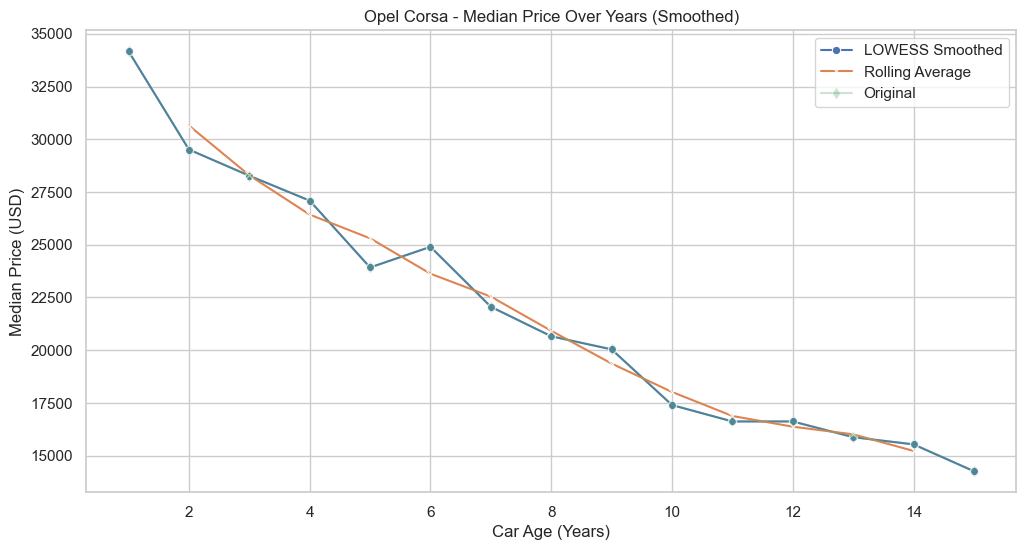

Opel Corsa - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         76  34172.103138
2                 2       -13.636364         39  29512.270892
3                 3        -4.210526         31  28269.648959
4                 4        -4.175824         50  27089.158124
5                 5       -11.697248         17  23920.472196
6                 6         4.090909          6  24899.036968
7                 7       -11.416095         55  22056.539298
8                 8        -6.338028         45  20658.589624
9                 9        -3.007519         85  20037.278658
10               10       -13.178295        115  17396.707052
11               11        -4.464286        169  16620.068344
12               12         0.000000        166  16620.068344
13               13        -4.485981        136  15874.495185
14               14        -2.152642         73  15532.774153
15               15        -8.

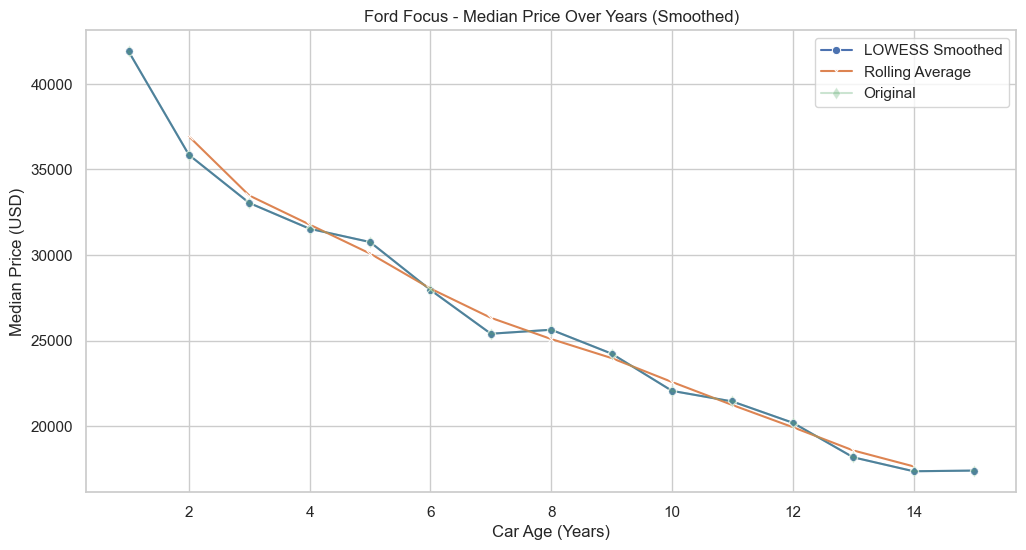

Ford Focus - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         39  41907.424666
2                 2       -14.455152          8  35849.642746
3                 3        -7.842288         28  33038.210624
4                 4        -4.560414        143  31531.531532
5                 5        -2.463054         52  30754.892824
6                 6        -9.103535         84  27955.110283
7                 7        -9.154049        131  25396.085741
8                 8         0.917431        125  25629.077353
9                 9        -5.454545        173  24231.127679
10               10        -8.974359        122  22056.539298
11               11        -2.816901        126  21435.228332
12               12        -5.797101        137  20192.606400
13               13       -10.000000        158  18173.345760
14               14        -4.487179        105  17357.875116
15               15         0.

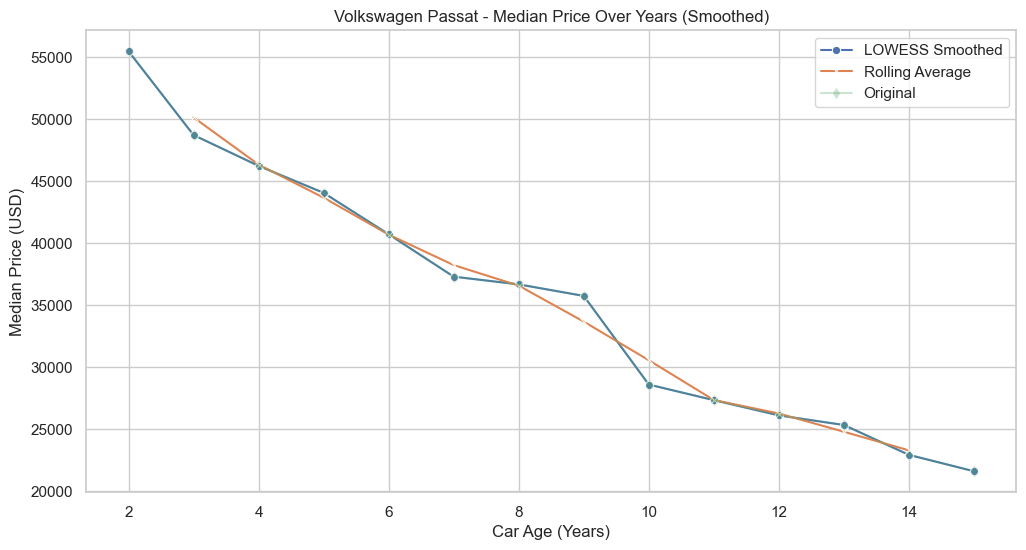

Volkswagen Passat - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 2              NaN         29  55452.003728
2                 3       -12.184874         54  48695.246971
3                 4        -5.103668        180  46210.003107
4                 5        -4.705882         90  44035.414725
5                 6        -7.583774        149  40695.868282
6                 7        -8.396947        211  37278.657968
7                 8        -1.666667        191  36657.347002
8                 9        -2.542373        202  35725.380553
9                10       -20.000000        122  28580.304442
10               11        -4.402174         96  27322.149736
11               12        -4.491188         97  26095.060578
12               13        -2.976190         57  25318.421870
13               14        -9.509202         30  22910.841876
14               15        -5.762712         21  21590.556073
Processing Volkswagen P

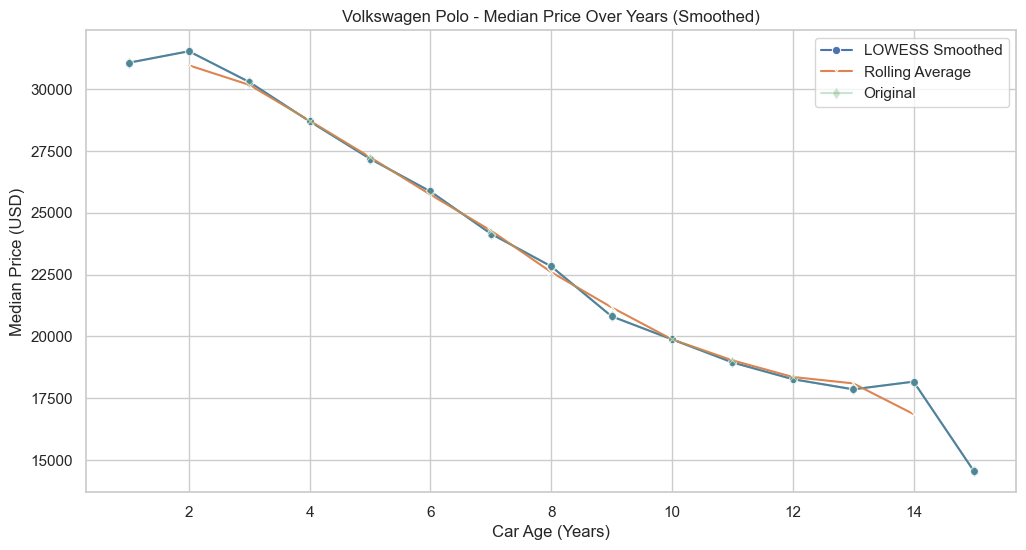

Volkswagen Polo - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         43  31065.548307
2                 2         1.500000         13  31531.531532
3                 3        -3.945813         46  30287.356322
4                 4        -5.251551         48  28696.800249
5                 5        -5.277402         27  27182.354769
6                 6        -4.857143         61  25862.068966
7                 7        -6.606607        108  24153.463809
8                 8        -5.466238        157  22833.178006
9                 9        -8.843537        140  20813.917366
10               10        -4.477612        154  19881.950916
11               11        -4.687500        180  18949.984467
12               12        -3.573770        170  18272.755514
13               13        -2.244135         70  17862.690276
14               14         1.739130         25  18173.345760
15               15      

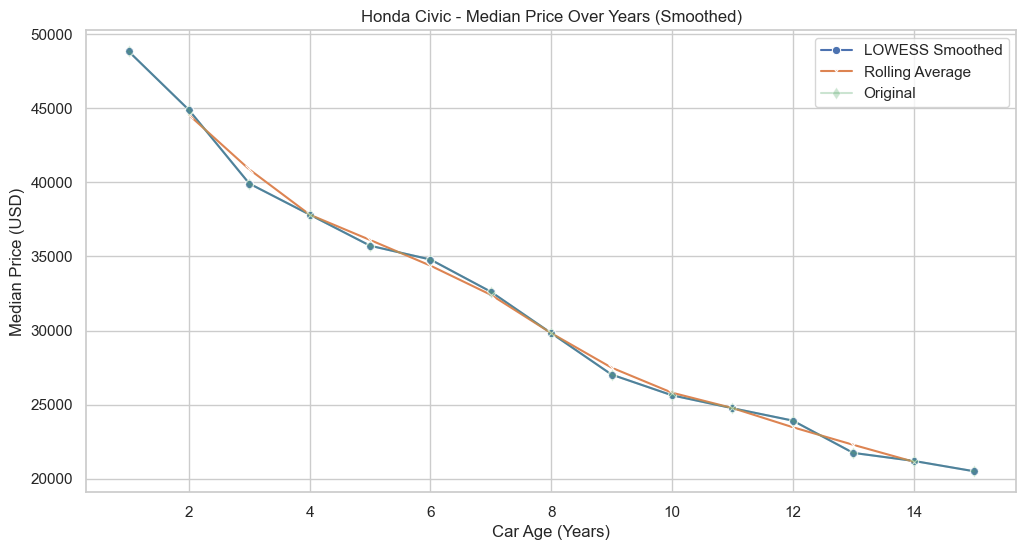

Honda Civic - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         17  48850.574713
2                 2        -8.108108         33  44889.717304
3                 3       -11.072664        121  39919.229574
4                 4        -5.252918        126  37822.305064
5                 5        -5.544148        116  35725.380553
6                 6        -2.608696        178  34793.414104
7                 7        -6.250000        135  32618.825722
8                 8        -8.571429         64  29822.926375
9                 9        -9.375000         57  27027.027027
10               10        -5.172414         61  25629.077353
11               11        -3.393939         94  24759.242001
12               12        -3.387704        123  23920.472196
13               13        -9.103896         77  21742.777260
14               14        -2.486141         76  21202.221187
15               15        -3

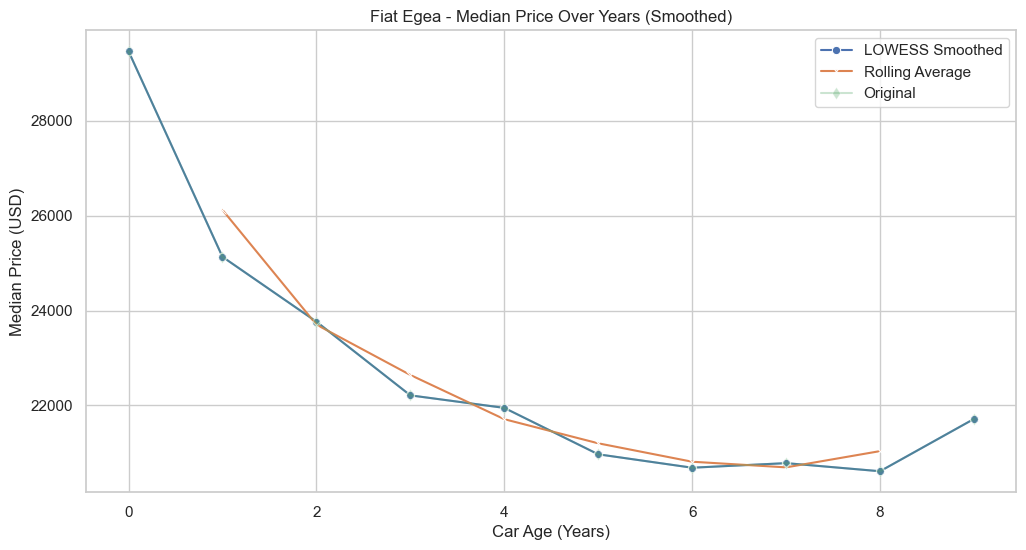

Fiat Egea - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                0              NaN         12  29465.672569
1                1       -14.707433        281  25132.028580
2                2        -5.438813        275  23765.144455
3                3        -6.535948        245  22211.867039
4                4        -1.188811        326  21947.809879
5                5        -4.458599        139  20969.245107
6                6        -1.348148         61  20686.548618
7                7         0.465535         59  20782.851817
8                8        -0.822123         55  20611.991302
9                9         5.350414          9  21714.818267
Processing Toyota Corolla
Columns in median_prices for Toyota Corolla: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


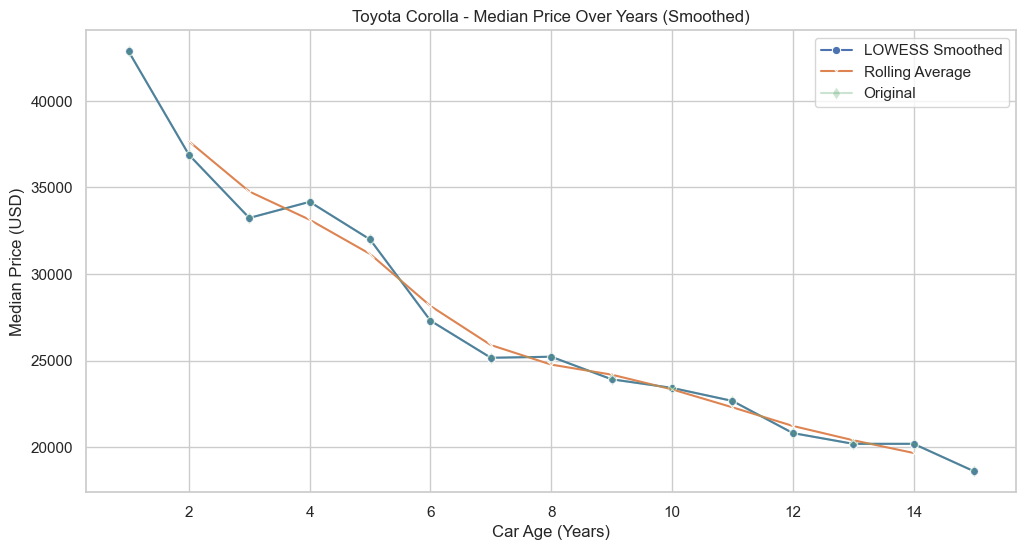

Toyota Corolla - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         69  42870.456664
2                 2       -13.949275         70  36890.338614
3                 3        -9.894737        145  33240.136688
4                 4         2.803738        162  34172.103138
5                 5        -6.363636         70  31997.514756
6                 6       -14.660194         63  27306.616962
7                 7        -7.849829        110  25163.094129
8                 8         0.240741        132  25223.671948
9                 9        -5.166574        131  23920.472196
10               10        -2.077922         59  23423.423423
11               11        -3.216180         55  22670.083877
12               12        -8.187736         51  20813.917366
13               13        -2.985075         87  20192.606400
14               14         0.000000         27  20192.606400
15               15       

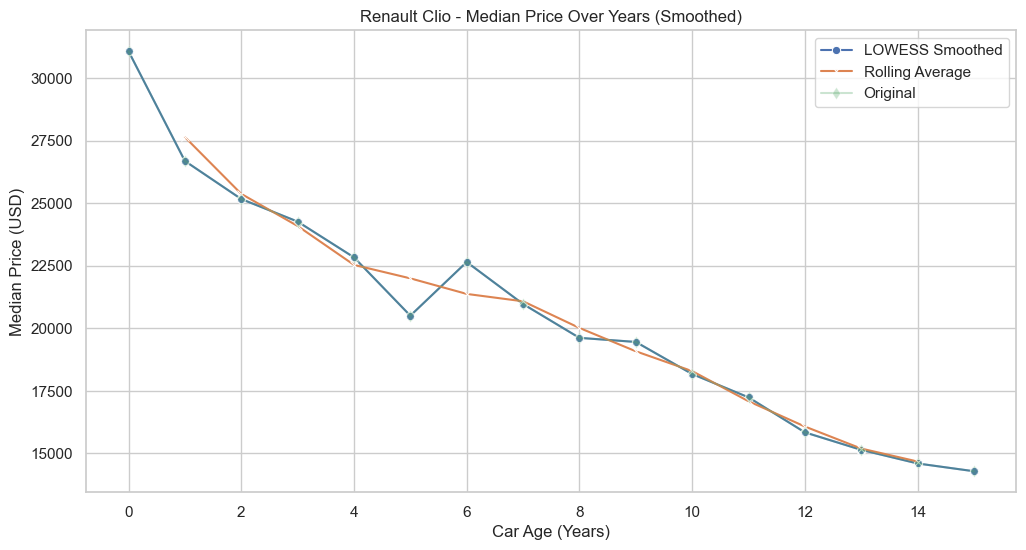

Renault Clio - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 0              NaN          7  31065.548307
1                 1       -14.110000        161  26682.199441
2                 2        -5.693329        111  25163.094129
3                 3        -3.580247        104  24262.193228
4                 4        -5.889885        187  22833.178006
5                 5       -10.204082         89  20503.261883
6                 6        10.454545         91  22646.784716
7                 7        -7.407407         97  20969.245107
8                 8        -6.444444         90  19617.893756
9                 9        -0.831354         94  19454.799627
10               10        -6.586826         77  18173.345760
11               11        -5.128205         94  17241.379310
12               12        -8.108108         47  15843.429637
13               13        -4.411765         27  15144.454800
14               14        -

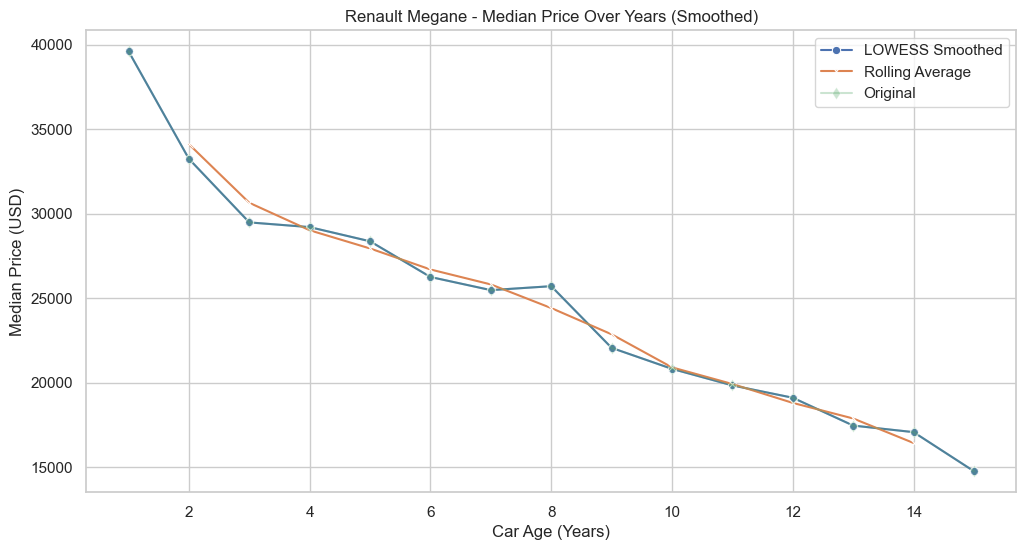

Renault Megane - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         79  39608.574091
1                 2       -16.078431         73  33240.136688
2                 3       -11.308411        101  29481.205343
3                 4        -0.948367        213  29201.615409
4                 5        -2.872340        115  28362.845604
5                 6        -7.447974        139  26250.388319
6                 7        -2.958580        180  25473.749612
7                 8         0.914634         76  25706.741224
8                 9       -14.199396         29  22056.539298
9                10        -5.633803         18  20813.917366
10               11        -4.701493         25  19835.352594
11               12        -3.680501         71  19105.312209
12               13        -8.617886         68  17458.838148
13               14        -2.224199         33  17070.518795
14               15       

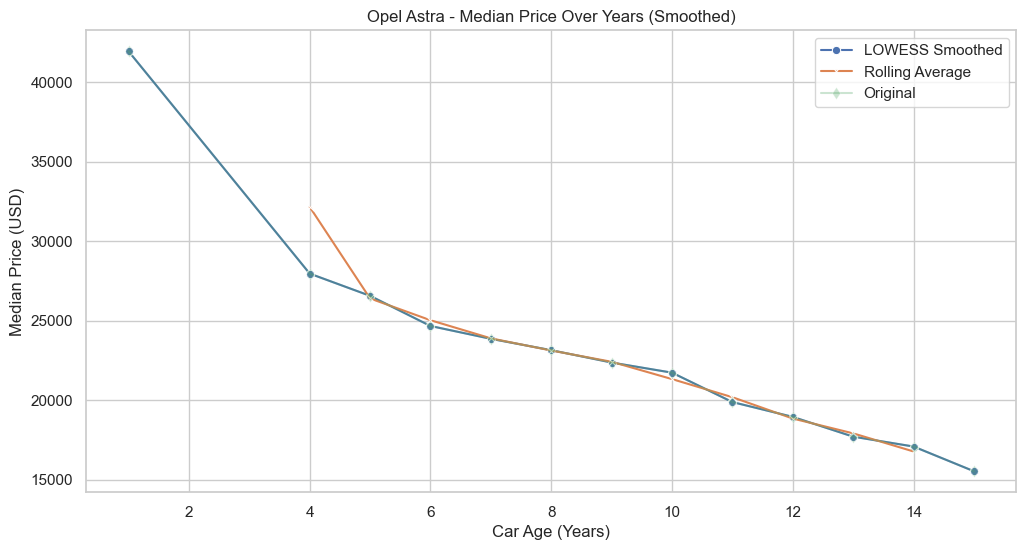

Opel Astra - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         21  41938.490214
3                 4       -33.333333         53  27958.993476
4                 5        -5.000000         40  26561.043802
5                 6        -7.134503         42  24666.045356
6                 7        -3.274559        145  23858.341100
7                 8        -2.994792        148  23143.833489
8                 9        -3.355705        127  22367.194781
9                10        -2.847222         88  21730.351041
10               11        -8.506076        173  19881.950916
11               12        -4.687500        223  18949.984467
12               13        -6.557377        174  17707.362535
13               14        -3.508772         61  17086.051569
14               15        -9.090909         28  15532.774153
Processing Fiat Linea
Columns in median_prices for Fiat Linea: Index(['Car Age (Years)', 'Pr

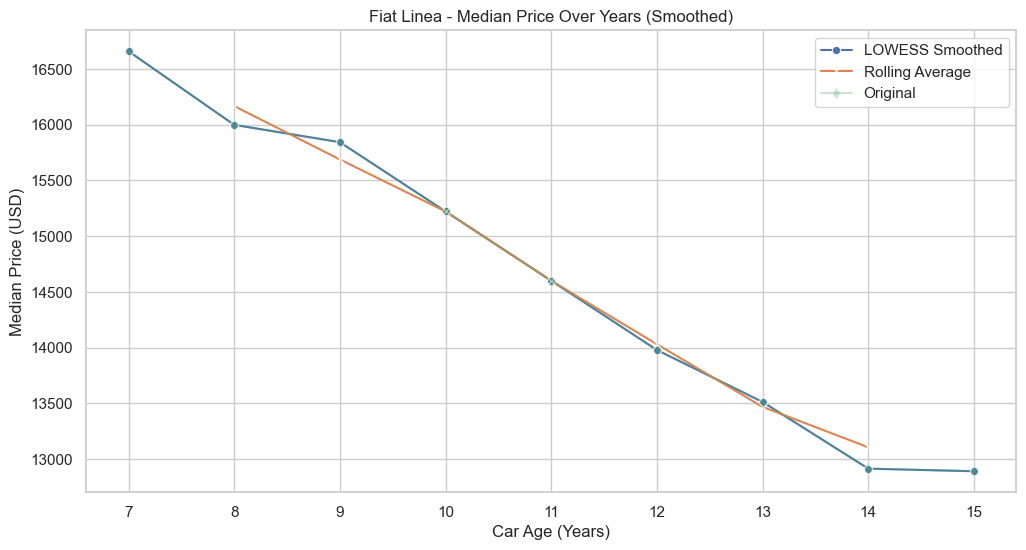

Fiat Linea - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
1                7              NaN        108  16658.900280
2                8        -3.962704         81  15998.757378
3                9        -0.970874        281  15843.429637
4               10        -3.921569        262  15222.118670
5               11        -4.081633        274  14600.807704
6               12        -4.255319        375  13979.496738
7               13        -3.333333        198  13513.513514
8               14        -4.425287         81  12915.501709
9               15        -0.180397         53  12892.202547
Processing Volkswagen Golf
Columns in median_prices for Volkswagen Golf: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


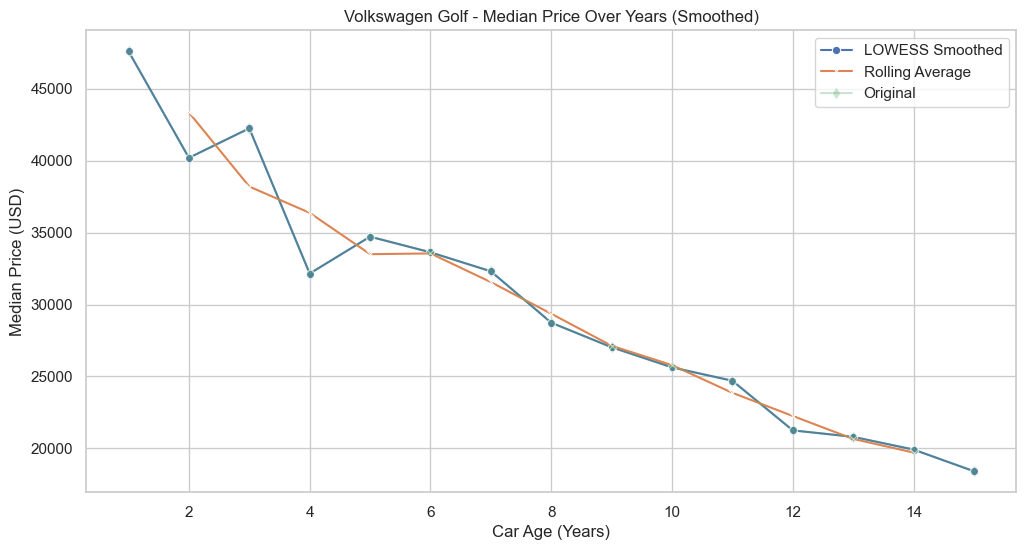

Volkswagen Golf - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         28  47607.952780
2                 2       -15.562806         33  40198.819509
3                 3         5.100464         29  42249.145697
4                 4       -23.897059         29  32152.842498
5                 5         7.971014         56  34715.750233
6                 6        -3.131991         76  33628.456042
7                 7        -3.926097        127  32308.170239
8                 8       -11.057692        197  28735.632184
9                 9        -5.945946        208  27027.027027
10               10        -5.172414         99  25629.077353
11               11        -3.636364        153  24697.110904
12               12       -13.962264        134  21248.835042
13               13        -2.119883         74  20798.384591
14               14        -4.256908         40  19913.016465
15               15      

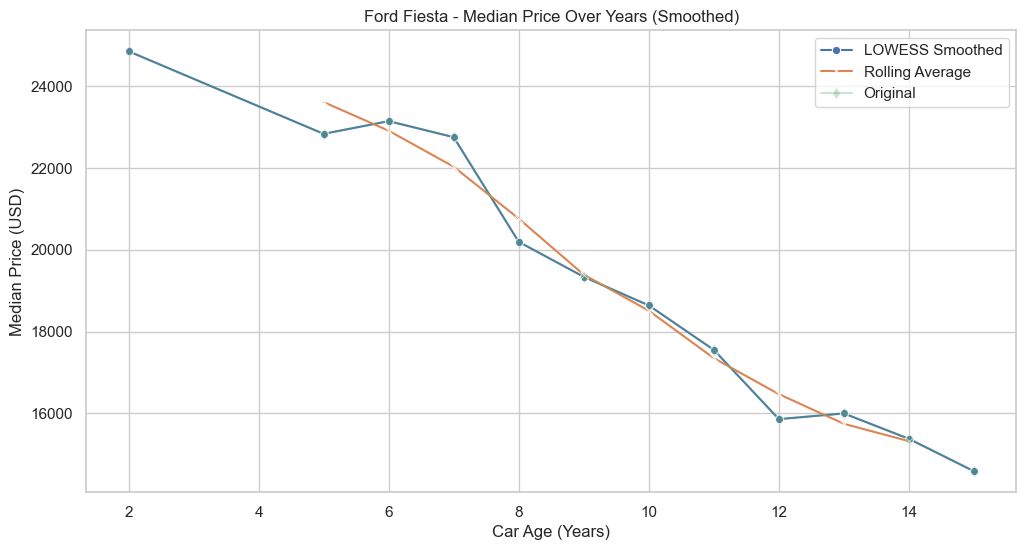

Ford Fiesta - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 2              NaN          5  24852.438646
4                 5        -8.125000         11  22833.178006
5                 6         1.360544          9  23143.833489
6                 7        -1.694631         30  22751.630941
7                 8       -11.247653         75  20192.606400
8                 9        -4.230769        106  19338.303821
9                10        -3.614618         67  18639.297919
10               11        -5.833176        199  17552.034793
11               12        -9.646018        256  15858.962411
12               13         0.881489        237  15998.757378
13               14        -3.883495        134  15377.446412
14               15        -5.151515         72  14585.274930
Processing Renault Symbol
Columns in median_prices for Renault Symbol: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWE

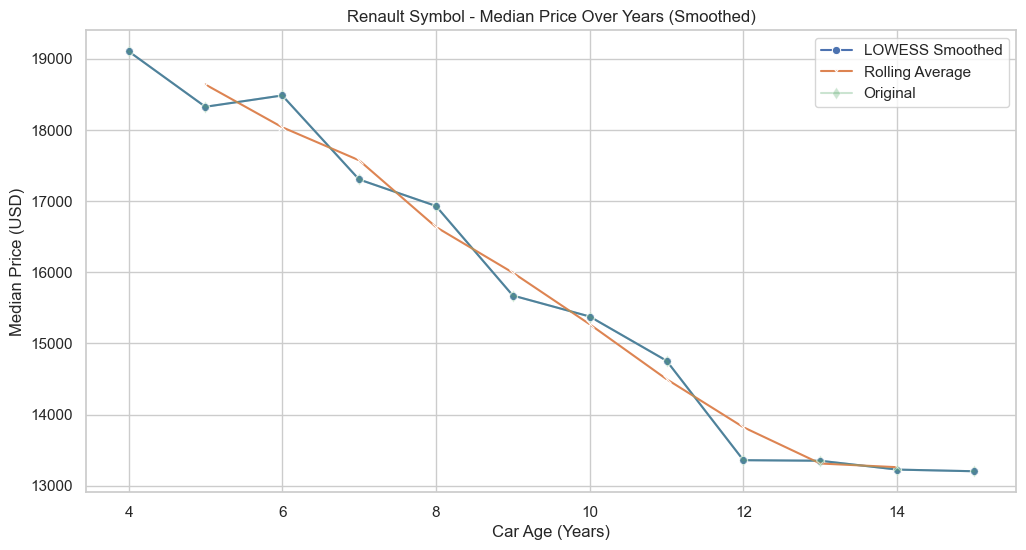

Renault Symbol - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 4              NaN         54  19105.312209
1                 5        -4.085366         42  18324.790308
2                 6         0.868828         43  18484.001243
3                 7        -6.386555        117  17303.510407
4                 8        -2.154399        154  16930.723827
5                 9        -7.431193        147  15672.569121
6                10        -1.883053        105  15377.446412
7                11        -4.040404        151  14756.135446
8                12        -9.473684        163  13358.185772
9                13        -0.058140        177  13350.419385
10               14        -0.930774        116  13226.157192
11               15        -0.176160         91  13202.858030
Processing Renault Fluence
Columns in median_prices for Renault Fluence: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       

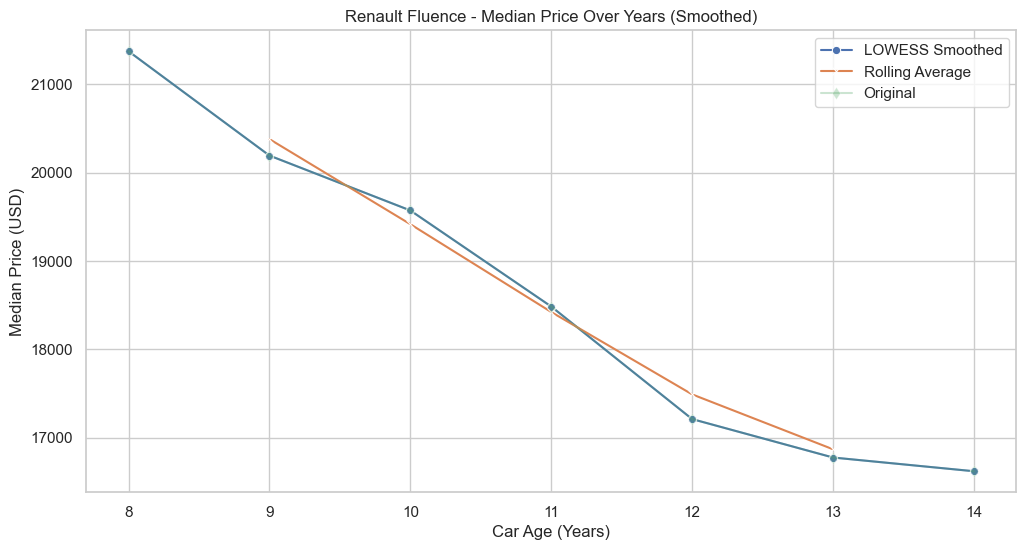

Renault Fluence - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                8              NaN        204  21373.097235
1                9        -5.523256        243  20192.606400
2               10        -3.076923        234  19571.295433
3               11        -5.555556        203  18484.001243
4               12        -6.890756        210  17210.313762
5               13        -2.527076        210  16775.396086
6               14        -0.925926         84  16620.068344
Processing Volkswagen Jetta
Columns in median_prices for Volkswagen Jetta: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


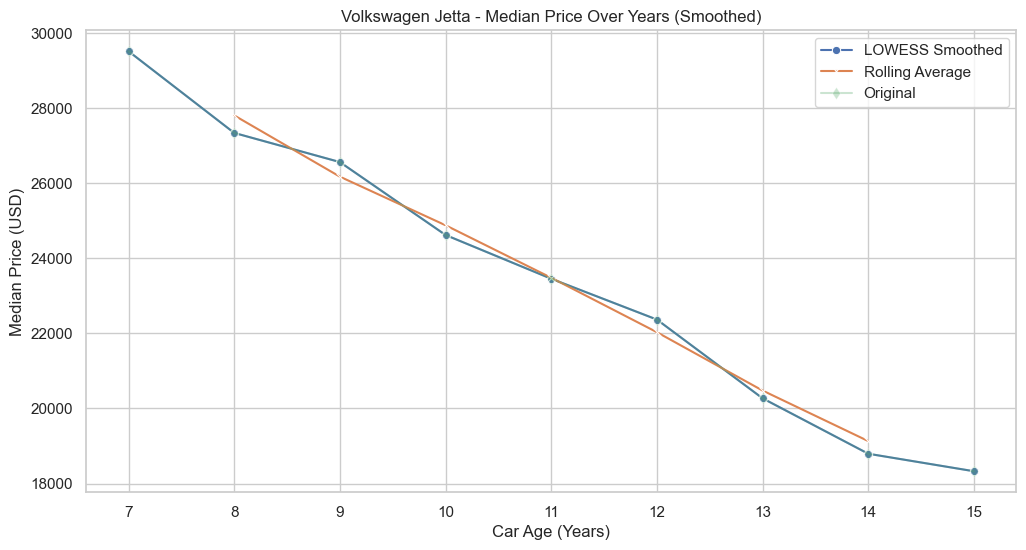

Volkswagen Jetta - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                7              NaN         85  29512.270892
1                8        -7.368421         94  27337.682510
2                9        -2.840909        175  26561.043802
3               10        -7.309942        164  24619.447033
4               11        -4.731861        168  23454.488972
5               12        -4.635762        202  22367.194781
6               13        -9.375000        118  20270.270270
7               14        -7.279693         39  18794.656726
8               15        -2.479339         24  18328.673501
Processing BMW 3 Series
Columns in median_prices for BMW 3 Series: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


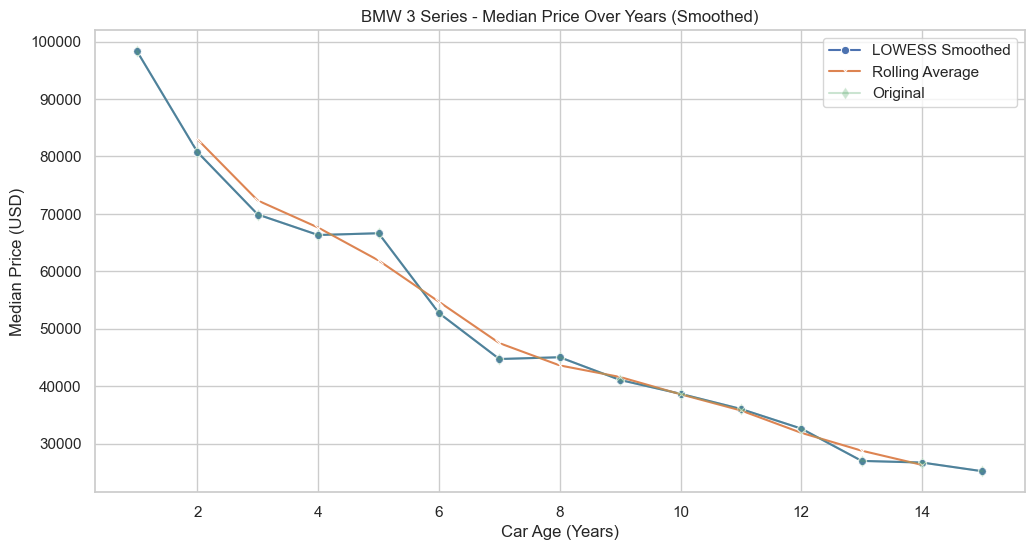

BMW 3 Series - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN          8  98322.460391
1                 2       -17.851501         15  80770.425598
2                 3       -13.461538         31  69897.483691
3                 4        -5.111111         31  66324.945635
4                 5         0.468384         13  66635.601118
5                 6       -20.862471         40  52733.768251
6                 7       -15.169367         41  44734.389562
7                 8         0.694444         99  45045.045045
8                 9        -8.793103        118  41084.187636
9                10        -5.860113        131  38676.607642
10               11        -6.827309         94  36036.036036
11               12        -9.482759        100  32618.825722
12               13       -17.238095         49  26995.961479
13               14        -1.064442         23  26708.605157
14               15        -

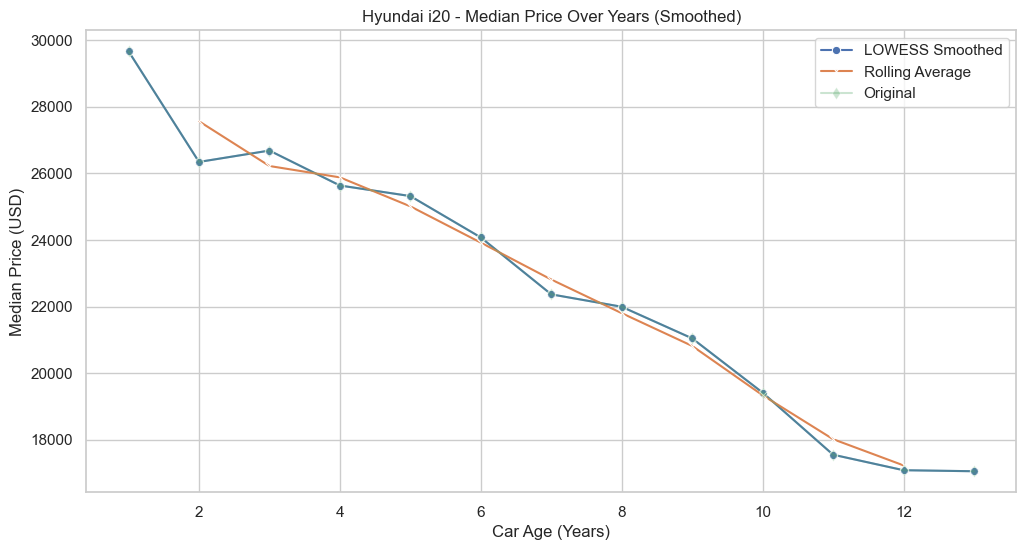

Hyundai i20 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         64  29667.598633
2                 2       -11.204188         62  26343.584964
3                 3         1.297170         63  26685.305996
4                 4        -3.931898         30  25636.067102
5                 5        -1.239056         31  25318.421870
6                 6        -4.907975         67  24075.799938
7                 7        -7.096774         78  22367.194781
8                 8        -1.666667        100  21994.408201
9                 9        -4.314972        106  21045.355701
10               10        -7.742269         77  19415.967692
11               11        -9.600000         57  17552.034793
12               12        -2.654867         38  17086.051569
13               13        -0.181818         11  17054.986021
Processing Hyundai Accent
No data available for Hyundai Accent after filtering for car coun

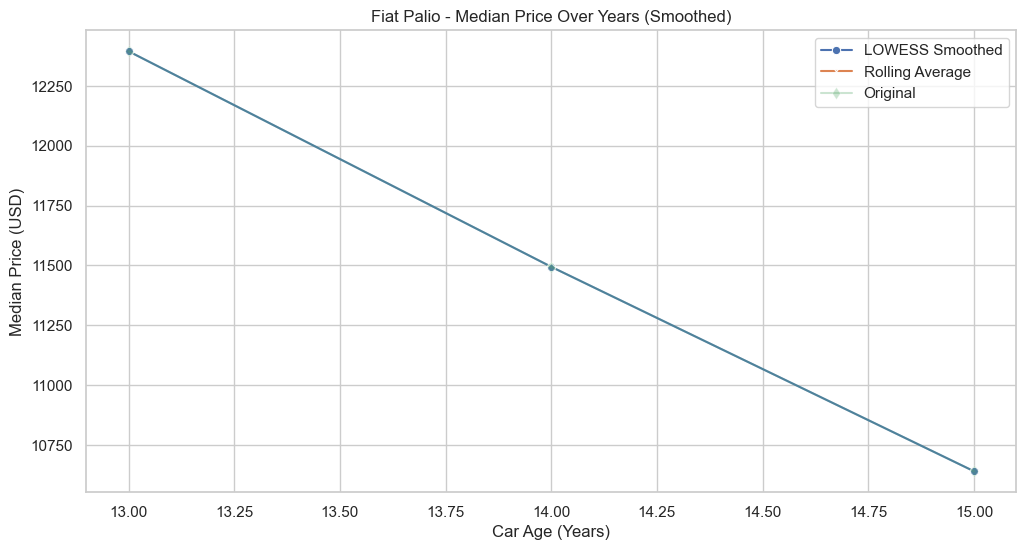

Fiat Palio - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
4               13              NaN         12  12395.153774
5               14        -7.268170         11  11494.252874
6               15        -7.432432         14  10639.950295
Processing Fiat Punto
Columns in median_prices for Fiat Punto: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


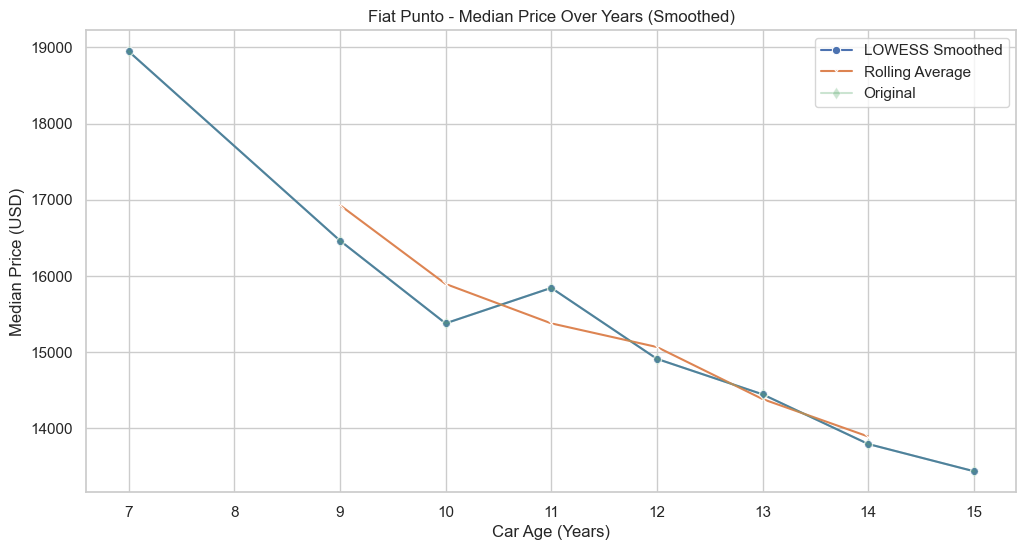

Fiat Punto - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                7              NaN          5  18949.984467
2                9       -13.114754         17  16464.740603
3               10        -6.603774         31  15377.446412
4               11         3.030303         63  15843.429637
5               12        -5.882353        128  14911.463187
6               13        -3.125000        147  14445.479963
7               14        -4.516129         47  13793.103448
8               15        -2.590090         65  13435.849643
Processing BMW 5 Series
Columns in median_prices for BMW 5 Series: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


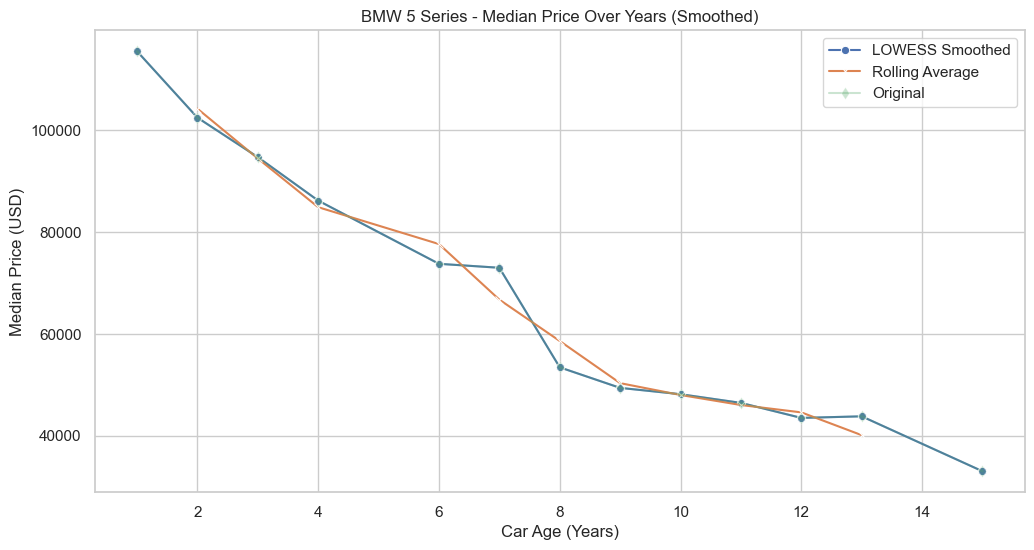

BMW 5 Series - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count      Price USD
0                 1              NaN         19  115563.839702
1                 2       -11.290323         19  102516.309413
2                 3        -7.575758         19   94749.922336
3                 4        -9.016393         27   86206.896552
5                 6       -14.414414         37   73780.677229
6                 7        -1.052632         65   73004.038521
7                 8       -26.808511         70   53432.743088
8                 9        -7.558140         61   49394.221808
9                10        -2.515723         62   48151.599876
10               11        -3.548387         52   46442.994719
11               12        -6.354582         51   43491.736564
12               13         0.714358         35   43802.423113
14               15       -24.645390          6   33007.145076
Processing Tofaş Doğan
No data available for Tofaş Doğan after applying filt

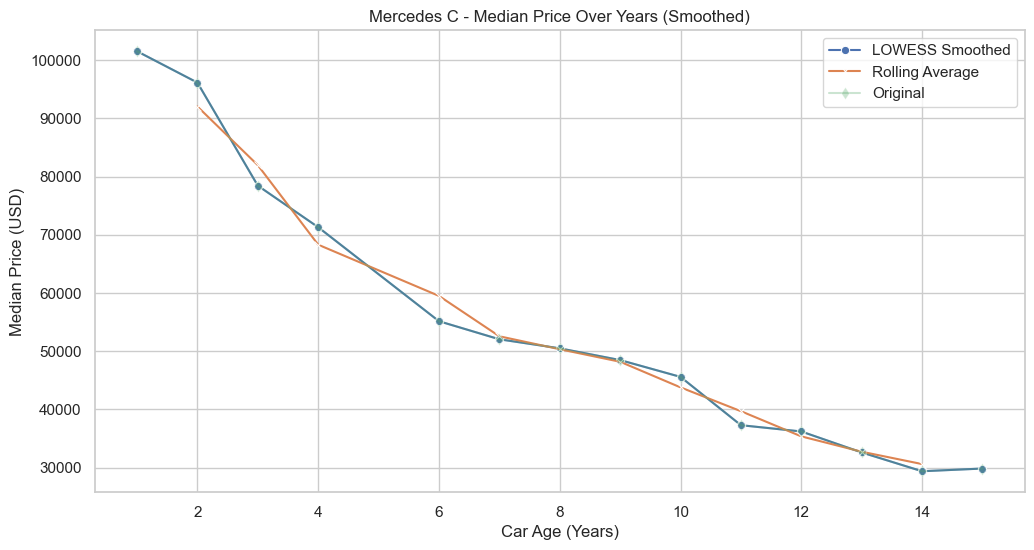

Mercedes C - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count      Price USD
0                 1              NaN         10  101537.744641
1                 2        -5.308245         29   96147.872010
2                 3       -18.416801         21   78440.509475
3                 4        -9.108911         23   71295.433364
5                 6       -22.657952         49   55141.348245
6                 7        -5.633803         81   52034.793414
7                 8        -2.985075        100   50481.515999
8                 9        -4.000000         69   48462.255359
9                10        -5.964744         24   45571.606089
10               11       -18.214663         33   37270.891581
11               12        -2.896437         47   36191.363778
12               13        -9.957082         45   32587.760174
13               14        -9.914204         23   29356.943150
14               15         1.587302         17   29822.926375
Processing Seat

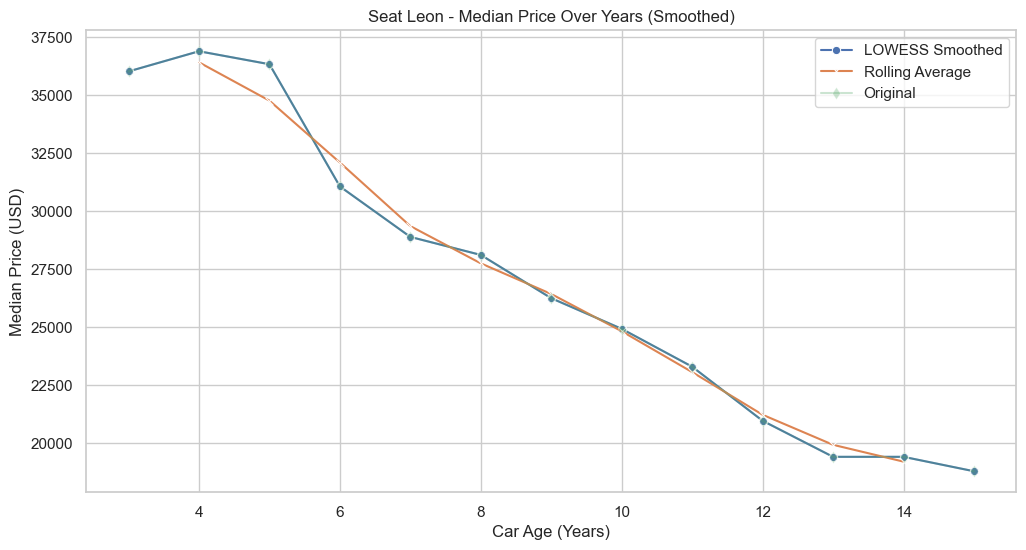

Seat Leon - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
2                 3              NaN         16  36020.503262
3                 4         2.414834         48  36890.338614
4                 5        -1.515789         25  36331.158745
5                 6       -14.493373         62  31065.548307
6                 7        -7.000000        103  28890.959925
7                 8        -2.688172        115  28114.321218
8                 9        -6.629834         67  26250.388319
9                10        -5.029586         40  24930.102516
10               11        -6.542056         23  23299.161230
11               12       -10.000000         25  20969.245107
12               13        -7.407407         21  19415.967692
13               14         0.000000         12  19415.967692
14               15        -3.200000          7  18794.656726
Processing Audi A3
Columns in median_prices for Audi A3: Index(['Car Age (Years)', 'Price USD

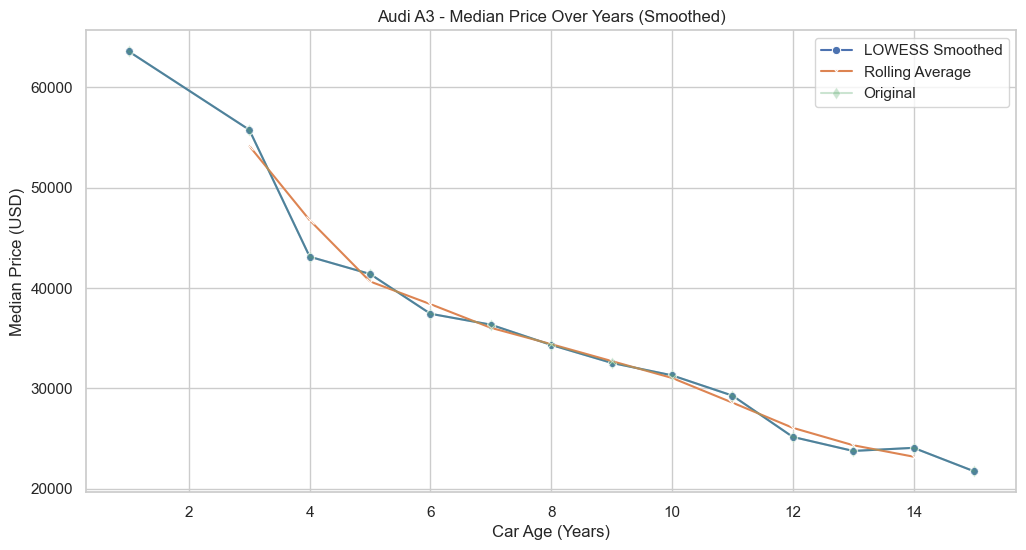

Audi A3 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         24  63591.177384
3                 3       -12.310699         15  55762.659211
4                 4       -22.674095         57  43118.981050
5                 5        -3.998559         36  41394.843119
6                 6        -9.568480         30  37433.985710
7                 7        -2.904564         59  36346.691519
8                 8        -5.555556         79  34327.430879
9                 9        -5.203620         86  32541.161852
10               10        -3.818616         42  31298.539919
11               11        -6.451613         40  29279.279279
12               12       -14.058355         43  25163.094129
13               13        -5.555556         23  23765.144455
14               14         1.307190         11  24075.799938
15               15        -9.690323         17  21742.777260
Processing Peugeot 206
Columns in

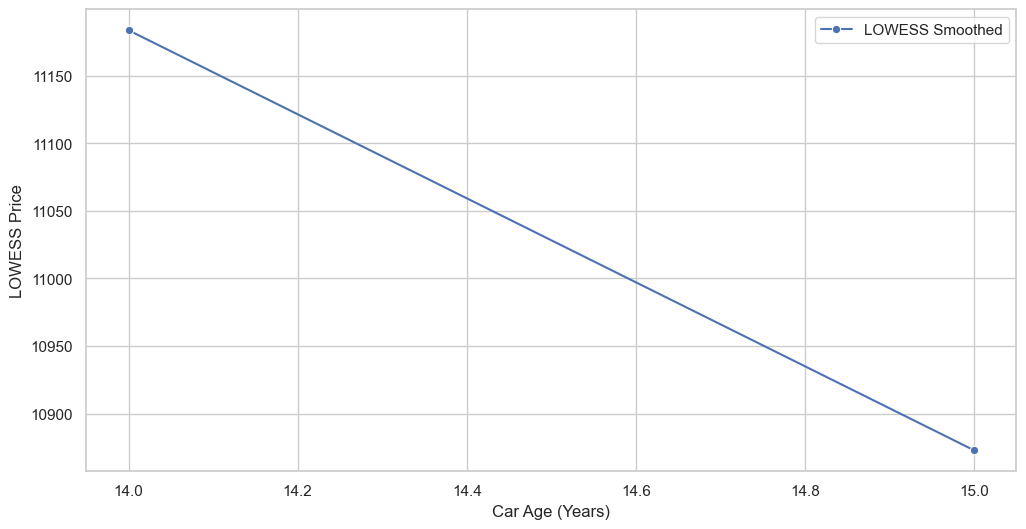

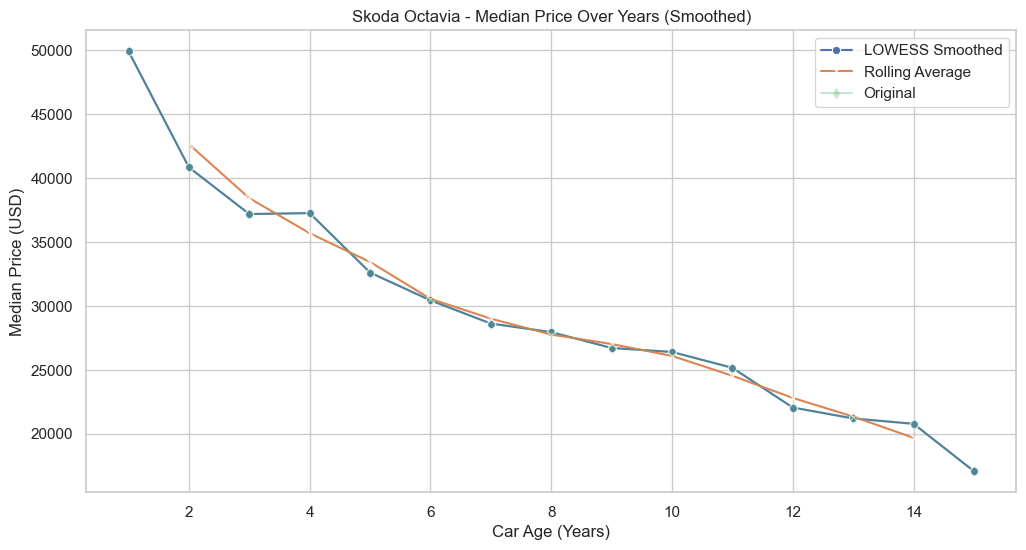

Skoda Octavia - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         10  49937.868903
2                 2       -18.195956          5  40851.196024
3                 3        -8.944867         26  37197.110904
4                 4         0.198351         11  37270.891581
5                 5       -12.481767         61  32618.825722
6                 6        -6.666667         39  30444.237341
7                 7        -5.969388         46  28626.902765
8                 8        -2.333152         76  27958.993476
9                 9        -4.444444         69  26716.371544
10               10        -1.162791         31  26405.716061
11               11        -4.705882         27  25163.094129
12               12       -12.345679         33  22056.539298
13               13        -3.873239         18  21202.236719
14               14        -1.978022         11  20782.851817
15               15       -

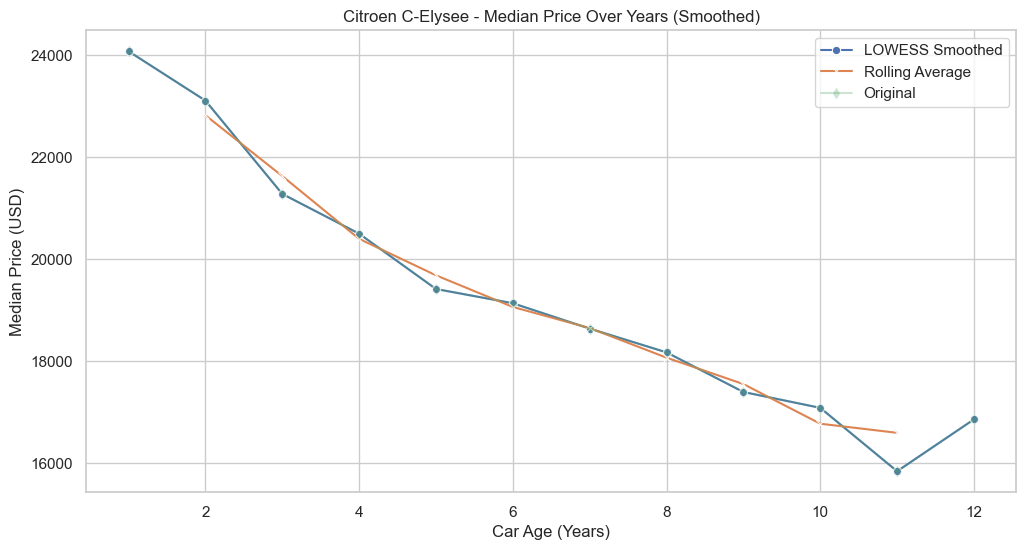

Citroen C-Elysee - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         17  24075.799938
1                 2        -4.016129         22  23108.884747
2                 3        -7.914636         39  21279.900590
3                 4        -3.664234         29  20500.155328
4                 5        -5.288680         30  19415.967692
5                 6        -1.440000         32  19136.377757
6                 7        -2.597565         59  18639.297919
7                 8        -2.499837         80  18173.345760
8                 9        -4.273504         69  17396.707052
9                10        -1.785714         40  17086.051569
10               11        -7.272727         69  15843.429637
11               12         6.421569          9  16860.826344
Processing Mercedes E
Columns in median_prices for Mercedes E: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS 

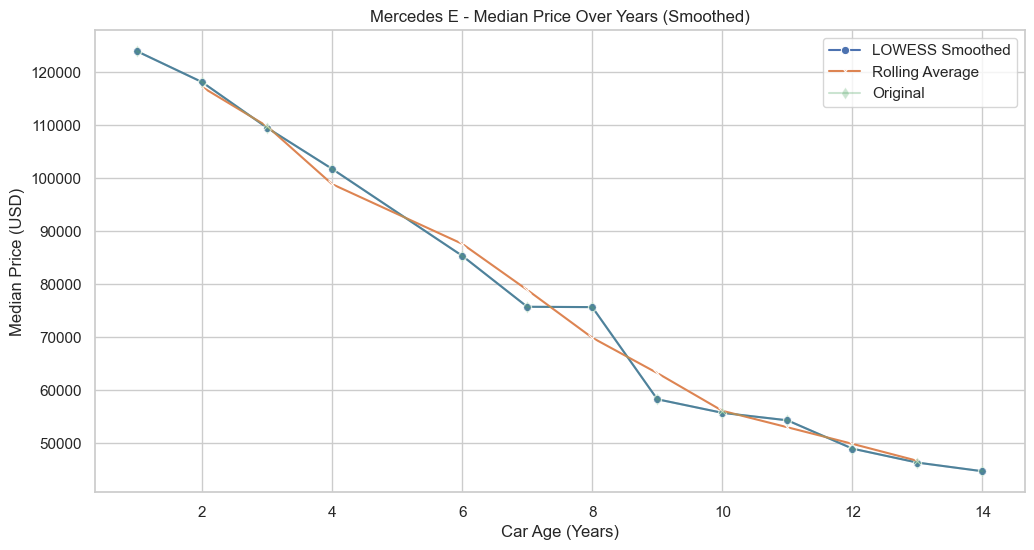

Mercedes E - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count      Price USD
0                 1              NaN         15  123951.537745
1                 2        -4.699248         16  118126.747437
2                 3        -7.297830          9  109506.057782
3                 4        -7.092199         31  101739.670705
5                 6       -16.122137         22   85337.061199
6                 7       -11.286858         24   75705.187947
7                 8        -0.080018         30   75644.610127
8                 9       -23.000000         38   58246.349798
9                10        -4.397451         42   55684.995340
10               11        -2.538354         29   54271.512892
11               12        -9.845449         19   48928.238583
12               13        -5.396825         27   46287.666977
13               14        -3.526846         14   44655.172414
Processing Dacia Sandero
Columns in median_prices for Dacia Sandero: Index(['C

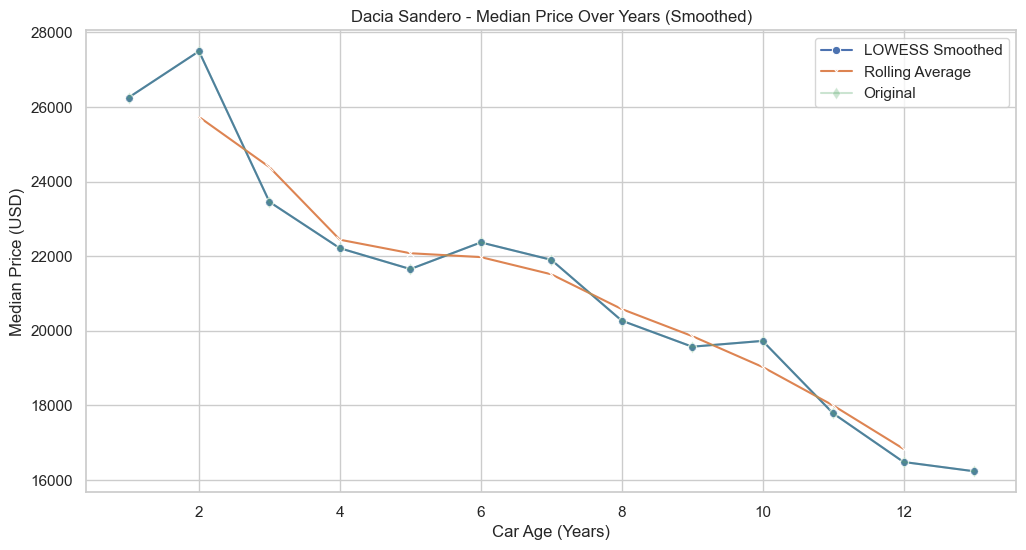

Dacia Sandero - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN          8  26249.611681
1                 2         4.736827          8  27493.010252
2                 3       -14.689266         27  23454.488972
3                 4        -5.298013         25  22211.867039
4                 5        -2.517483         42  21652.687170
5                 6         3.299857         37  22367.194781
6                 7        -2.083333         68  21901.211556
7                 8        -7.446809         65  20270.270270
8                 9        -3.448276         44  19571.295433
9                10         0.793651         15  19726.623175
10               11        -9.842520         34  17785.026406
11               12        -7.336245         16  16480.273377
12               13        -1.508011         14  16231.748990
Processing Hyundai Accent Blue
Columns in median_prices for Hyundai Accent Blue: Index(['

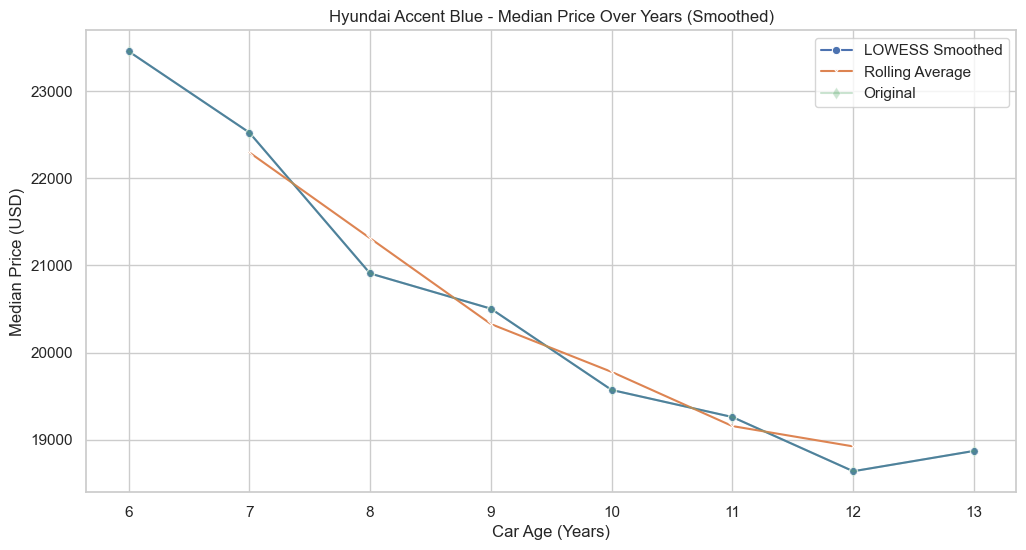

Hyundai Accent Blue - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
1                6              NaN         59  23454.488972
2                7        -3.973510         43  22522.522523
3                8        -7.172414         62  20907.114011
4                9        -1.931649         93  20503.261883
5               10        -4.545455         62  19571.295433
6               11        -1.587302         60  19260.639950
7               12        -3.225806         76  18639.328984
8               13         1.250000         16  18872.320596
Processing Citroen C4
Columns in median_prices for Citroen C4: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


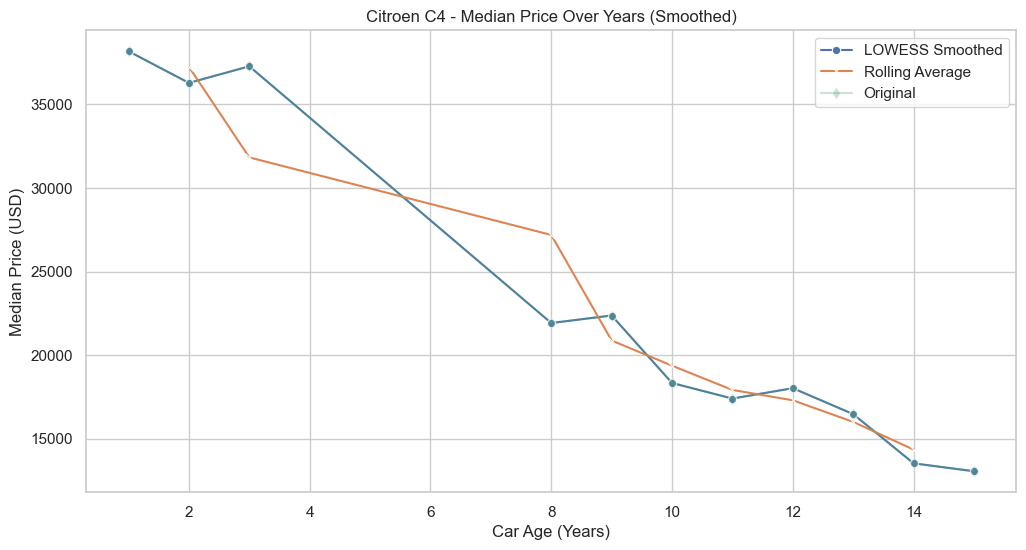

Citroen C4 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         13  38179.558869
1                 2        -4.963385          7  36284.560422
2                 3         2.739726          7  37278.657968
7                 8       -41.208333          7  21916.744331
8                 9         2.055280         17  22367.194781
9                10       -18.055556         18  18328.673501
10               11        -5.084746         32  17396.707052
11               12         3.571429         96  18018.018018
12               13        -8.620690         45  16464.740603
13               14       -17.877358         20  13521.279901
14               15        -3.503733         34  13047.530289
Processing Audi A4
Columns in median_prices for Audi A4: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


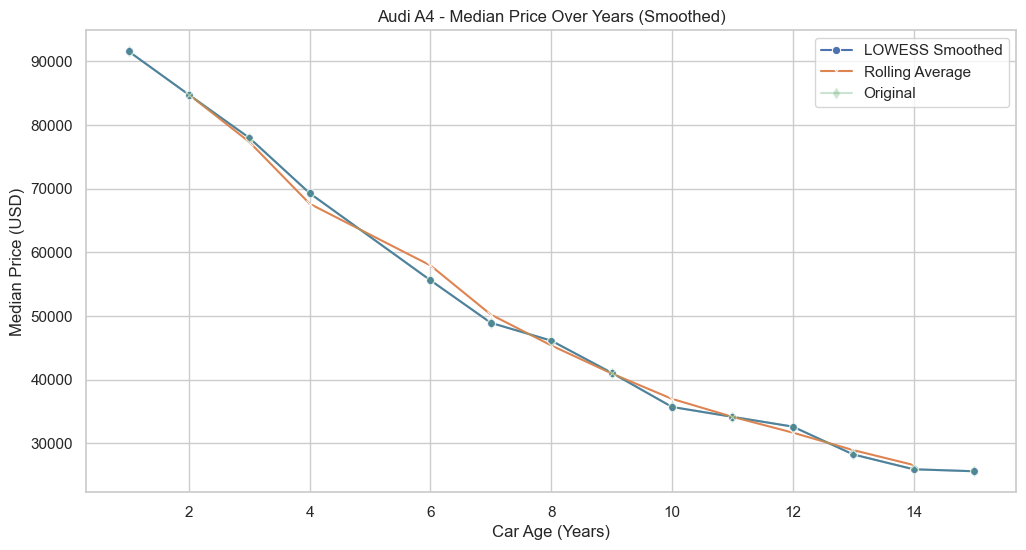

Audi A4 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN          8  91565.703635
1                 2        -7.463953          8  84731.283007
2                 3        -7.974354          8  77974.510718
3                 4       -11.155361         13  69276.172724
5                 6       -19.730942         37  55607.331469
6                 7       -12.011173         39  48928.238583
7                 8        -5.714286         50  46132.339236
8                 9       -10.942761         32  41084.187636
9                10       -13.043478         39  35725.380553
10               11        -4.347826         20  34172.103138
11               12        -4.500000         18  32634.358496
12               13       -13.374584         28  28269.648959
13               14        -8.241758         20  25939.732836
14               15        -1.197605         12  25629.077353
Processing Ford Mondeo
Columns in

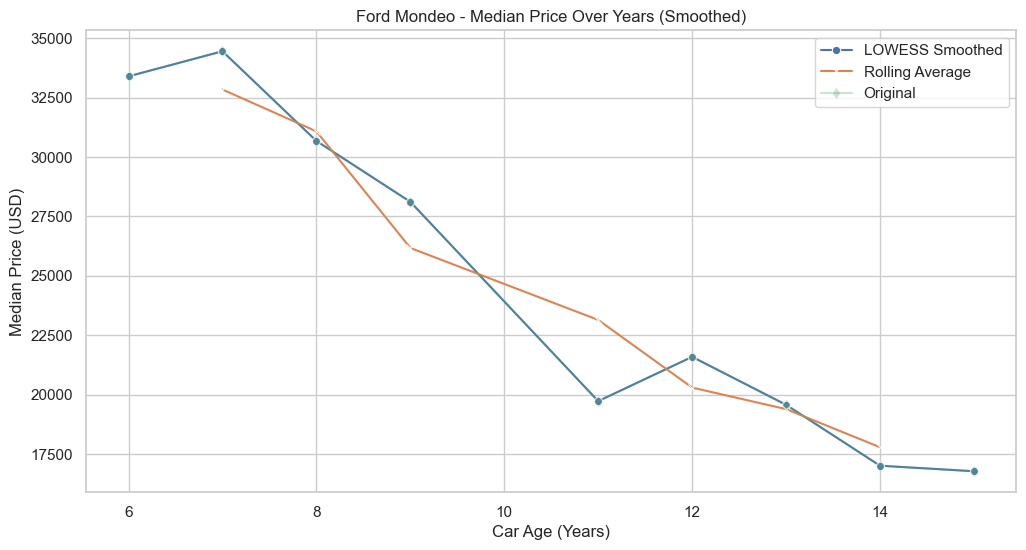

Ford Mondeo - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
2                 6              NaN          5  33395.464430
3                 7         3.162791          9  34451.693072
4                 8       -10.955816         13  30677.228953
5                 9        -8.354430         33  28114.321218
7                11       -29.834254          7  19726.623175
8                12         9.448819         33  21590.556073
9                13        -9.352518         37  19571.295433
10               14       -13.095238         22  17008.387698
11               15        -1.369863         29  16775.396086
Processing Seat Ibiza
Columns in median_prices for Seat Ibiza: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


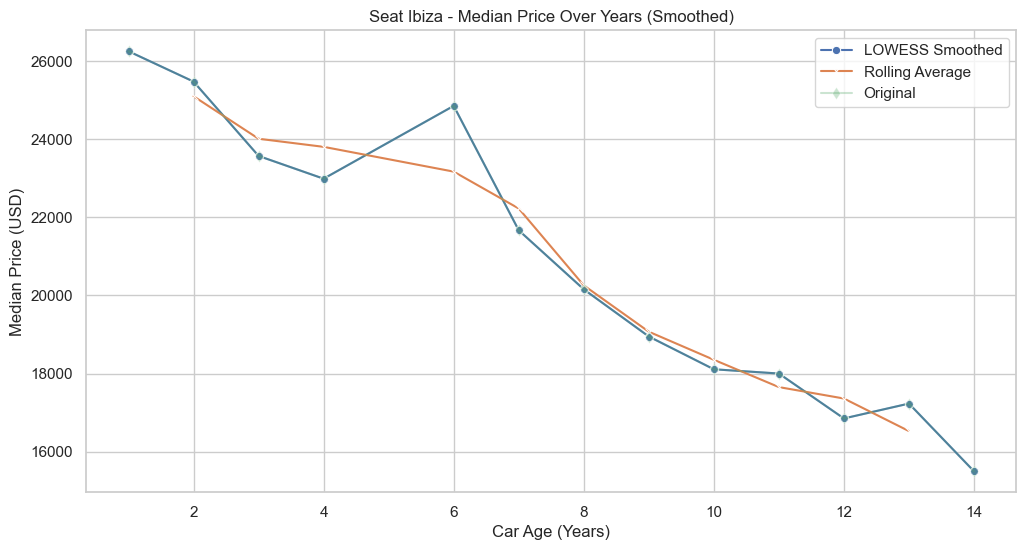

Seat Ibiza - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         11  26250.388319
1                 2        -2.958580         12  25473.749612
2                 3        -7.469512         24  23570.984778
3                 4        -2.471170         10  22988.505747
5                 6         8.108108          9  24852.438646
6                 7       -12.812500         38  21668.219944
7                 8        -6.971326         56  20157.657658
8                 9        -5.991139         49  18949.984467
9                10        -4.426230         35  18111.214663
10               11        -0.600343         28  18002.485244
11               12        -6.384814         28  16853.059957
12               13         2.258065         18  17233.612923
13               14       -10.049572          5  15501.708605
Processing Chevrolet Cruze
Columns in median_prices for Chevrolet Cruze: Index(['Car Age (Ye

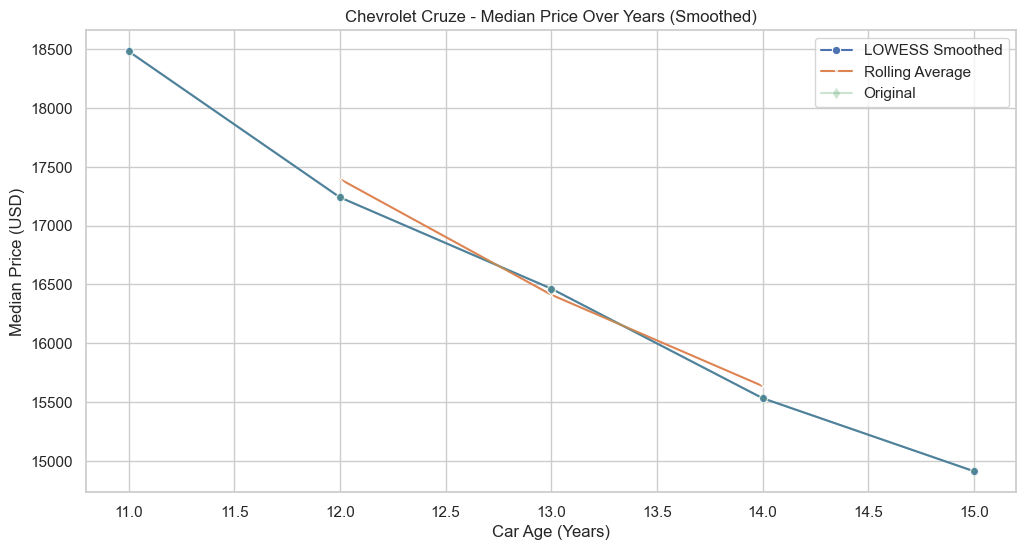

Chevrolet Cruze - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0               11              NaN         41  18484.001243
1               12        -6.722689        144  17241.379310
2               13        -4.504505        120  16464.740603
3               14        -5.660377        111  15532.774153
4               15        -4.000000         15  14911.463187
Processing Citroen C3
Columns in median_prices for Citroen C3: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


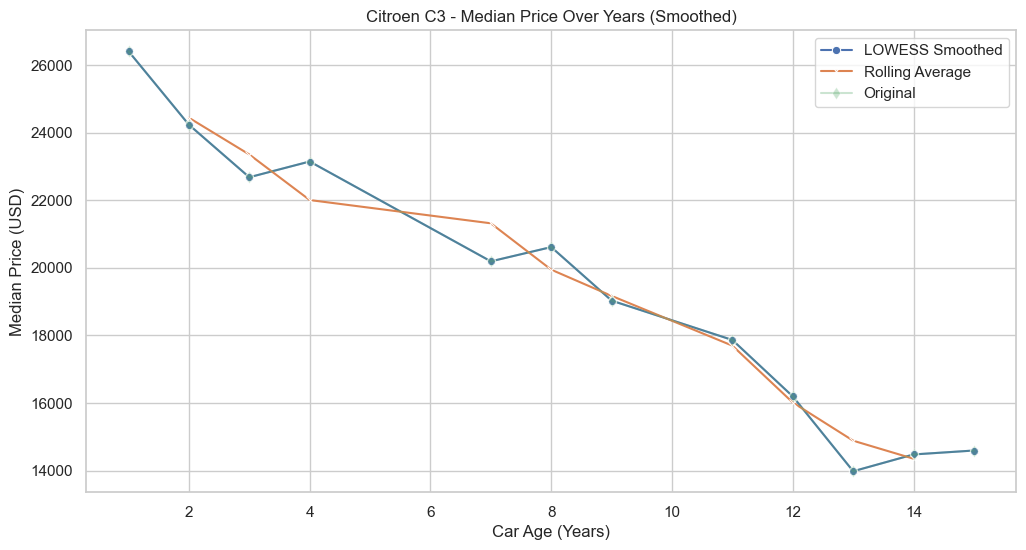

Citroen C3 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 1              NaN         34  26405.716061
2                 2        -8.235294         16  24231.127679
3                 3        -6.410256         29  22677.850264
4                 4         2.054795         38  23143.833489
7                 7       -12.765101         25  20189.499845
8                 8         2.092630          6  20611.991302
9                 9        -7.686511          6  19027.648338
11               11        -6.122449         14  17862.690276
12               12        -9.347826         20  16192.917055
13               13       -13.669065         27  13979.496738
14               14         3.555556         12  14476.545511
15               15         0.804721          6  14593.041317
Processing Skoda SuperB
Columns in median_prices for Skoda SuperB: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Pr

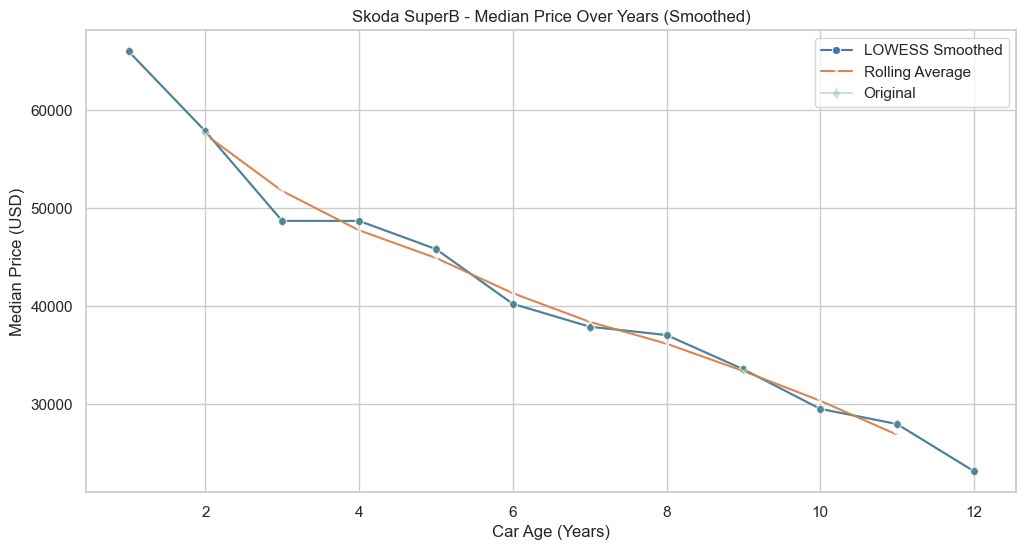

Skoda SuperB - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         19  66014.290152
1                 2       -12.376471         12  57844.050947
2                 3       -15.816327         12  48695.246971
3                 4         0.000000         42  48695.246971
4                 5        -5.901116         21  45821.683753
5                 6       -12.203390         35  40229.885057
6                 7        -5.791506         61  37899.968934
7                 8        -2.254098         46  37045.666356
8                 9        -9.433962         28  33550.792171
9                10       -12.037037         18  29512.270892
10               11        -5.263158         14  27958.993476
11               12       -17.222222          9  23143.833489
Processing Skoda Fabia
Columns in median_prices for Skoda Fabia: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Pr

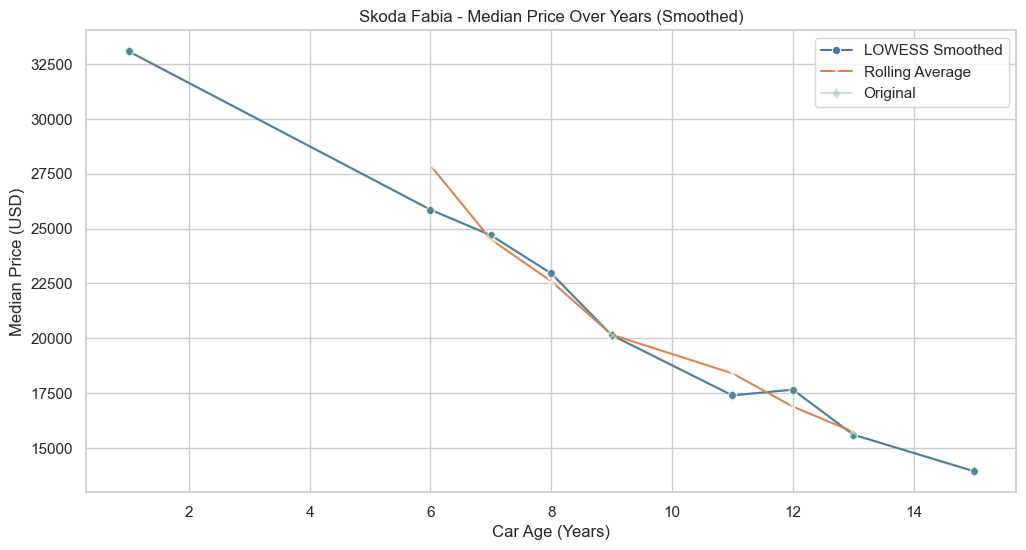

Skoda Fabia - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         12  33084.808947
5                 6       -21.830986          8  25862.068966
6                 7        -4.504505         13  24697.110904
7                 8        -7.044025         18  22957.440199
8                 9       -12.246279         15  20146.008077
10               11       -13.646877          5  17396.707052
11               12         1.517857         18  17660.764212
12               13       -11.609499         30  15610.438024
14               15       -10.696517          6  13940.664803
Processing Chevrolet Aveo
Columns in median_prices for Chevrolet Aveo: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


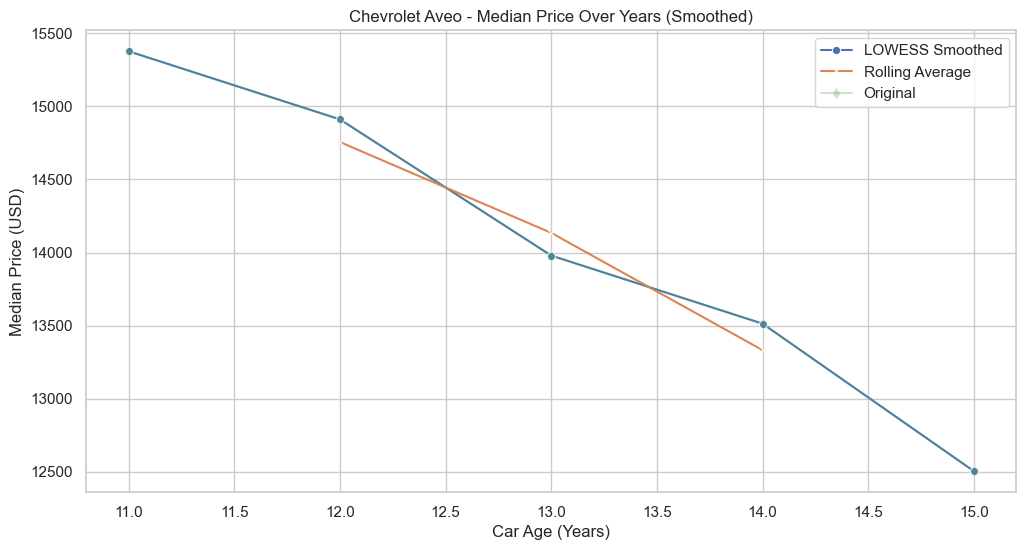

Chevrolet Aveo - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
1               11              NaN         31  15377.446412
2               12        -3.030303        127  14911.463187
3               13        -6.250000         85  13979.496738
4               14        -3.333333         21  13513.513514
5               15        -7.471264         16  12503.883194
Processing BMW 1 Series
Columns in median_prices for BMW 1 Series: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


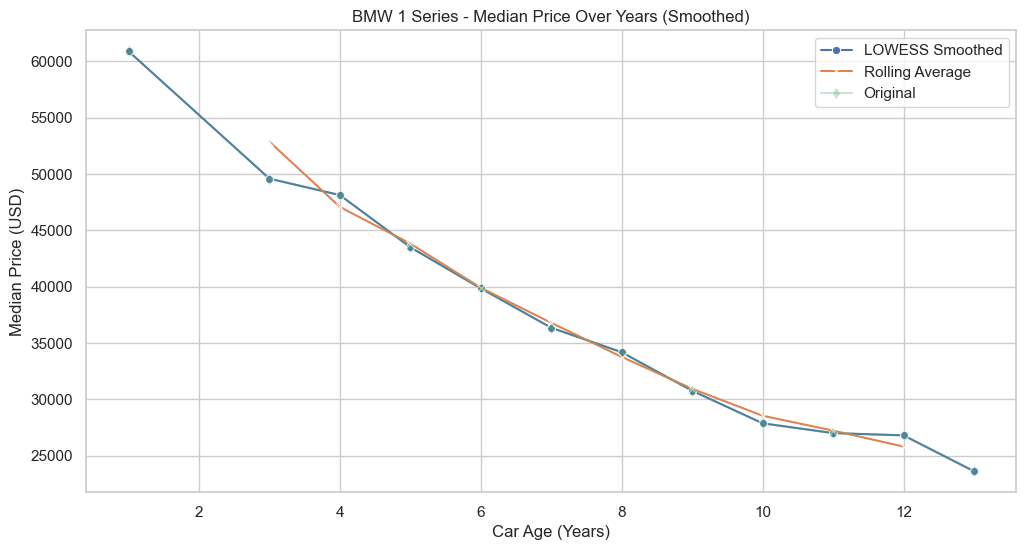

BMW 1 Series - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN          5  60888.474682
2                 3       -18.571429         13  49580.615098
3                 4        -2.947995         13  48118.981050
4                 5        -9.616192          7  43491.767630
5                 6        -8.392857         12  39841.565704
6                 7        -8.771930         29  36346.691519
7                 8        -5.982906         31  34172.103138
8                 9       -10.000000         35  30754.892824
9                10        -9.393939         32  27865.796831
10               11        -3.121516         25  26995.961479
11               12        -0.747986         42  26794.035415
12               13       -11.884058         27  23609.816713
Processing Peugeot 301
Columns in median_prices for Peugeot 301: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Pr

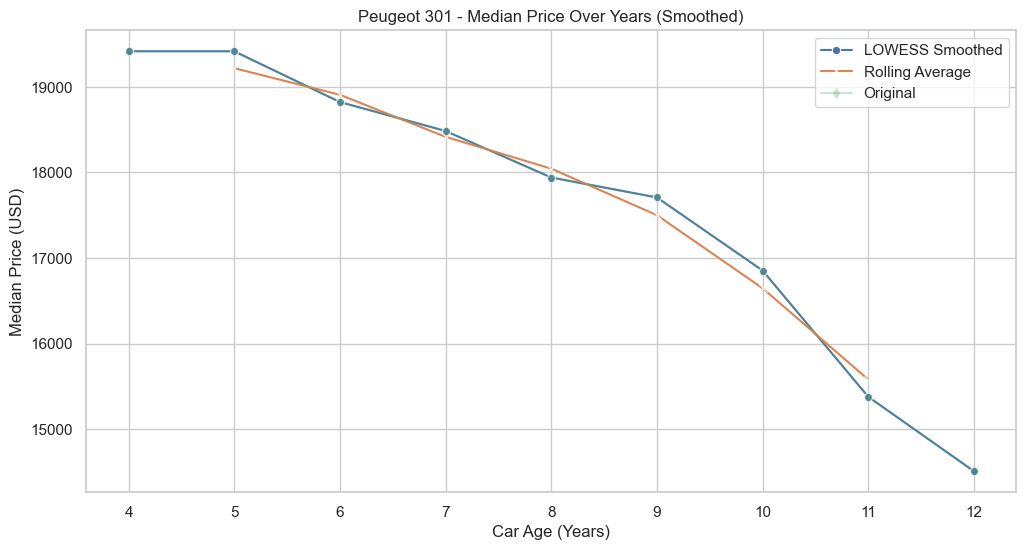

Peugeot 301 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                4              NaN         39  19415.967692
1                5         0.000000         37  19415.967692
2                6        -3.056000         53  18822.615719
3                7        -1.798977         58  18484.001243
4                8        -2.941176         36  17940.354147
5                9        -1.298701         24  17707.362535
6               10        -4.824561         20  16853.059957
7               11        -8.755760         19  15377.446412
8               12        -5.656566          5  14507.611059
Processing Renault Laguna
Columns in median_prices for Renault Laguna: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Renault Laguna: 'y'
Processing Hyundai Accent Era
Columns in median_prices for Hyundai Accent Era: Index(['Car Age (Years)', '

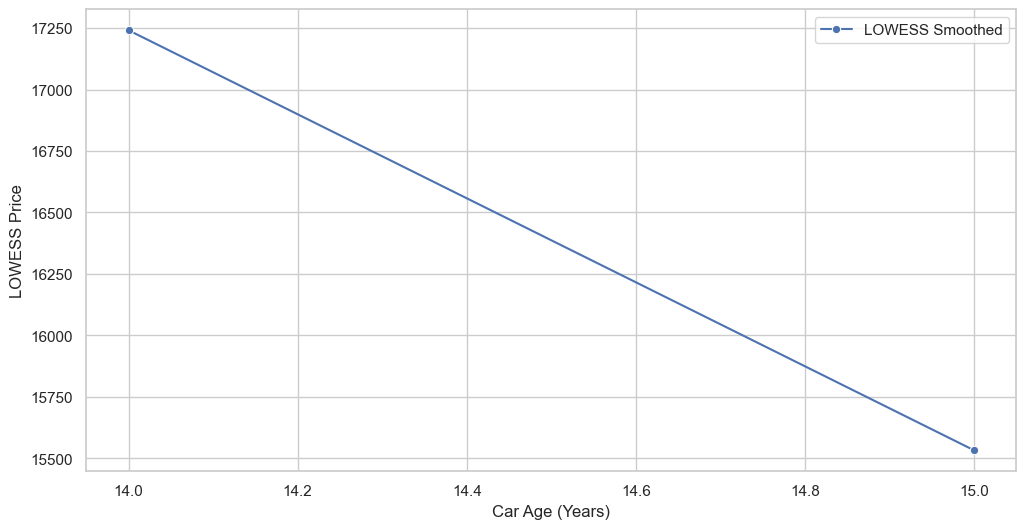

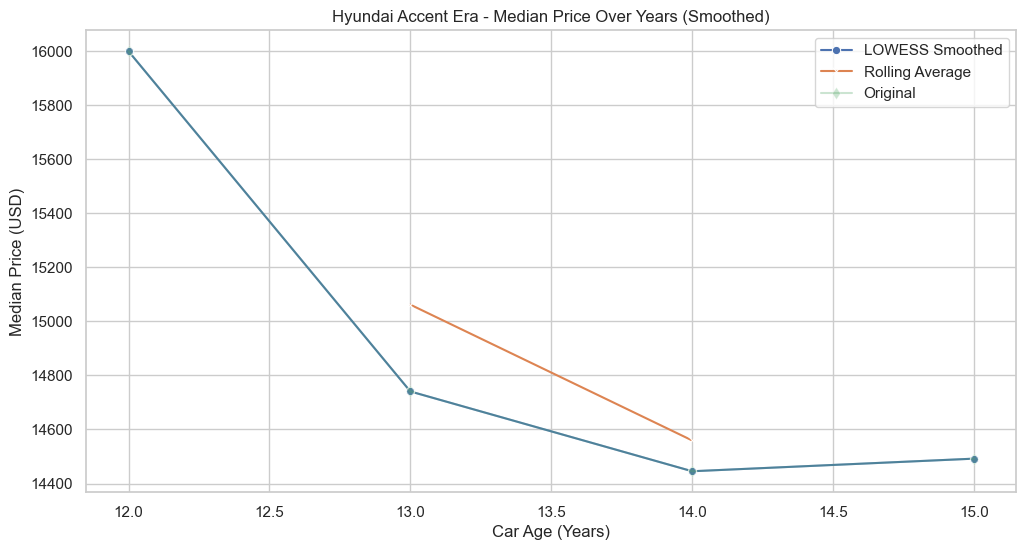

Hyundai Accent Era - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0               12              NaN         29  15998.757378
1               13        -7.864078         64  14740.602672
2               14        -2.002107         78  14445.479963
3               15         0.322581         64  14492.078285
Processing Nissan Micra
Columns in median_prices for Nissan Micra: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


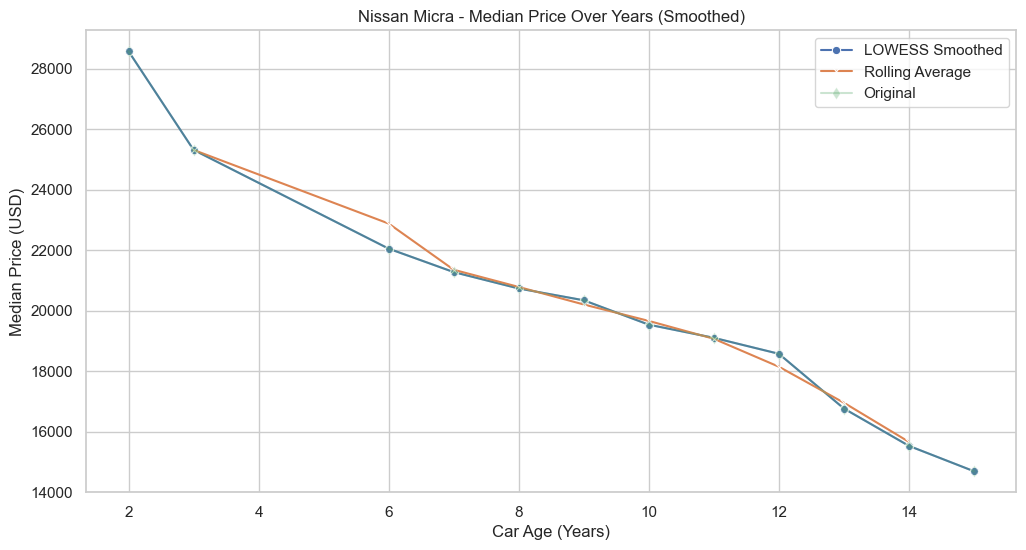

Nissan Micra - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 2              NaN          9  28580.304442
1                 3       -11.413043          5  25318.421870
4                 6       -12.895706         29  22053.432743
5                 7        -3.514580         28  21278.347313
6                 8        -2.547631         16  20736.253495
7                 9        -1.880150         24  20346.380864
8                10        -3.962135         15  19540.229885
9                11        -2.225755          7  19105.312209
10               12        -2.764228         10  18577.197888
11               13        -9.740803         15  16767.629699
12               14        -7.364521          9  15532.774153
13               15        -5.400200          6  14693.973284
Processing Kia Rio
Columns in median_prices for Kia Rio: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'P

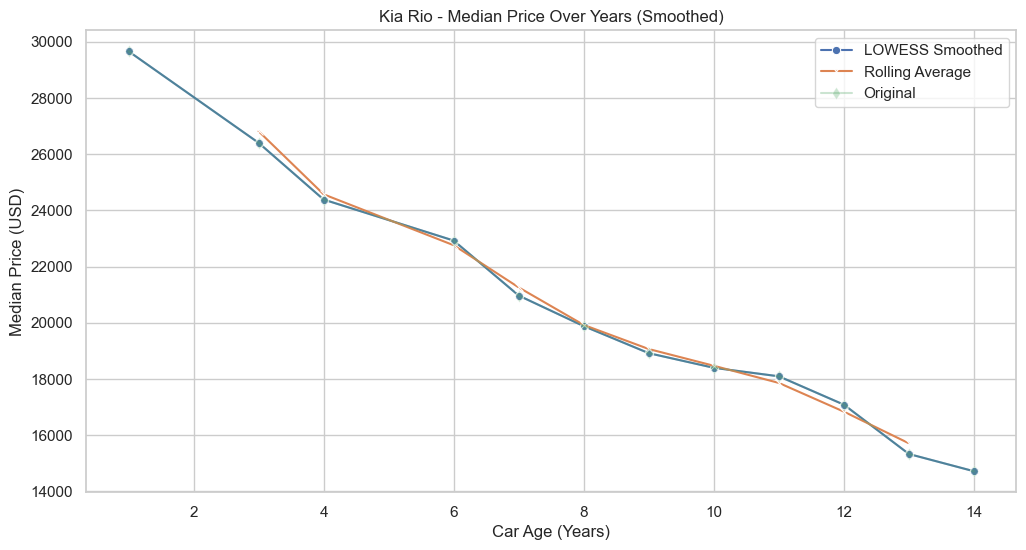

Kia Rio - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN          5  29664.492078
2                 3       -10.985444         11  26405.716061
3                 4        -7.647059         20  24386.455421
5                 6        -5.987261         11  22926.374651
6                 7        -8.536585         23  20969.245107
7                 8        -5.185185         39  19881.950916
8                 9        -4.843750         16  18918.918919
9                10        -2.750411         28  18398.570985
10               11        -1.646264         22  18095.681889
11               12        -5.579399         15  17086.051569
12               13       -10.272727          6  15330.848089
13               14        -4.002026          8  14717.303510
Processing Dacia Logan
Columns in median_prices for Dacia Logan: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price',

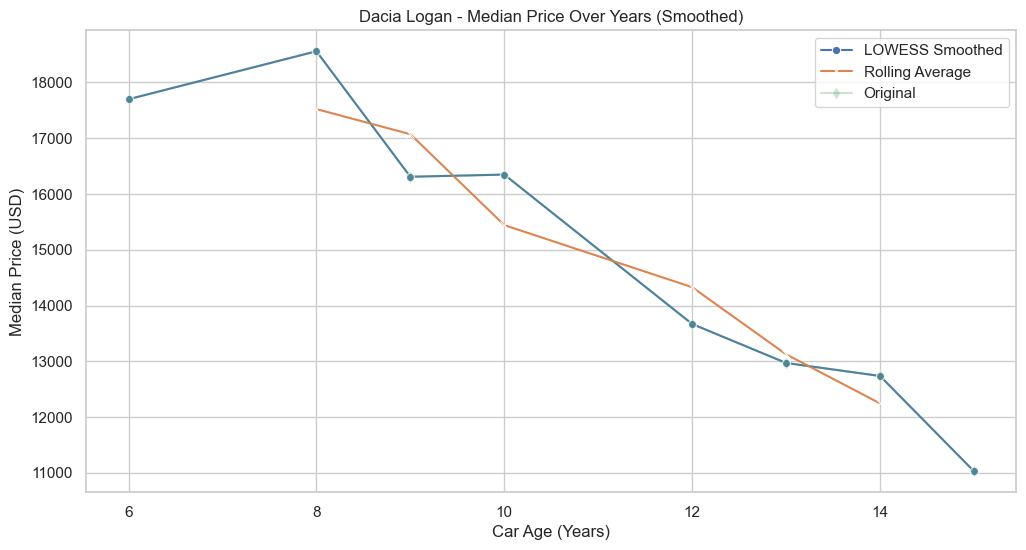

Dacia Logan - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
3                 6              NaN          5  17699.596148
5                 8         4.861781          8  18560.111836
6                 9       -12.126538         11  16309.412861
7                10         0.238095         14  16348.244797
9                12       -16.389549         25  13668.841255
10               13        -5.113636         38  12969.866418
11               14        -1.796407          8  12736.874806
12               15       -13.414634         11  11028.269649
Processing Audi A6
Columns in median_prices for Audi A6: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


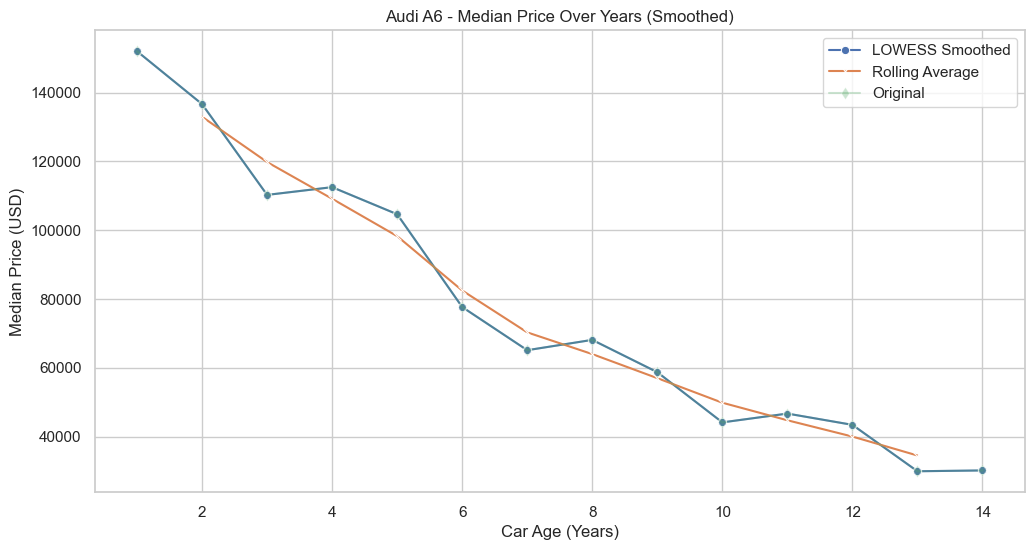

Audi A6 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count      Price USD
0                 1              NaN         15  152065.858962
1                 2       -10.112360          6  136688.412550
2                 3       -19.318182          9  110282.696490
3                 4         2.040845         10  112533.395464
4                 5        -7.000097         10  104655.949053
5                 6       -25.791251          9   77663.870767
6                 7       -16.164000         15   65110.282696
7                 8         4.608999         22   68111.214663
8                 9       -13.797035         15   58713.886300
9                10       -24.867725          5   44113.078596
10               11         5.809859         18   46675.986331
11               12        -7.021631         32   43398.570985
12               13       -31.102362         16   29900.590245
13               14         0.779221          8   30133.581858
Processing Hyundai

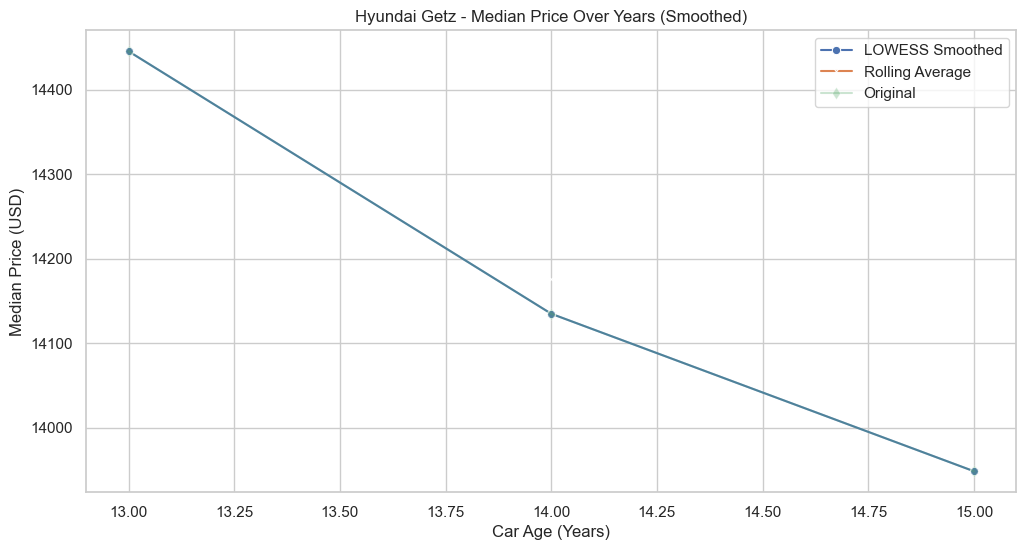

Hyundai Getz - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0               13              NaN         21  14445.479963
1               14        -2.150538         29  14134.824480
2               15        -1.318681         27  13948.431190
Processing Tofaş Kartal
No data available for Tofaş Kartal after applying filters.
Processing Peugeot 308
Columns in median_prices for Peugeot 308: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


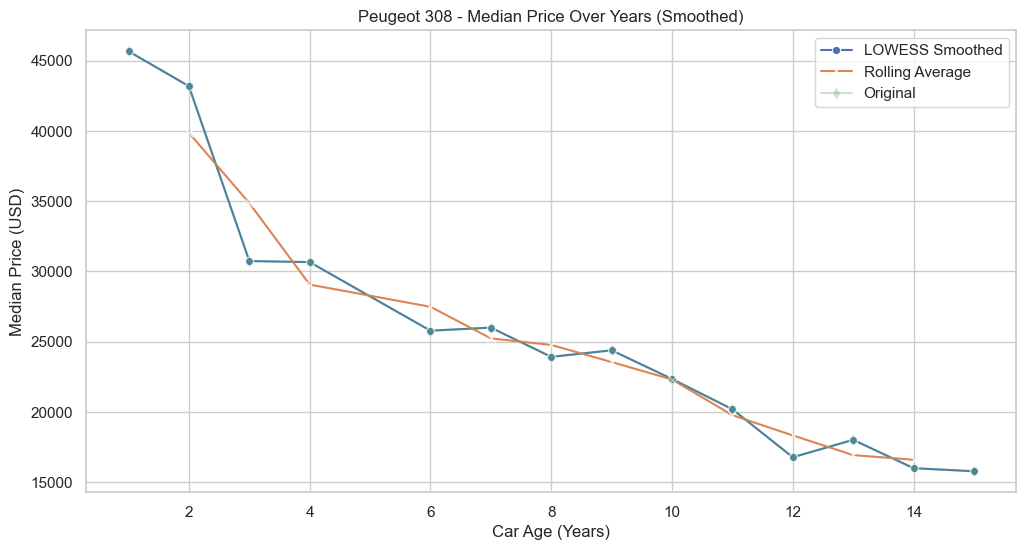

Peugeot 308 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         10  45666.356011
1                 2        -5.442177         10  43181.112147
2                 3       -28.812950         12  30739.360050
3                 4        -0.252653         13  30661.696179
5                 6       -15.906788          5  25784.405095
6                 7         0.843373         12  26001.863933
7                 8        -8.004779         20  23920.472196
8                 9         1.948052         19  24386.455421
9                10        -8.359873         12  22347.778813
10               11        -9.643788         11  20192.606400
11               12       -16.923077          7  16775.396086
12               13         7.407407         25  18018.018018
13               14       -11.206897         13  15998.757378
14               15        -1.359223         15  15781.298540
Processing Toyota Auris
Colum

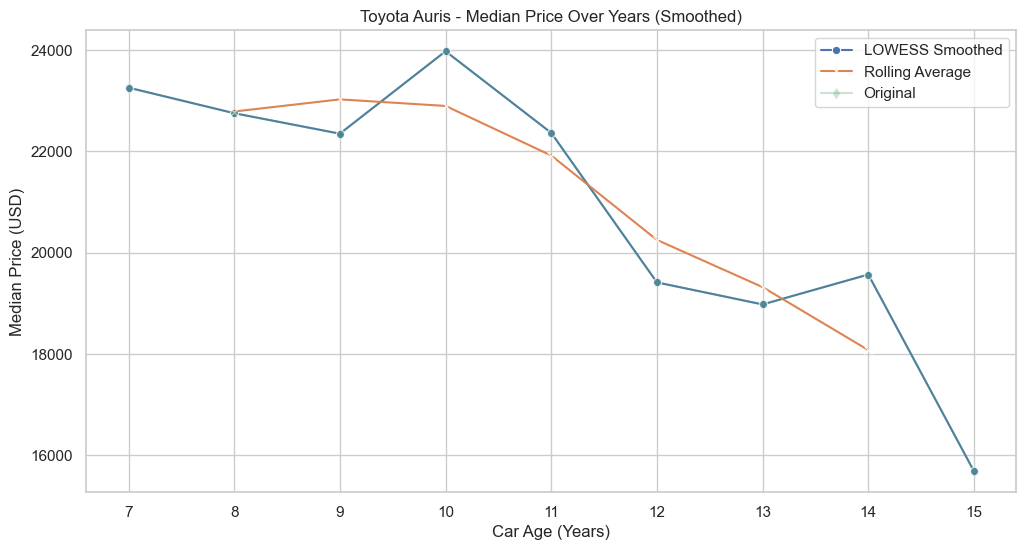

Toyota Auris - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                7              NaN          9  23260.329295
1                8        -2.170284         16  22755.514135
2                9        -1.774744         18  22351.662007
3               10         7.279361         14  23978.720099
4               11        -6.720648         31  22367.194781
5               12       -13.194444         39  19415.967692
6               13        -2.240000         33  18981.050016
7               14         3.109656          7  19571.295433
8               15       -19.841270          5  15688.101895
Processing Volvo S40
Columns in median_prices for Volvo S40: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


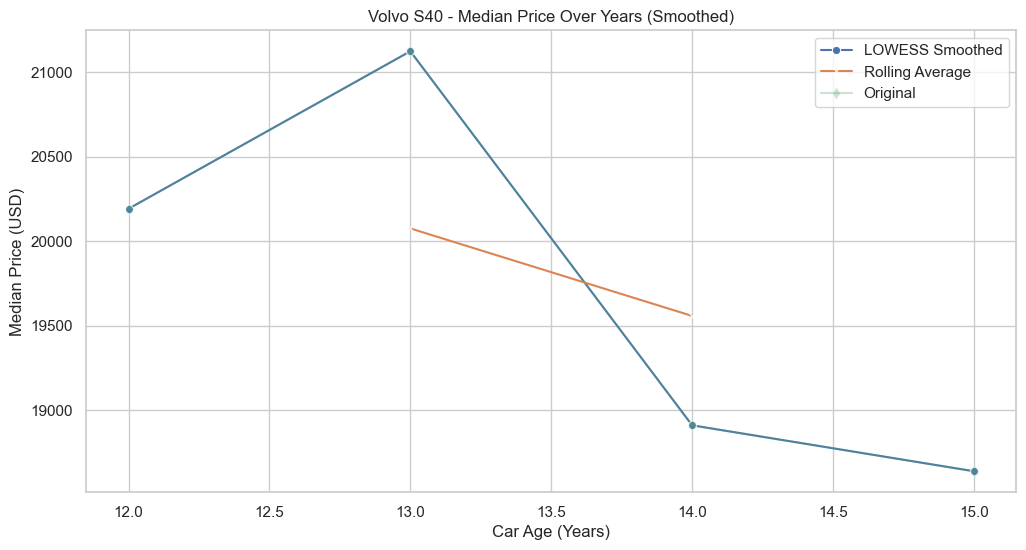

Volvo S40 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0               12              NaN         17  20192.606400
1               13         4.615385         19  21124.572849
2               14       -10.477941         16  18911.152532
3               15        -1.437372         19  18639.328984
Processing Peugeot 207
Columns in median_prices for Peugeot 207: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


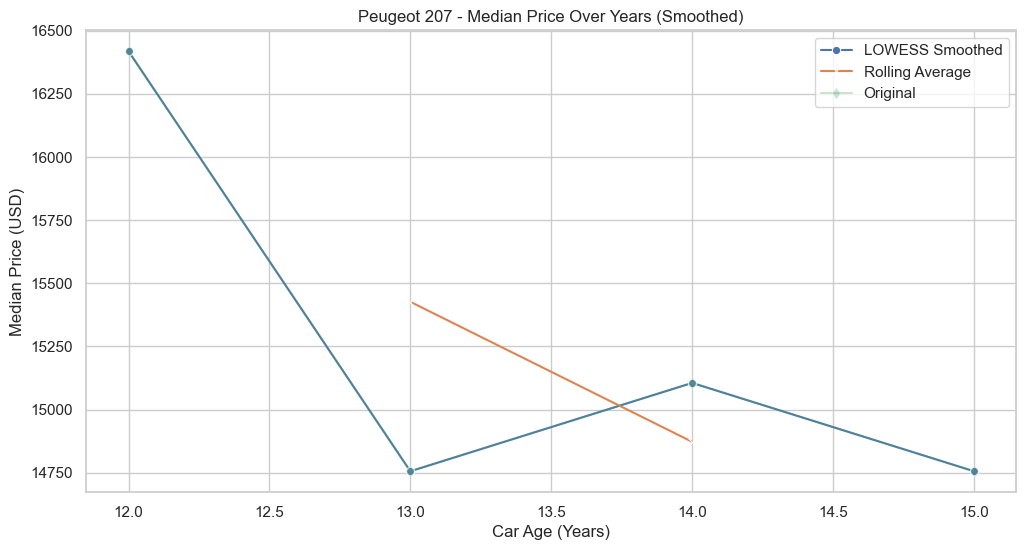

Peugeot 207 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0               12              NaN          6  16418.142280
1               13       -10.122990         34  14756.135446
2               14         2.368421         26  15105.622864
3               15        -2.313625         33  14756.135446
Processing Citroen C5
Columns in median_prices for Citroen C5: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


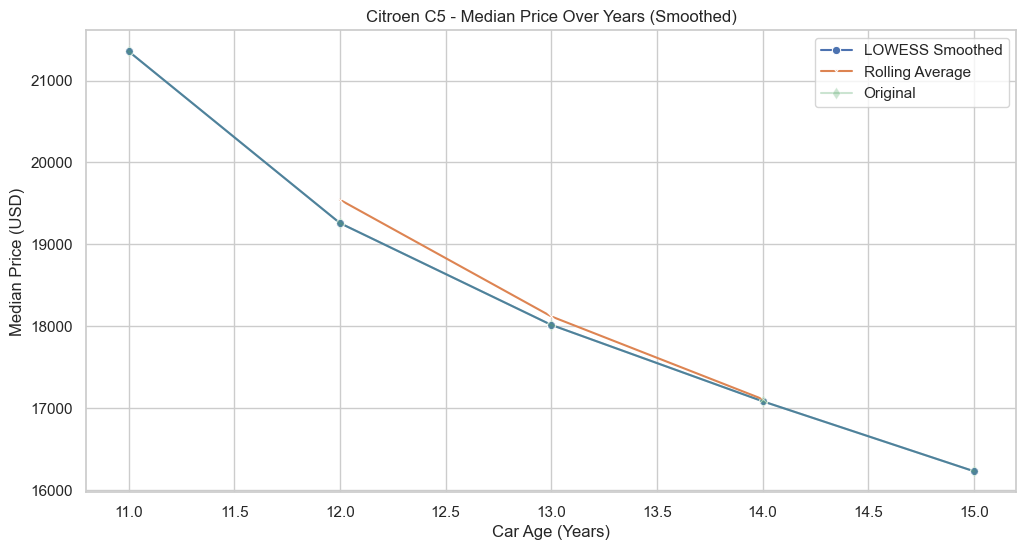

Citroen C5 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
2               11              NaN         12  21357.564461
3               12        -9.818182         36  19260.639950
4               13        -6.451613         53  18018.018018
5               14        -5.172414         25  17086.051569
6               15        -5.000000         18  16231.748990
Processing Volvo S60
Columns in median_prices for Volvo S60: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


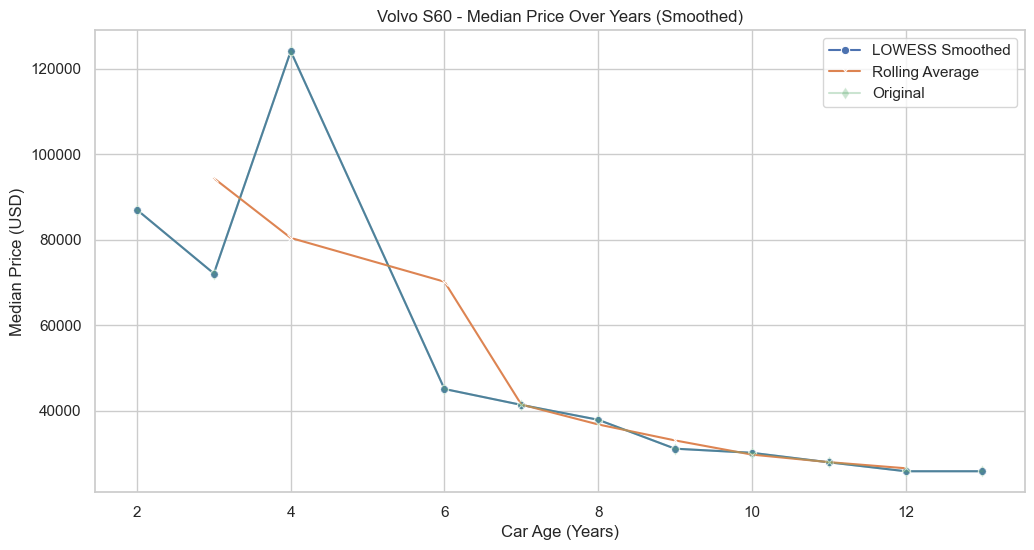

Volvo S60 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count      Price USD
1                 2              NaN          7   86980.428705
2                 3    -1.713990e+01          5   72072.072072
3                 4     7.219828e+01          7  124106.865486
5                 6    -6.370713e+01         21   45041.938490
6                 7    -8.269536e+00          5   41317.179248
7                 8    -8.421053e+00          9   37837.837838
8                 9    -1.789819e+01         27   31065.548307
9                10    -3.100000e+00         25   30102.516309
10               11    -7.383901e+00         14   27879.776328
11               12    -7.515739e+00         17   25784.405095
12               13    -1.110223e-14         20   25784.405095
Processing Toyota Yaris
Columns in median_prices for Toyota Yaris: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


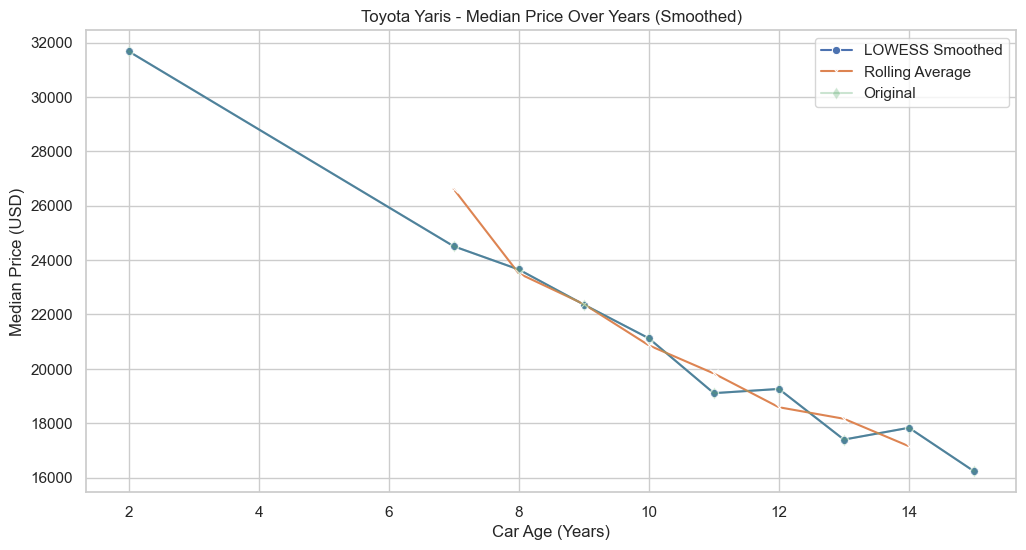

Toyota Yaris - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 2              NaN          6  31686.859273
6                 7       -22.647059          7  24510.717614
7                 8        -3.485425         12  23656.415036
8                 9        -5.449770          5  22367.194781
9                10        -5.555556          9  21124.572849
10               11        -9.558824         17  19105.312209
11               12         0.813008         12  19260.639950
12               13        -9.677419         15  17396.707052
13               14         2.500000          5  17831.624728
14               15        -8.972125          8  16231.748990
Processing Kia Ceed
Columns in median_prices for Kia Ceed: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


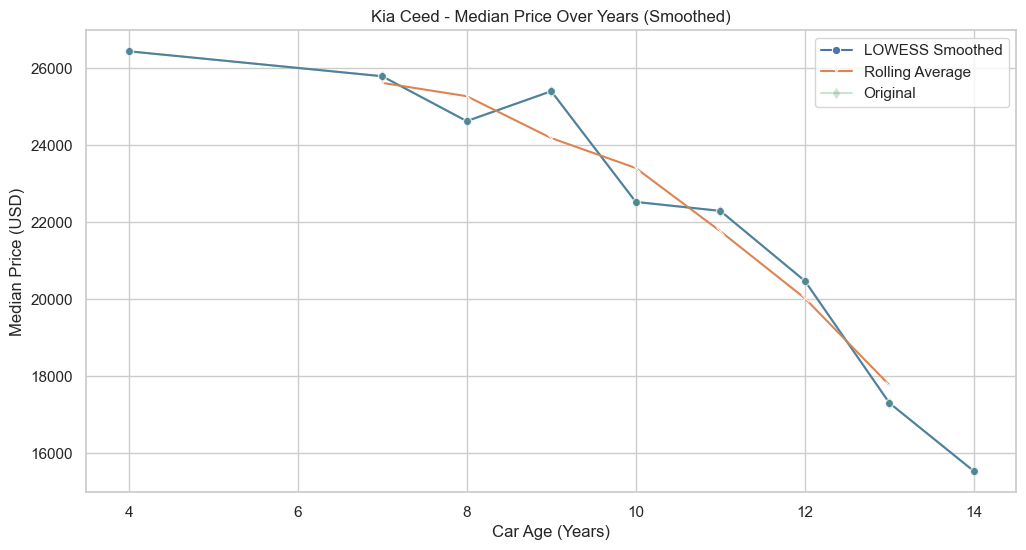

Kia Ceed - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
3                 4              NaN         16  26432.898416
6                 7        -2.453357          5  25784.405095
7                 8        -4.518072          8  24619.447033
8                 9         3.154574         14  25396.085741
9                10       -11.314985          6  22522.522523
10               11        -1.034483         32  22289.530910
11               12        -8.153310         36  20472.196334
12               13       -15.477997         26  17303.510407
13               14       -10.233393          9  15532.774153
Processing Seat Toledo
Columns in median_prices for Seat Toledo: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


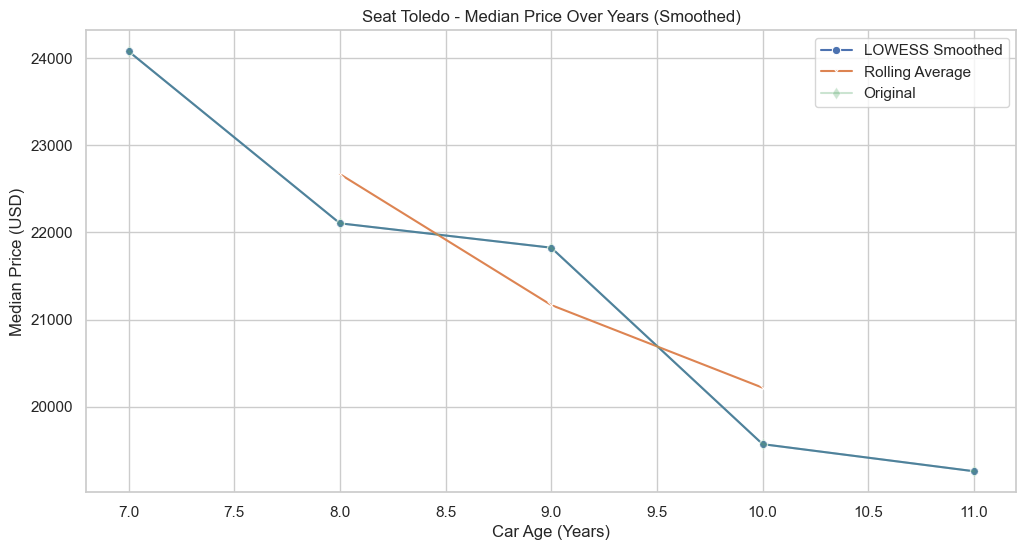

Seat Toledo - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                7              NaN         12  24075.799938
1                8        -8.193548         22  22103.137620
2                9        -1.264933         26  21823.547686
3               10       -10.320285         21  19571.295433
4               11        -1.587302         16  19260.639950
Processing Seat Cordoba
No data available for Seat Cordoba after filtering for car count.
Processing Peugeot 208
Columns in median_prices for Peugeot 208: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


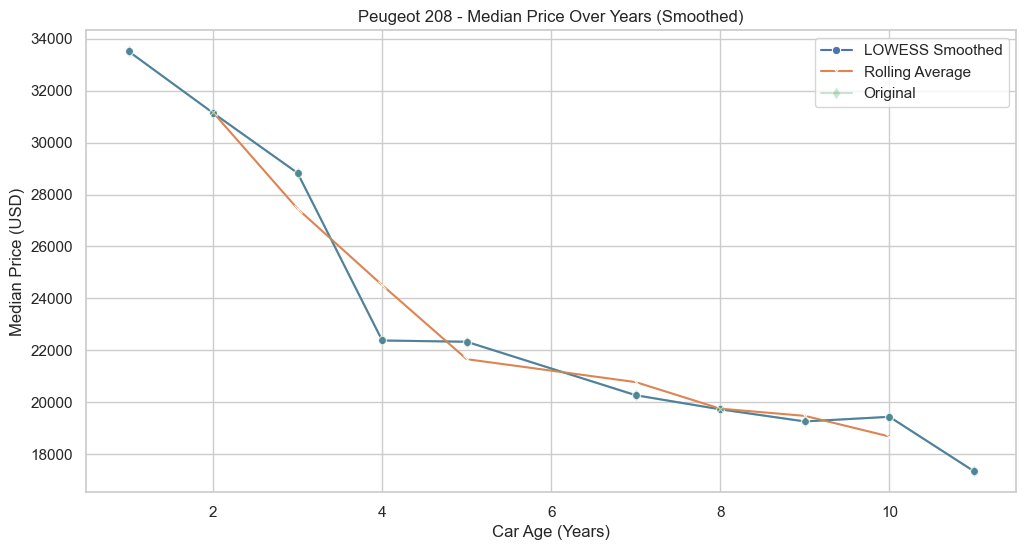

Peugeot 208 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         12  33519.726623
1                 2        -7.089898          8  31143.212178
2                 3        -7.431421         17  28828.828829
3                 4       -22.373384         10  22378.844362
4                 5        -0.218636          6  22329.916123
6                 7        -9.223706         12  20270.270270
7                 8        -2.681992          9  19726.623175
8                 9        -2.362205         17  19260.639950
9                10         0.927419         17  19439.266853
10               11       -10.787056         12  17342.342342
Processing Lada Samara
No data available for Lada Samara after applying filters.
Processing Mercedes A
Columns in median_prices for Mercedes A: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object'

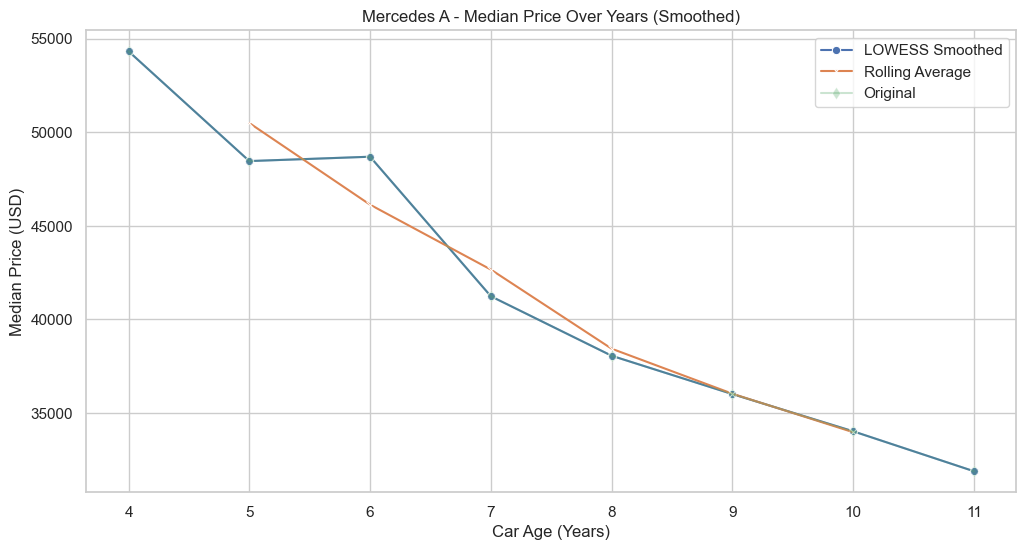

Mercedes A - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
3                 4              NaN         13  54333.643989
4                 5       -10.806175          5  48462.255359
5                 6         0.480769         12  48695.246971
6                 7       -15.318979         16  41235.632184
7                 8        -7.712591         16  38055.296676
8                 9        -5.387755          8  36004.970488
9                10        -5.522002         17  34016.775396
10               11        -6.278539         16  31881.018950
Processing Chevrolet Kalos
No data available for Chevrolet Kalos after applying filters.
Processing Mercedes CLA
Columns in median_prices for Mercedes CLA: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


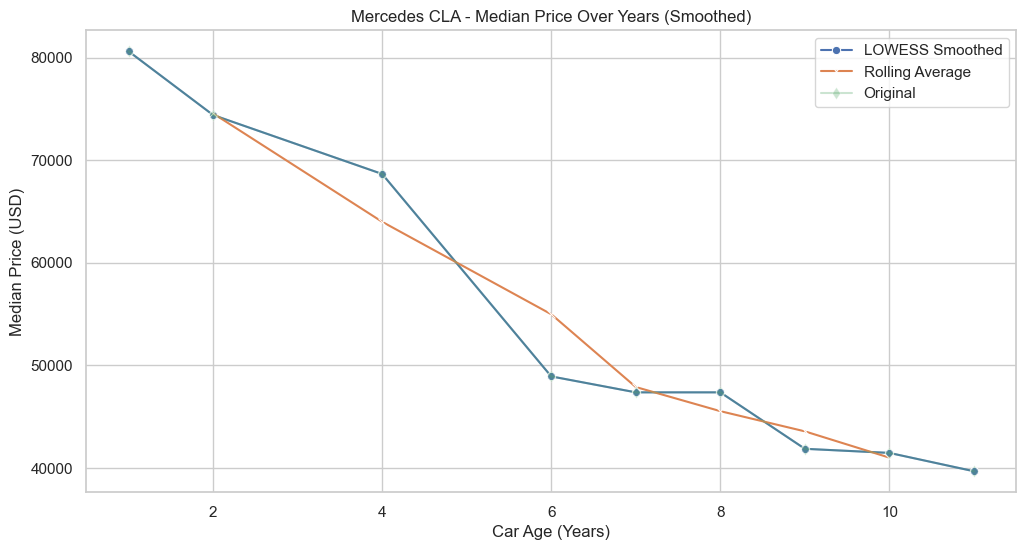

Mercedes CLA - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN          8  80615.097856
1                 2        -7.707129          6  74401.988195
3                 4        -7.724426          8  68654.861758
5                 6       -28.733032          5  48928.238583
6                 7        -3.174603         12  47374.961168
7                 8         0.000000         13  47374.961168
8                 9       -11.613115         25  41873.252563
9                10        -0.957044         23  41472.506990
10               11        -4.307116         16  39686.237962
Processing Lada Vega
No data available for Lada Vega after applying filters.
Processing Fiat Albea
Columns in median_prices for Fiat Albea: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


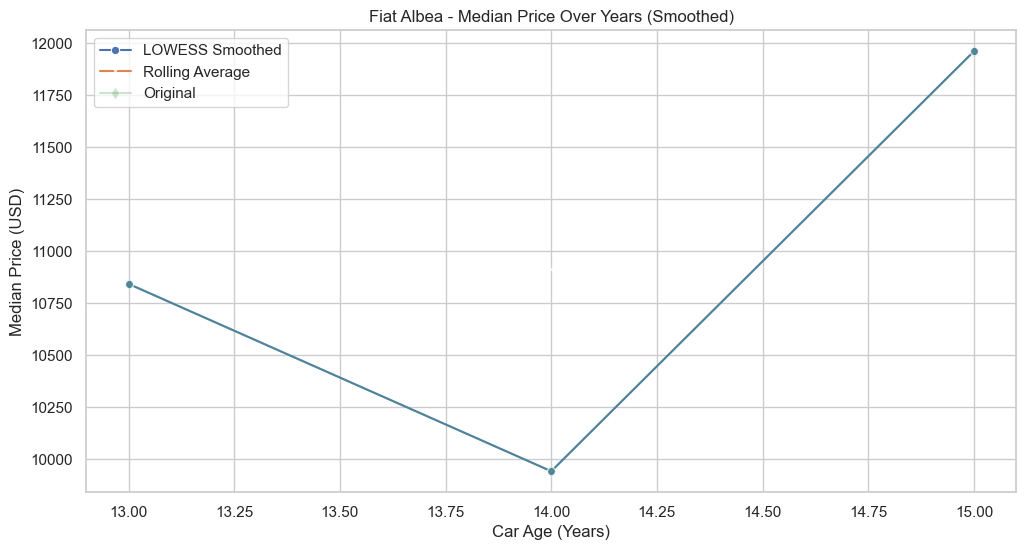

Fiat Albea - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
1               13              NaN         13  10841.876359
2               14        -8.309456         13   9940.975458
3               15        20.312500         12  11960.236098
Processing Mazda 3
Columns in median_prices for Mazda 3: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


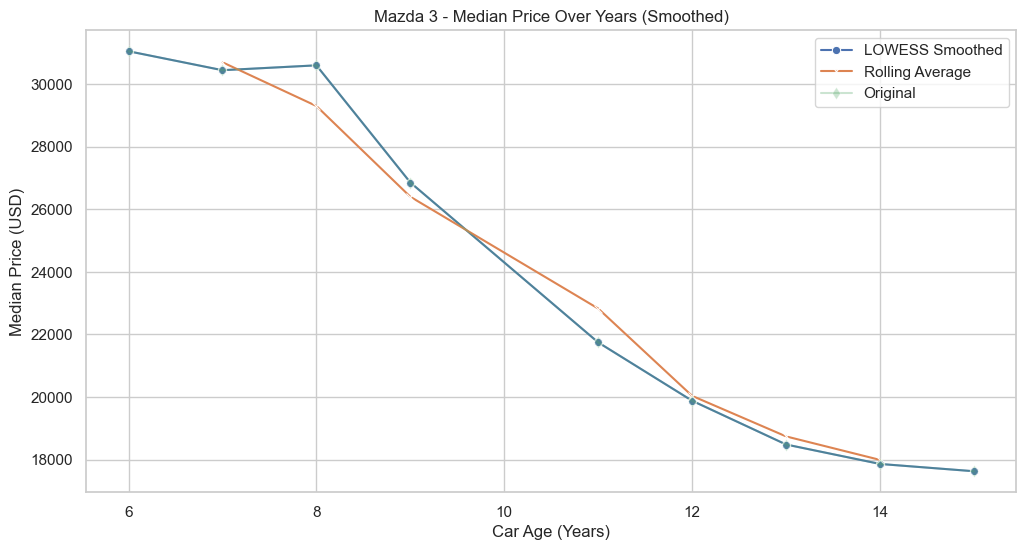

Mazda 3 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                6              NaN          5  31050.015533
1                7        -1.950975          7  30444.237341
2                8         0.510204          5  30599.565082
3                9       -12.233503         12  26856.166511
5               11       -19.028340          5  21745.883815
6               12        -8.571429         19  19881.950916
7               13        -7.031250         16  18484.001243
8               14        -3.361345         19  17862.690276
9               15        -1.304348          8  17629.698664
Processing Honda Jazz
Columns in median_prices for Honda Jazz: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


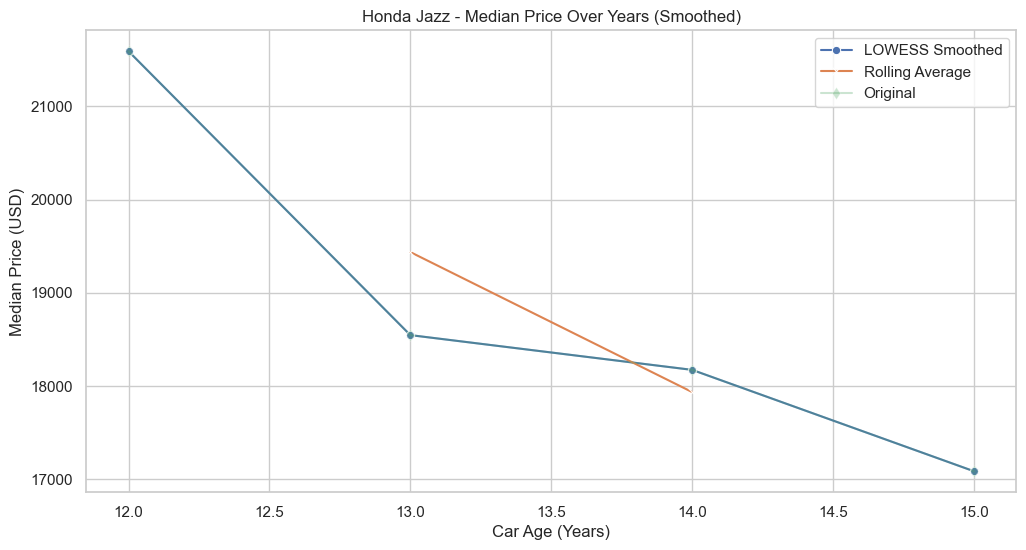

Honda Jazz - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
9                12              NaN          9  21590.556073
10               13       -14.100719         17  18546.132339
11               14        -2.010050          5  18173.345760
12               15        -5.982906         17  17086.051569
Processing Chevrolet Lacetti
Columns in median_prices for Chevrolet Lacetti: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


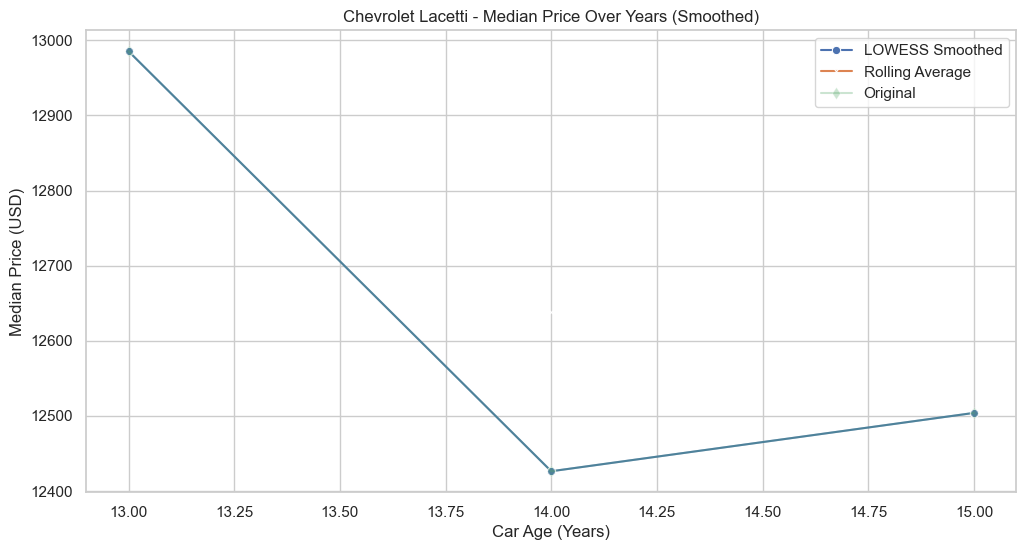

Chevrolet Lacetti - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0               13              NaN         25  12985.399192
1               14         -4.30622          6  12426.219323
2               15          0.62500         14  12503.883194
Processing Kia Cerato
Columns in median_prices for Kia Cerato: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


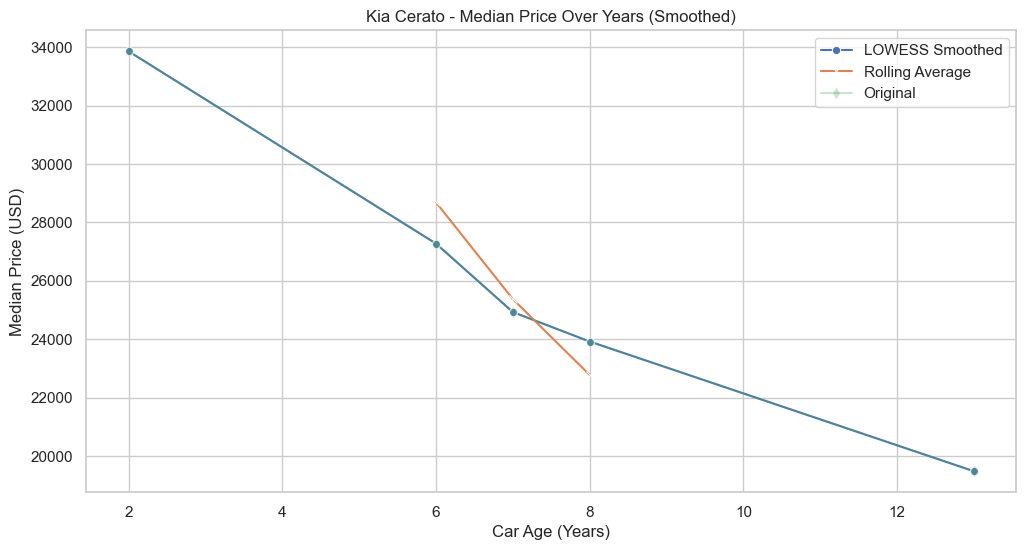

Kia Cerato - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 2              NaN          5  33861.447655
5                 6       -19.449541          7  27275.551413
6                 7        -8.599089         24  24930.102516
7                 8        -4.049844         25  23920.472196
12               13       -18.571429         12  19478.098788
Processing Honda City
Columns in median_prices for Honda City: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


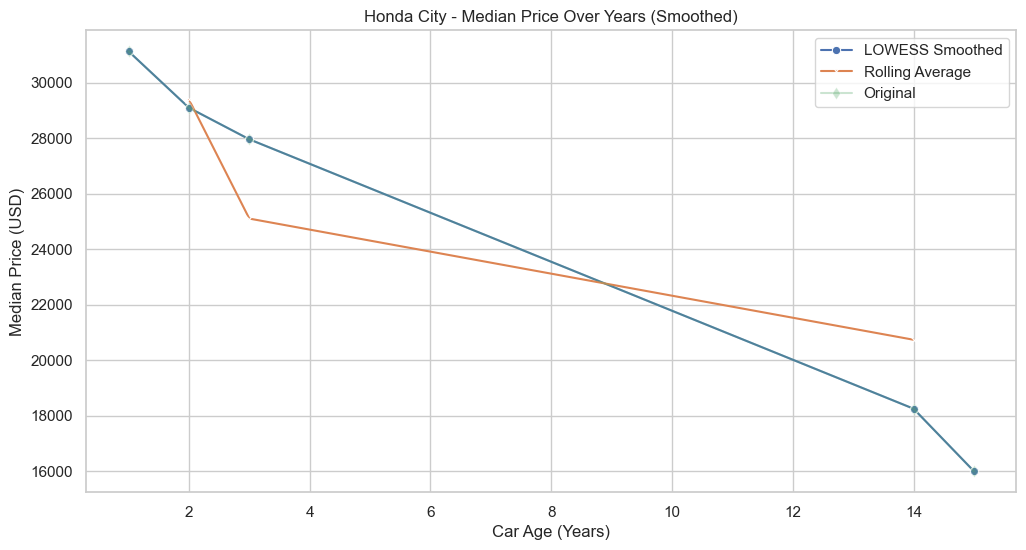

Honda City - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN          8  31127.679404
1                 2        -6.536926         24  29092.885989
2                 3        -3.908169         15  27955.886921
13               14       -34.714968          6  18251.009630
14               15       -12.340426          9  15998.757378
Processing Hyundai Elantra
Columns in median_prices for Hyundai Elantra: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


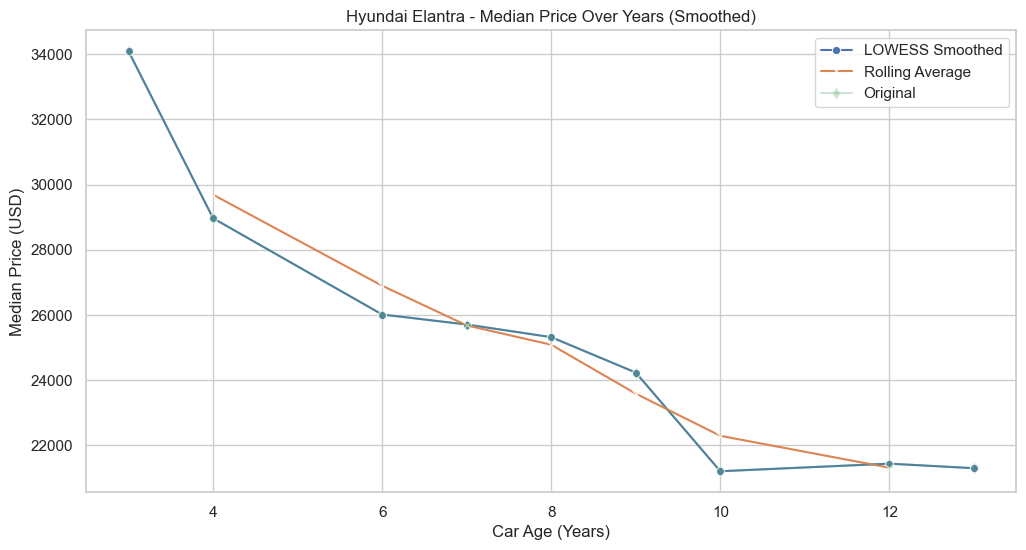

Hyundai Elantra - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
1                 3              NaN          8  34094.439267
2                 4       -15.034169          6  28968.623796
4                 6       -10.201072          8  26013.513514
5                 7        -1.179280         16  25706.741224
6                 8        -1.510574         12  25318.421870
7                 9        -4.294479          9  24231.127679
8                10       -12.500000          6  21202.236719
10               12         1.098901         10  21435.228332
11               13        -0.652174          8  21295.433364
Processing Nissan Primera
No data available for Nissan Primera after applying filters.
Processing Suzuki Swift
Columns in median_prices for Suzuki Swift: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


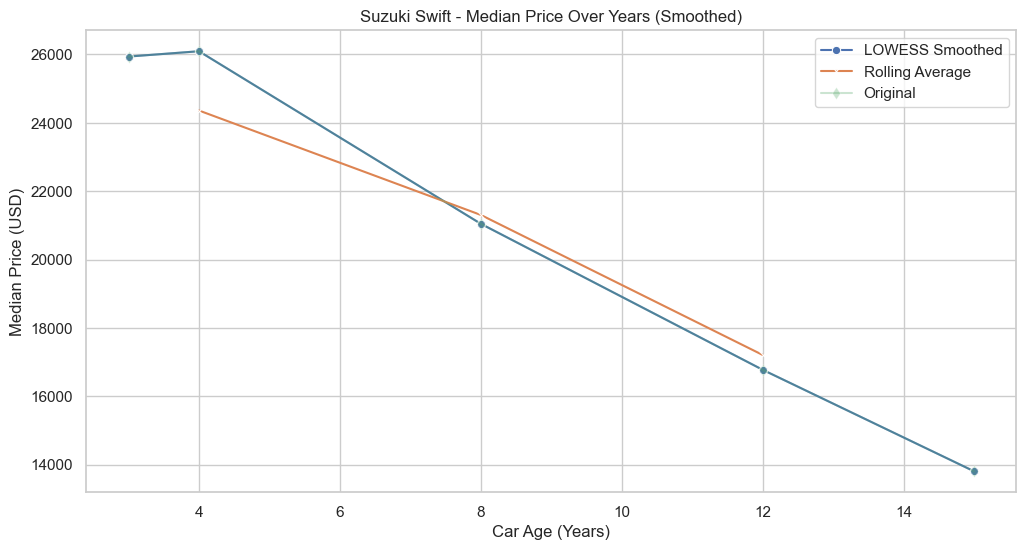

Suzuki Swift - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
2                 3              NaN          5  25939.732836
3                 4         0.598802          7  26095.060578
7                 8       -19.345238          8  21046.908978
11               12       -20.295203          7  16775.396086
14               15       -17.703704          9  13805.529668
Processing Skoda Felicia
No data available for Skoda Felicia after applying filters.
Processing Skoda Rapid
Columns in median_prices for Skoda Rapid: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


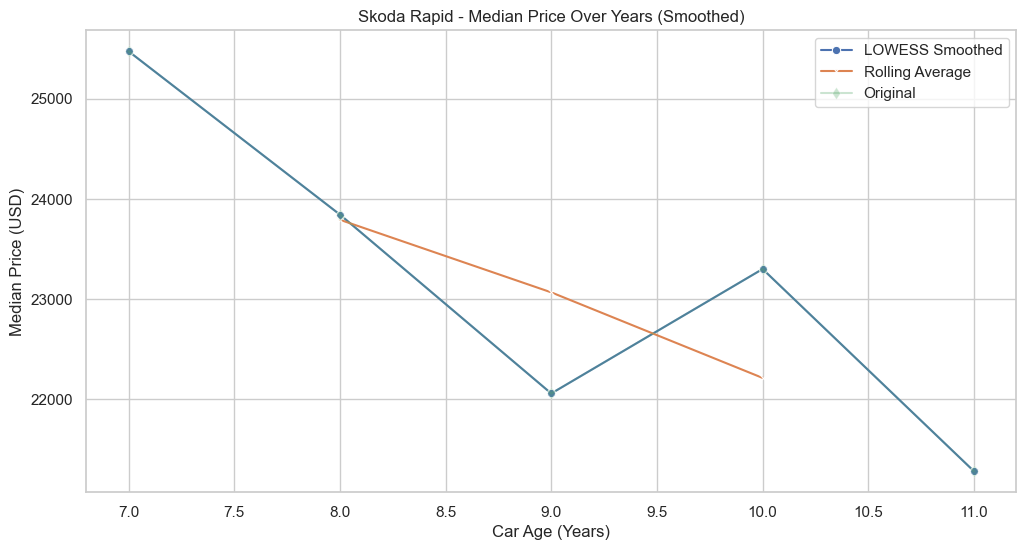

Skoda Rapid - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
1                7              NaN         12  25473.749612
2                8        -6.402439         29  23842.808326
3                9        -7.491857         25  22056.539298
4               10         5.633803         15  23299.161230
5               11        -8.666667          6  21279.900590
Processing Audi A5
Columns in median_prices for Audi A5: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


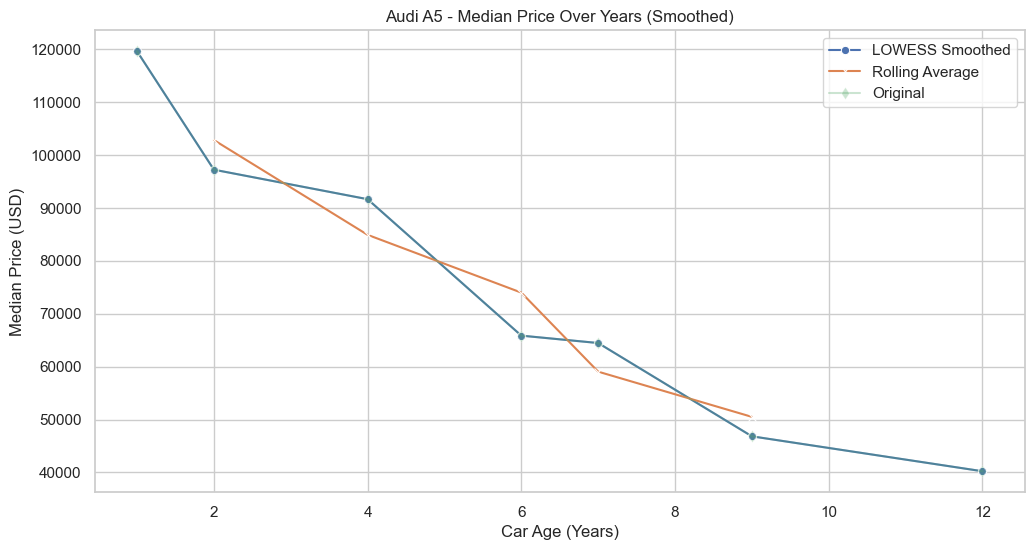

Audi A5 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count      Price USD
0                 1              NaN          8  119602.360982
1                 2       -18.714286          5   97219.633427
3                 4        -5.735741          5   91643.367505
5                 6       -28.135593          9   65858.962411
6                 7        -2.122642         24   64461.012737
8                 9       -27.349398         16   46831.314073
11               12       -14.096186          7   40229.885057
Processing Hyundai i30
Columns in median_prices for Hyundai i30: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


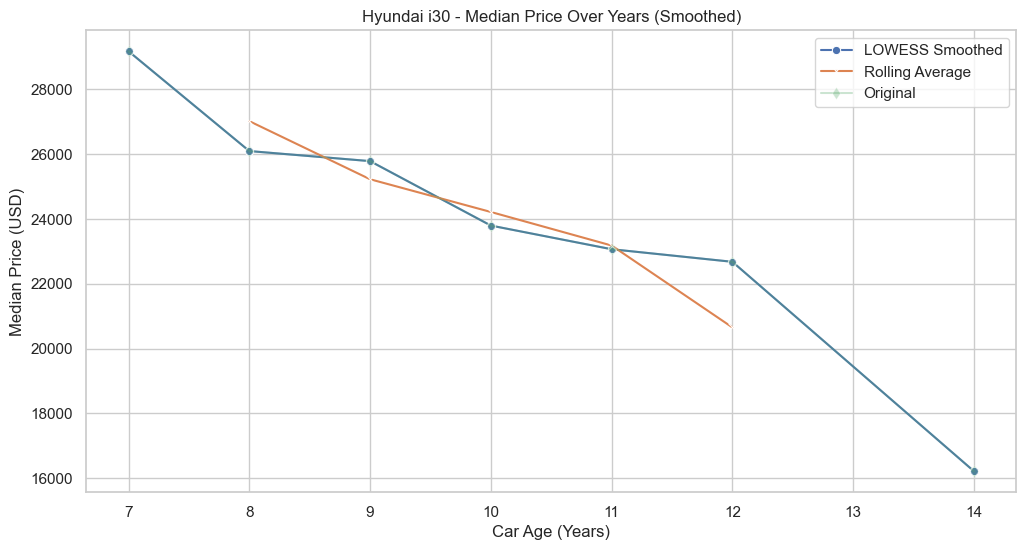

Hyundai i30 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                7              NaN          8  29174.433054
1                8       -10.555038          5  26095.060578
2                9        -1.190476         17  25784.405095
3               10        -7.710843         12  23796.210003
4               11        -3.067885         22  23066.169618
5               12        -1.683502         16  22677.850264
7               14       -28.493151          7  16216.216216
Processing Dacia Lodgy
Columns in median_prices for Dacia Lodgy: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


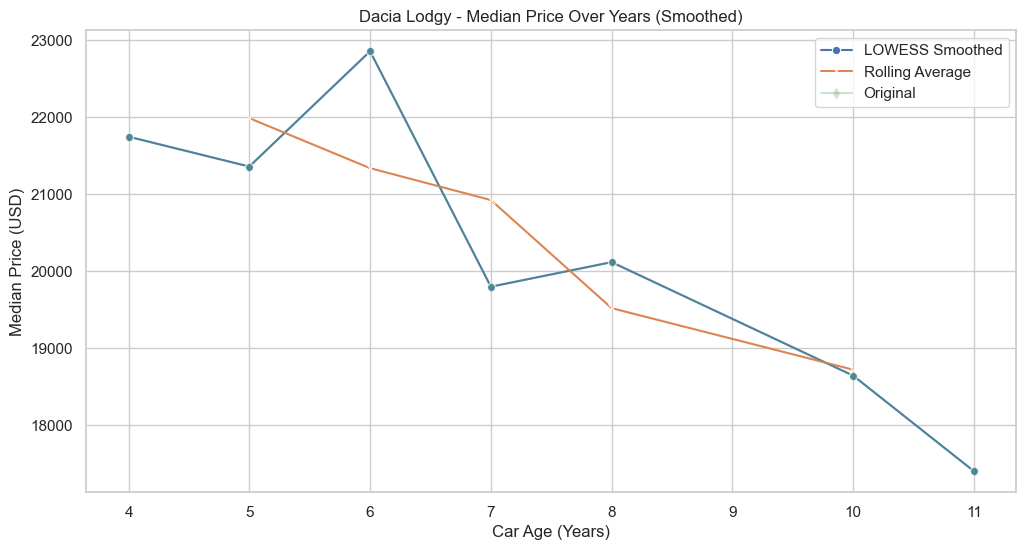

Dacia Lodgy - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
2                4              NaN         10  21745.883815
3                5        -1.785714          8  21357.564461
4                6         7.018182          7  22856.477167
5                7       -13.391098         20  19795.744020
6                8         1.612460         12  20114.942529
8               10        -7.335907         11  18639.328984
9               11        -6.666667         14  17396.707052
Processing Mazda 323
No data available for Mazda 323 after applying filters.
Processing Peugeot 508
Columns in median_prices for Peugeot 508: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


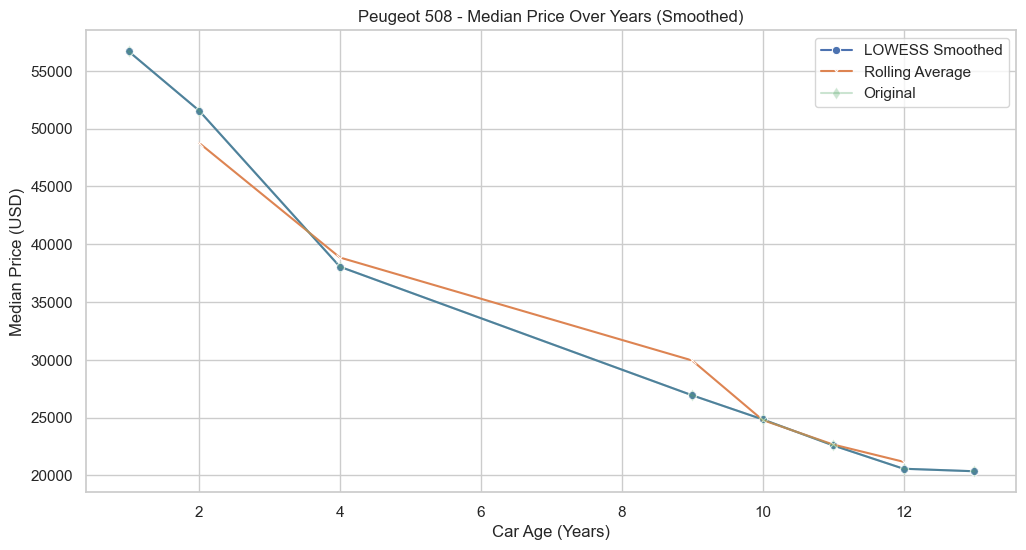

Peugeot 508 - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN          5  56694.625660
1                 2        -9.041096          5  51568.810189
3                 4       -26.204819         14  38055.296676
8                 9       -29.224490          8  26933.830382
9                10        -7.727797          6  24852.438646
10               11        -9.062563          6  22600.170861
11               12        -8.934645         18  20580.925753
12               13        -1.056604         10  20363.466915
Processing Skoda Favorit
No data available for Skoda Favorit after applying filters.
Processing Mitsubishi Lancer
Columns in median_prices for Mitsubishi Lancer: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


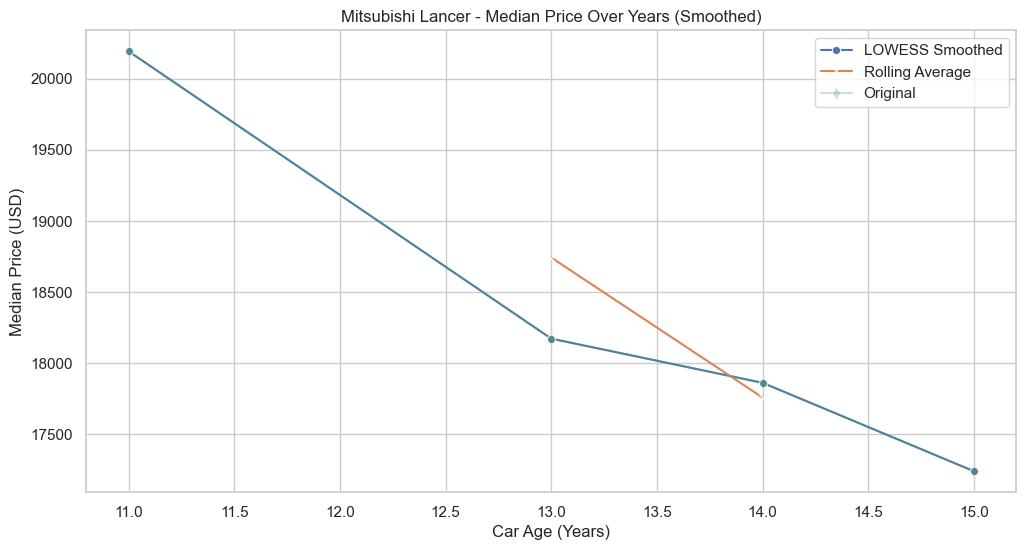

Mitsubishi Lancer - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
2               11              NaN          5  20192.606400
4               13       -10.000000         18  18173.345760
5               14        -1.709402         13  17862.690276
6               15        -3.478261         12  17241.379310
Processing Renault R 9
No data available for Renault R 9 after applying filters.
Processing MINI Cooper
Columns in median_prices for MINI Cooper: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


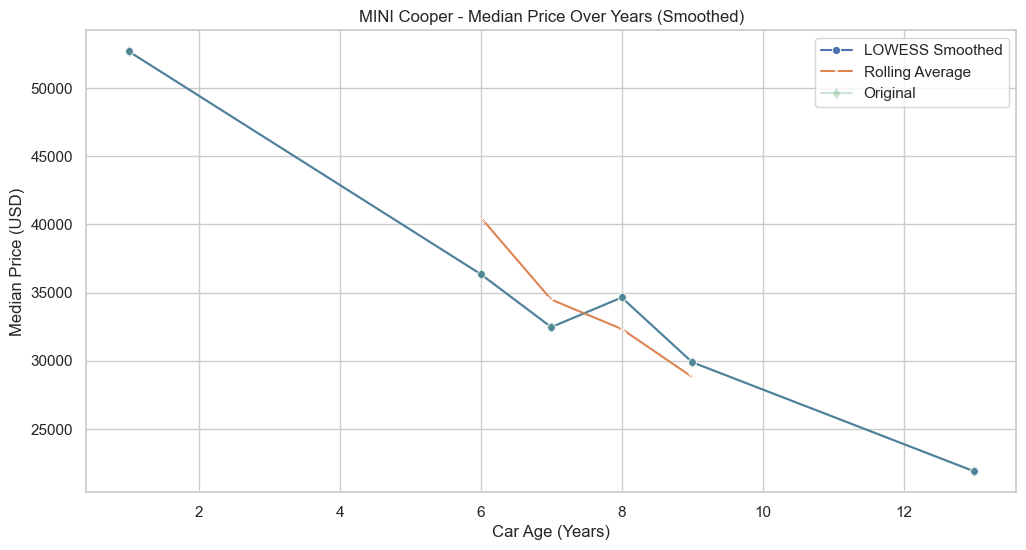

MINI Cooper - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN          6  52687.169929
5                 6       -31.014151          6  36346.691519
6                 7       -10.683761         11  32463.497981
7                 8         6.698565          9  34638.086362
8                 9       -13.699552          6  29892.823858
12               13       -26.734217          5  21901.211556
Processing Ford Escort
No data available for Ford Escort after applying filters.
Processing Kia Picanto
Columns in median_prices for Kia Picanto: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


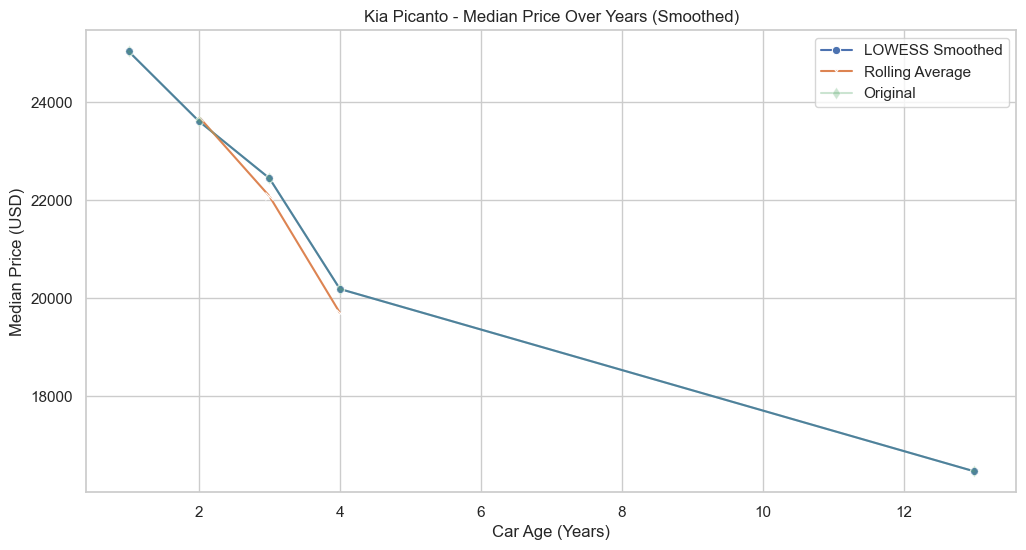

Kia Picanto - Percentage Loss Over Years
    Car Age (Years)  Percentage Loss  Car Count     Price USD
0                 1              NaN         13  25038.831935
1                 2        -5.707196         12  23609.816713
2                 3        -4.934211          8  22444.858652
3                 4       -10.069204         16  20184.840012
12               13       -18.437861          6  16463.187325
Processing Peugeot 407
No data available for Peugeot 407 after filtering for car count.
Processing Fiat Uno
No data available for Fiat Uno after applying filters.
Processing Nissan Almera
No data available for Nissan Almera after applying filters.
Processing Toyota Avensis
Columns in median_prices for Toyota Avensis: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


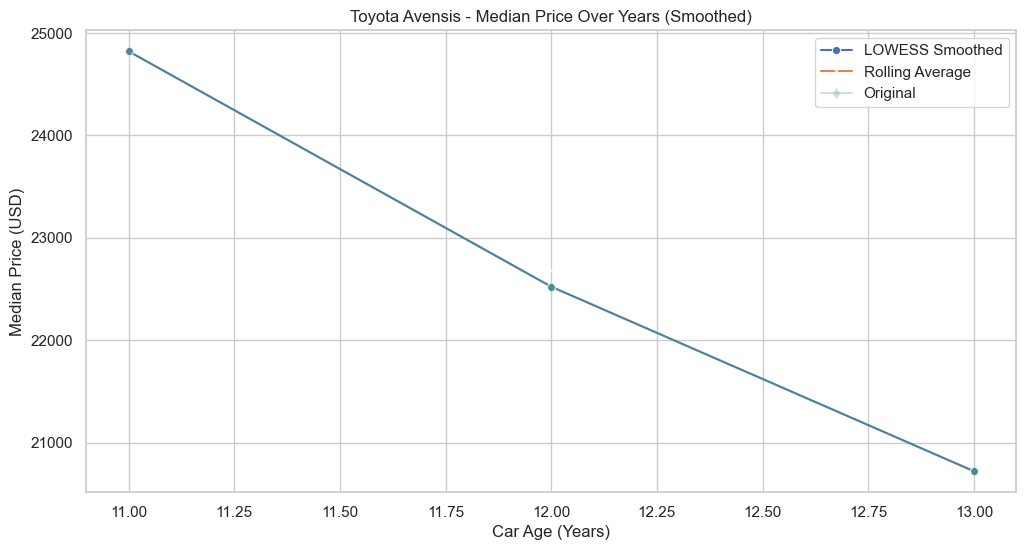

Toyota Avensis - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
4               11              NaN          9  24821.373097
5               12        -9.261577          9  22522.522523
6               13        -8.000000          8  20720.720721
Processing Citroen Xsara
No data available for Citroen Xsara after applying filters.
Processing Mercedes S
Columns in median_prices for Mercedes S: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


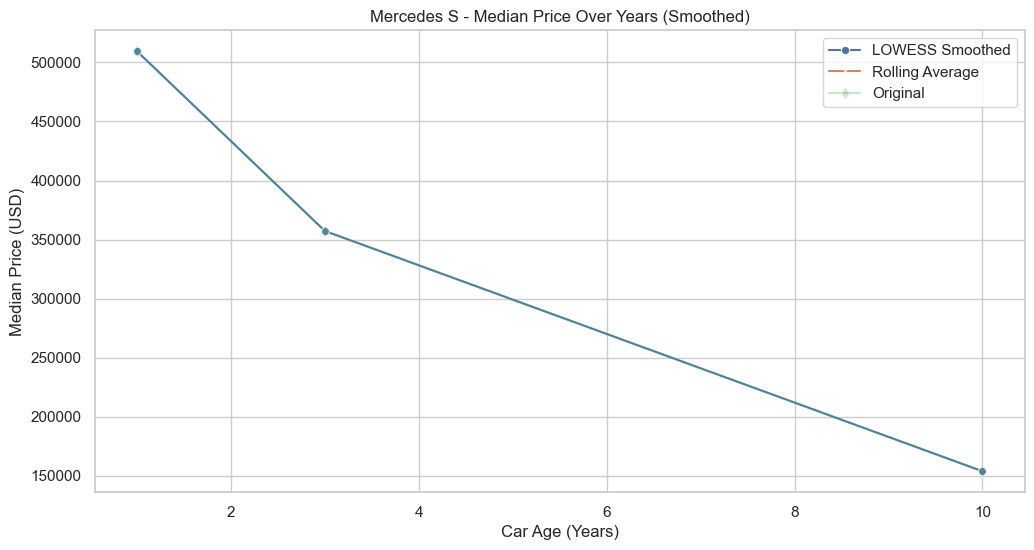

Mercedes S - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count      Price USD
0                1              NaN          8  509474.992234
2                3       -29.878049         11  357253.805530
9               10       -56.956522          5  153774.464119
Processing Volkswagen Bora
No data available for Volkswagen Bora after applying filters.
Processing Alfa Romeo Giulietta
Columns in median_prices for Alfa Romeo Giulietta: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


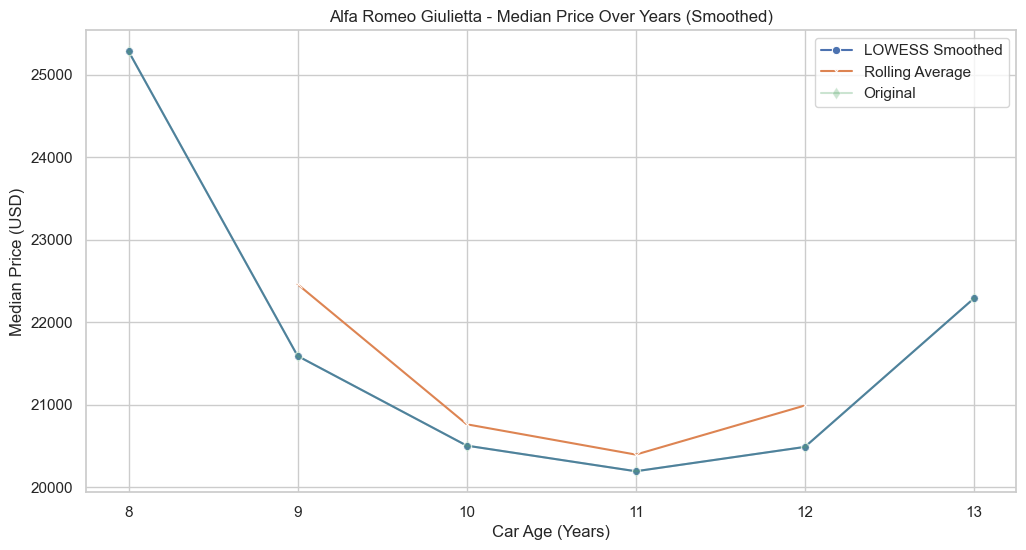

Alfa Romeo Giulietta - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
4                8              NaN          6  25285.803044
5                9       -14.613920          7  21590.556073
6               10        -5.035971         15  20503.261883
7               11        -1.515152          7  20192.606400
8               12         1.461538         14  20487.729108
9               13         8.794541         10  22289.530910
Processing Mercedes B
Columns in median_prices for Mercedes B: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


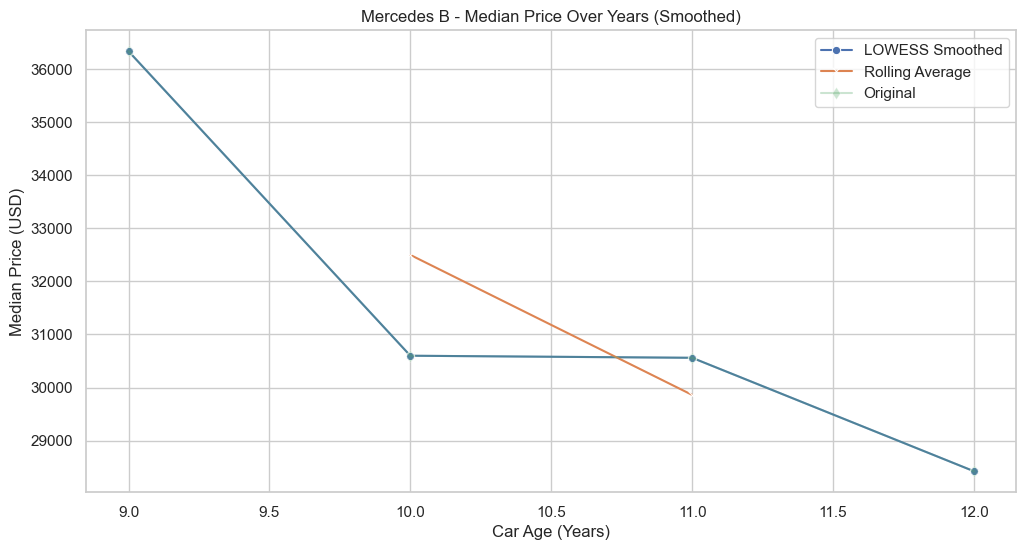

Mercedes B - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
5                9              NaN          7  36331.158745
6               10       -15.775973          8  30599.565082
7               11        -0.126904         10  30560.733147
8               12        -6.988564          7  28424.976701
Processing Peugeot 206+
Columns in median_prices for Peugeot 206+: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


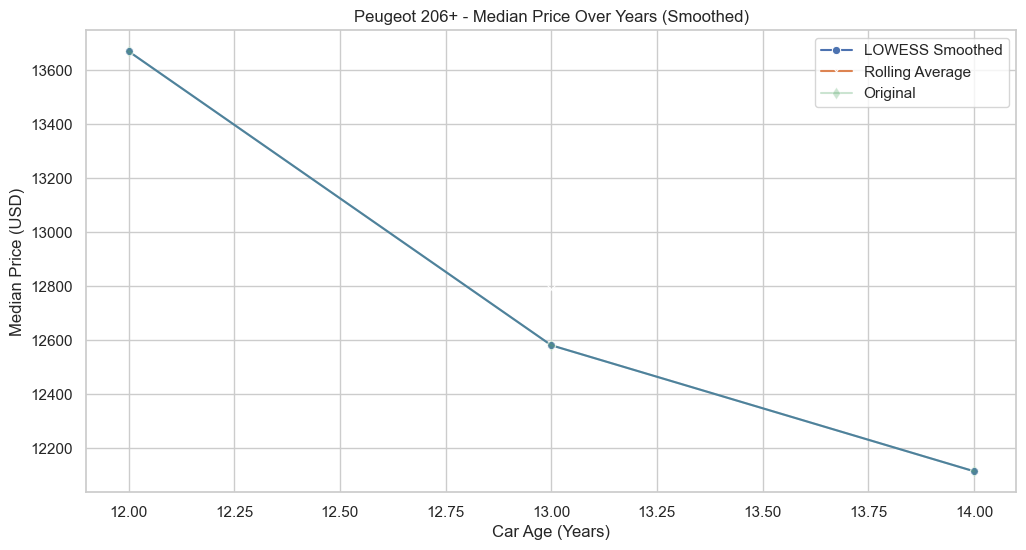

Peugeot 206+ - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0               12              NaN         13  13668.841255
1               13        -7.954545         33  12581.547064
2               14        -3.703704         15  12115.563840
Processing Honda Accord
Columns in median_prices for Honda Accord: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Honda Accord: 'y'
Processing Nissan Note
Columns in median_prices for Nissan Note: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


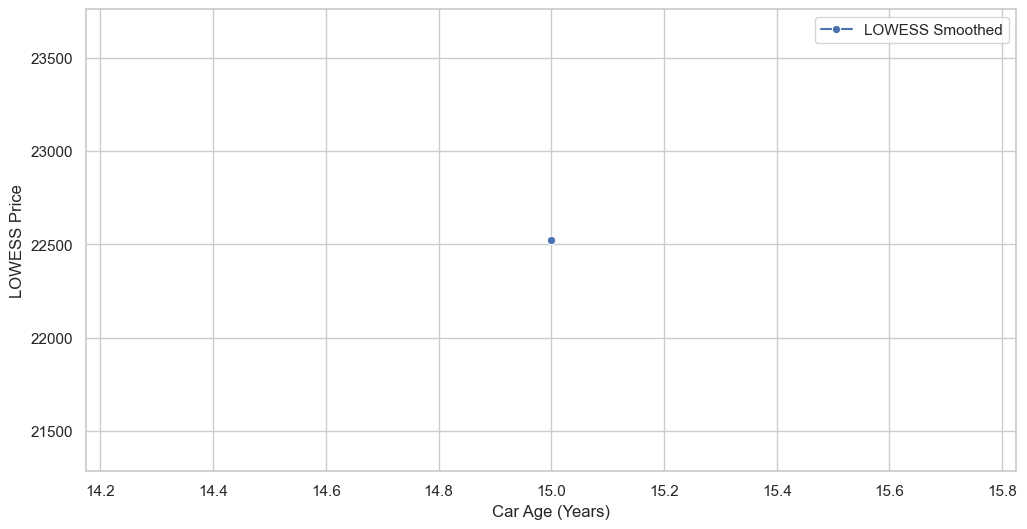

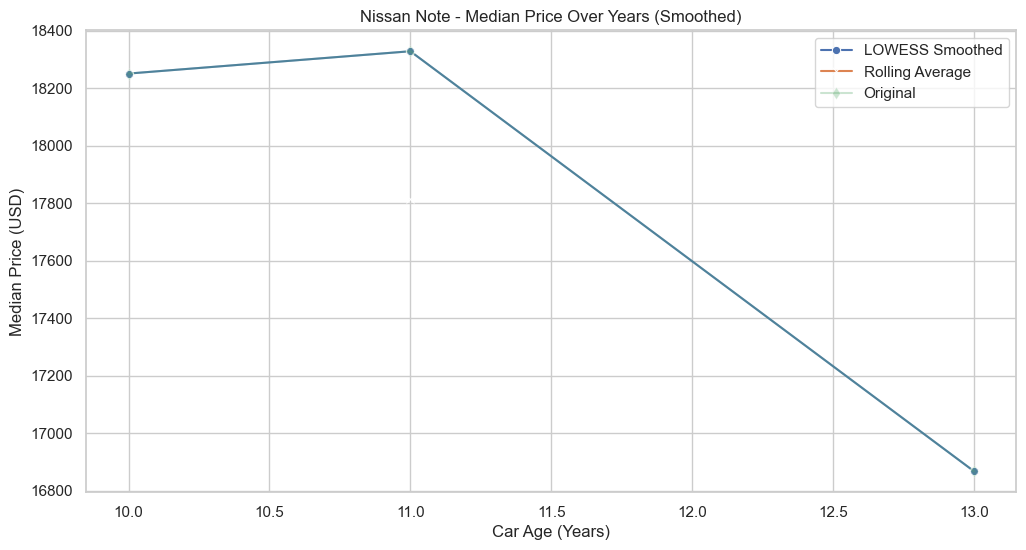

Nissan Note - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0               10              NaN         10  18251.009630
1               11         0.425532          8  18328.673501
3               13        -7.974576          8  16867.039453
Processing Mazda 626
No data available for Mazda 626 after applying filters.
Processing Fiat Tipo
No data available for Fiat Tipo after applying filters.
Processing Peugeot 306
No data available for Peugeot 306 after applying filters.
Processing Skoda Scala
Columns in median_prices for Skoda Scala: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


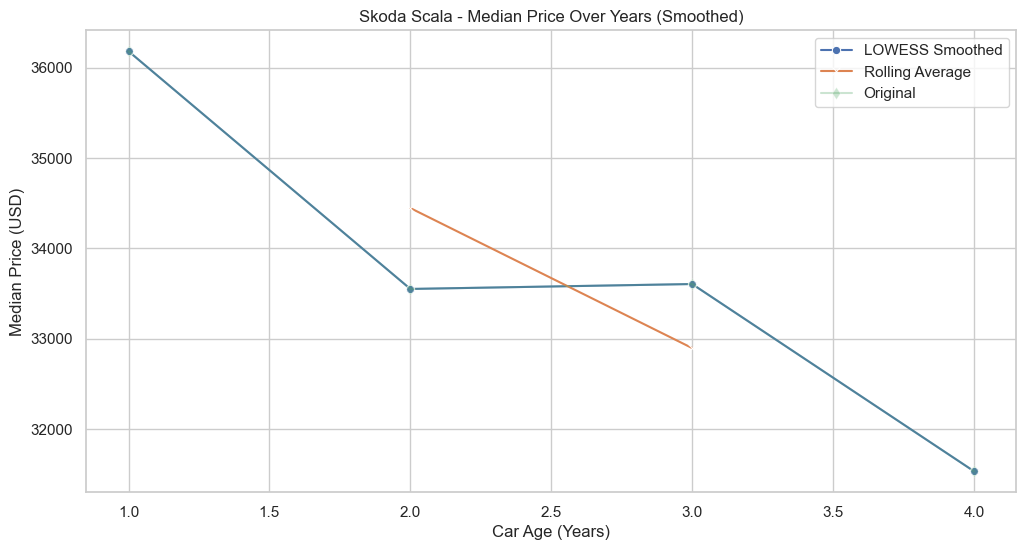

Skoda Scala - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                1              NaN          8  36183.597390
1                2        -7.276240          9  33550.792171
2                3         0.162037          8  33605.156881
3                4        -6.170557         20  31531.531532
Processing Mercedes 200
No data available for Mercedes 200 after filtering for car count.
Processing Mitsubishi Carisma
No data available for Mitsubishi Carisma after applying filters.
Processing Citroen Saxo
No data available for Citroen Saxo after applying filters.
Processing Mitsubishi Colt
Columns in median_prices for Mitsubishi Colt: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Mitsubishi Colt: 'y'
Processing Ford C-Max
Columns in median_prices for Ford C-Max: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       

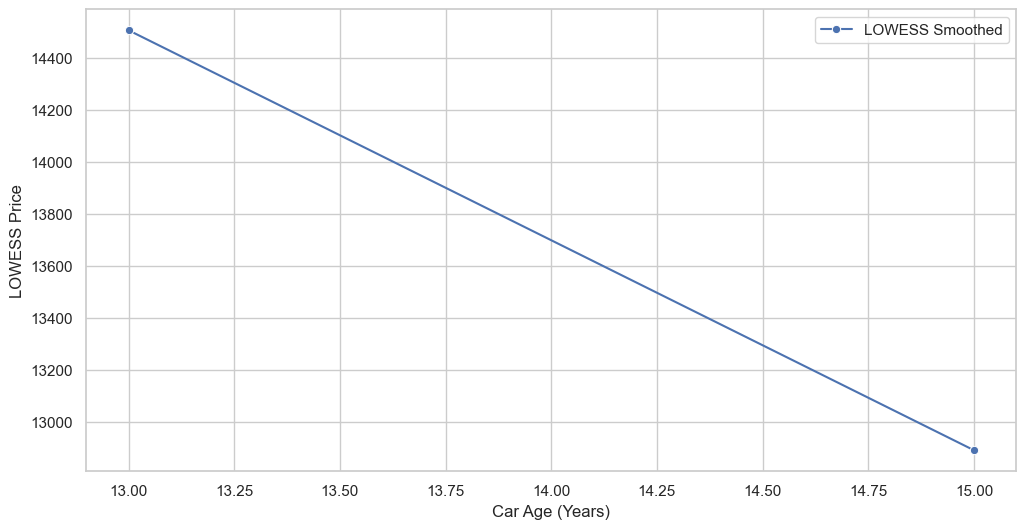

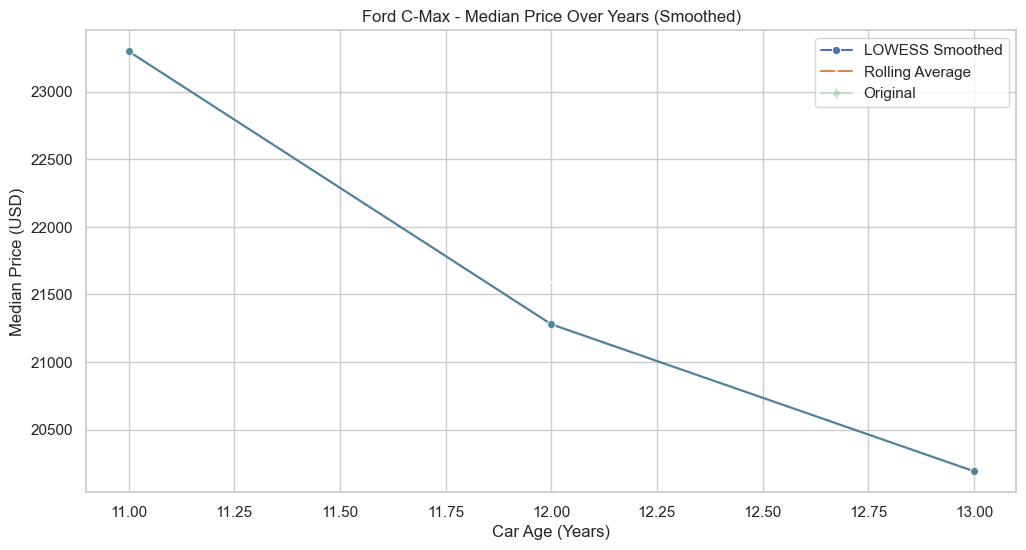

Ford C-Max - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count    Price USD
4               11              NaN          6  23299.16123
5               12        -8.666667         12  21279.90059
6               13        -5.109489          5  20192.60640
Processing Tofaş Murat
No data available for Tofaş Murat after applying filters.
Processing Renault R 12
No data available for Renault R 12 after applying filters.
Processing Fiat Tempra
No data available for Fiat Tempra after applying filters.
Processing Renault R 19
No data available for Renault R 19 after applying filters.
Processing Volvo S80
Columns in median_prices for Volvo S80: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


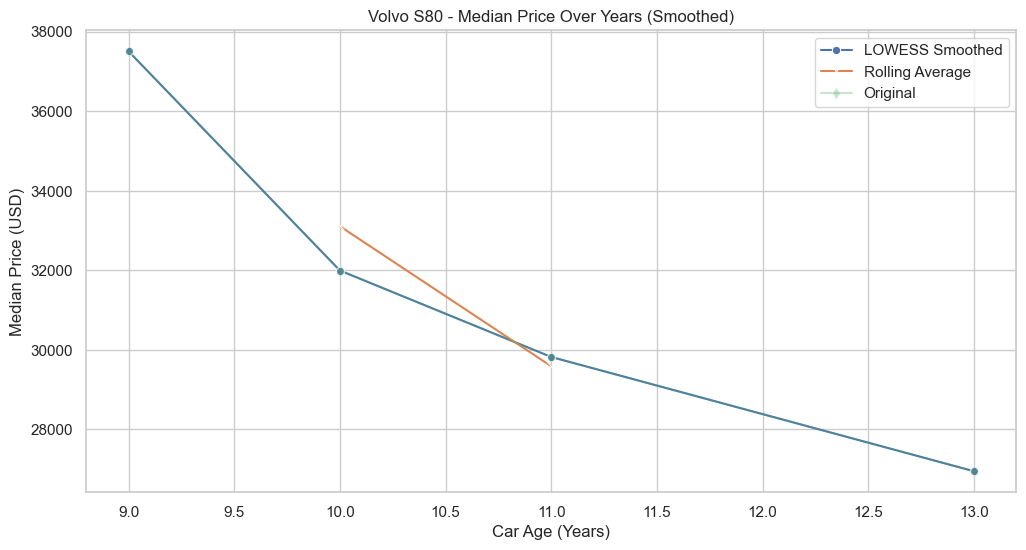

Volvo S80 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
1                9              NaN          6  37511.649581
2               10       -14.699793          6  31997.514756
3               11        -6.796117          5  29822.926375
5               13        -9.635469          6  26949.347623
Processing Volvo V40
Columns in median_prices for Volvo V40: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


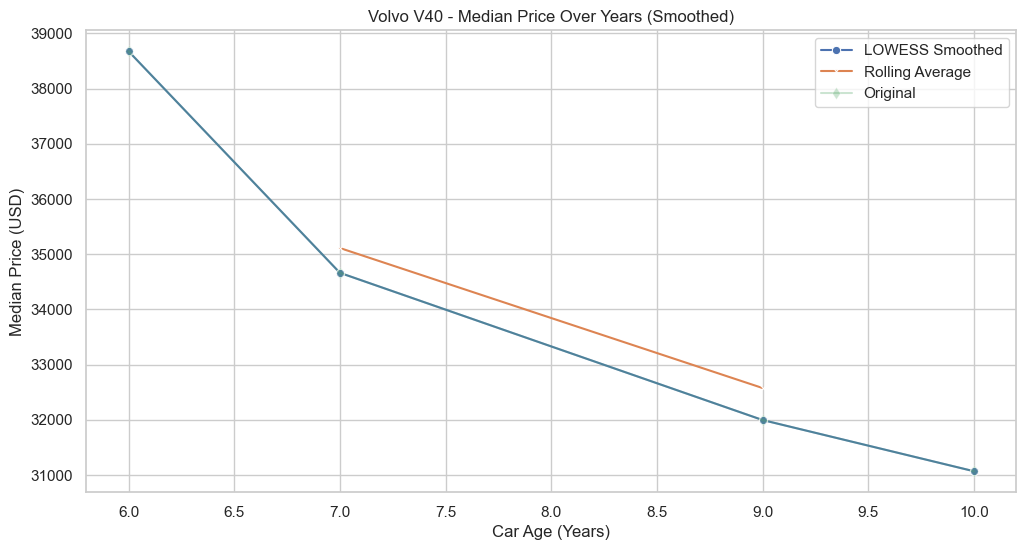

Volvo V40 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
1                6              NaN          7  38676.607642
2                7       -10.381526          7  34661.385523
4                9        -7.696617          6  31993.631563
5               10        -2.900837          5  31065.548307
Processing Opel Insignia
Columns in median_prices for Opel Insignia: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


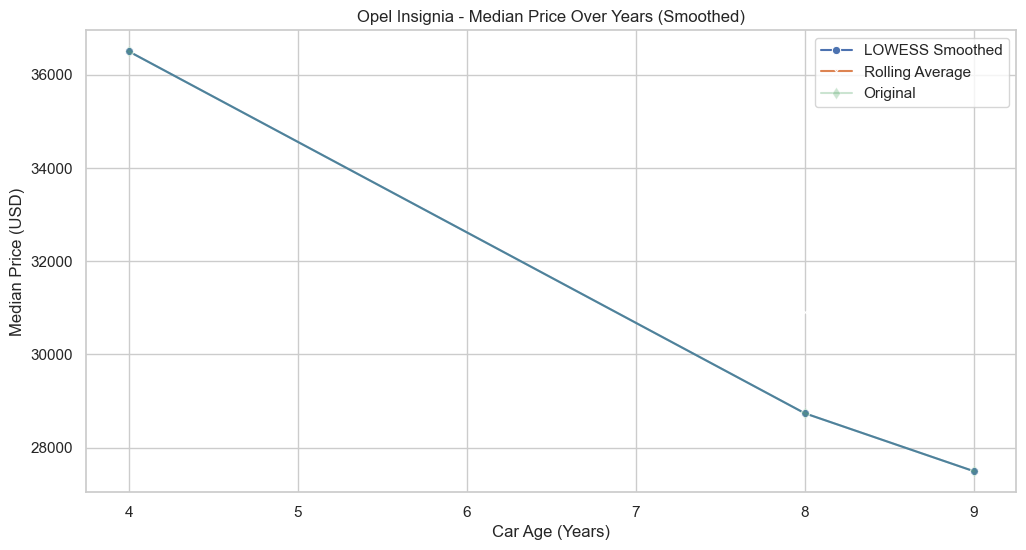

Opel Insignia - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                4              NaN          7  36502.019261
4                8       -21.276596          9  28735.632184
5                9        -4.324324          9  27493.010252
Processing Volkswagen VW CC
Columns in median_prices for Volkswagen VW CC: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


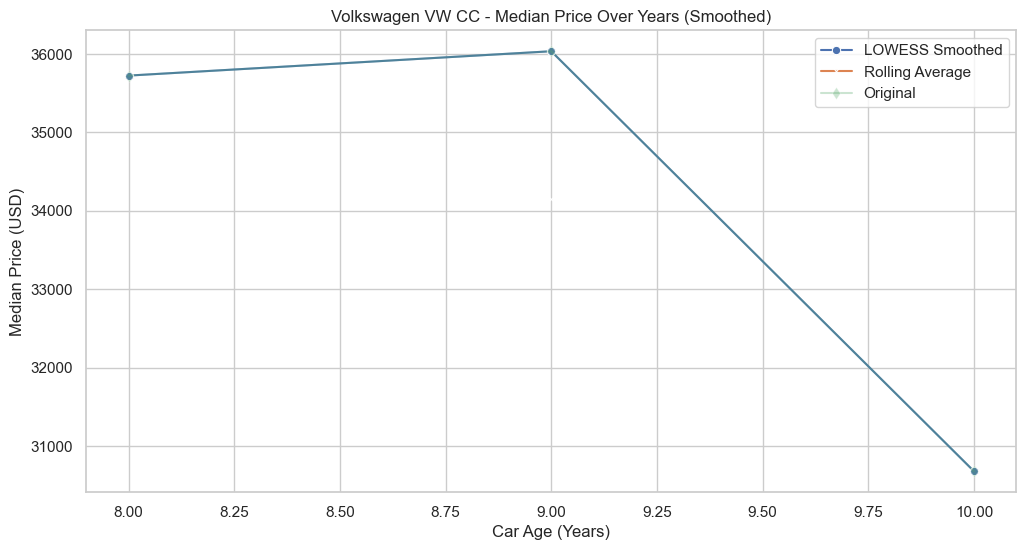

Volkswagen VW CC - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
0                8              NaN          9  35725.380553
1                9         0.869565         13  36036.036036
2               10       -14.870690         10  30677.228953
Processing Ford Fusion
No data available for Ford Fusion after filtering for car count.
Processing Citroen C4 Grand Picasso
Columns in median_prices for Citroen C4 Grand Picasso: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Citroen C4 Grand Picasso: 'y'
Processing Skoda Forman
No data available for Skoda Forman after filtering for car count.
Processing Peugeot 106
No data available for Peugeot 106 after applying filters.
Processing Alfa Romeo 156
No data available for Alfa Romeo 156 after applying filters.
Processing Hyundai i10
Columns in median_prices for Hyundai i10: Index(['Car Age (Years)', 

/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


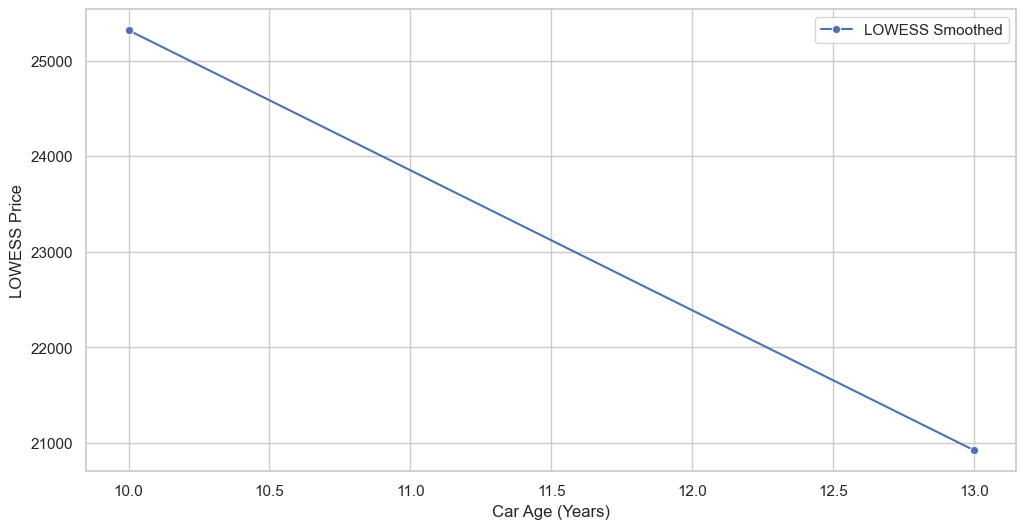

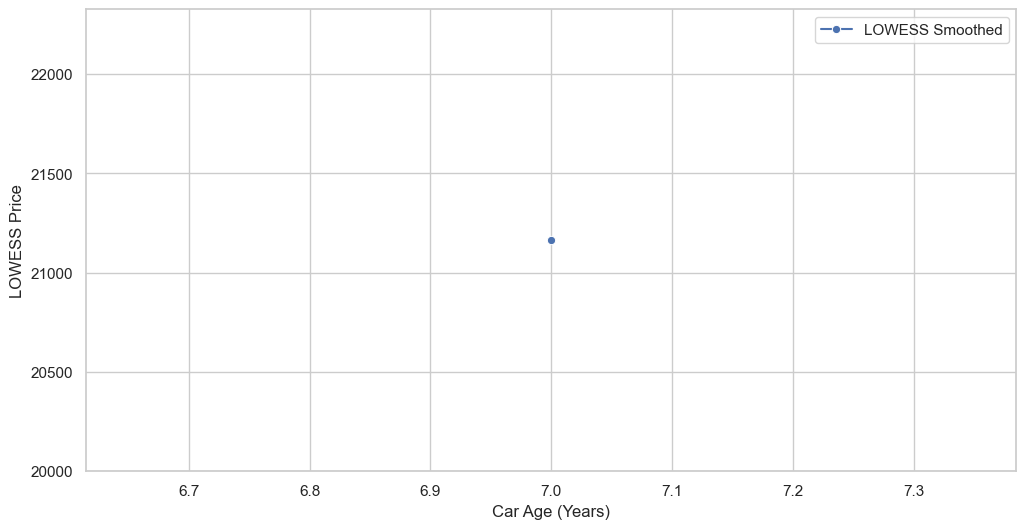

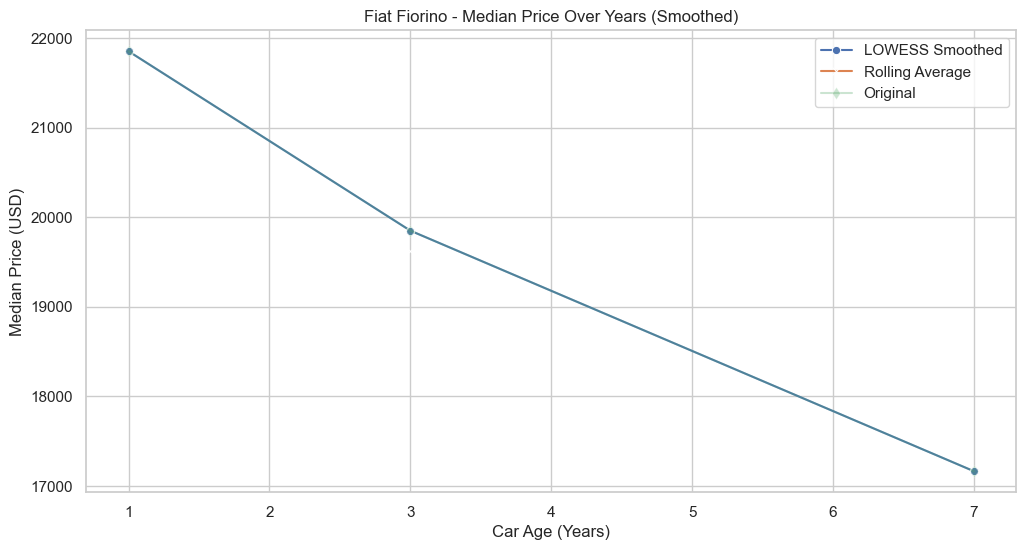

Fiat Fiorino - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
1                1              NaN          6  21854.613234
3                3        -9.168443          5  19850.885368
7                7       -13.536776          5  17163.715440
Processing Kia Sephia
No data available for Kia Sephia after applying filters.
Processing Mercedes 190
No data available for Mercedes 190 after applying filters.
Processing Dacia Solenza
No data available for Dacia Solenza after applying filters.
Processing Alfa Romeo 147
No data available for Alfa Romeo 147 after filtering for car count.
Processing Fiat Siena
No data available for Fiat Siena after applying filters.
Processing Seat Altea
Columns in median_prices for Seat Altea: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


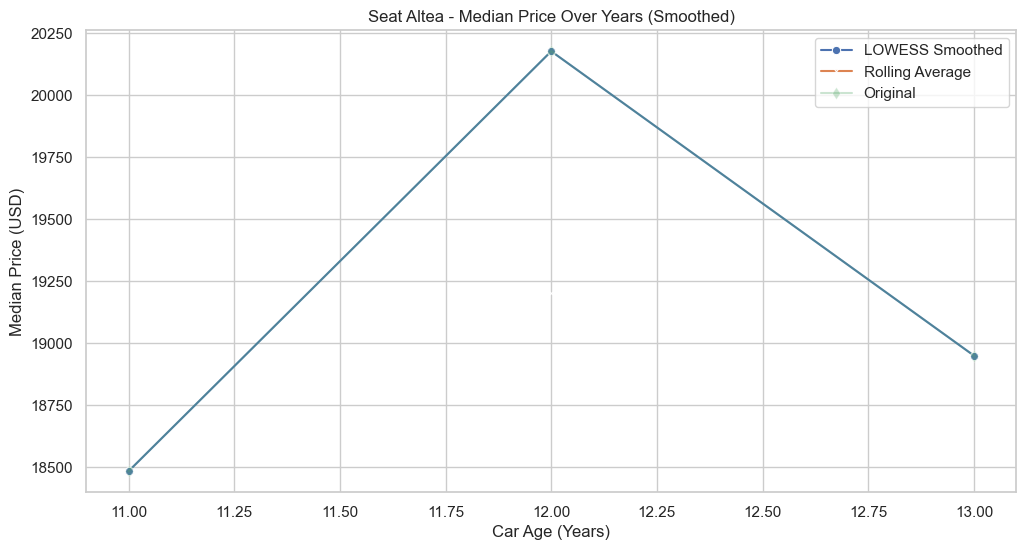

Seat Altea - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
2               11              NaN          5  18484.001243
3               12         9.159664          8  20177.073625
4               13        -6.081601          5  18949.984467
Processing Fiat 500
Columns in median_prices for Fiat 500: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Fiat 500: 'y'
Processing Citroen C4 X
Columns in median_prices for Citroen C4 X: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Citroen C4 X: 'y'
Processing Citroen C4 Picasso
Columns in median_prices for Citroen C4 Picasso: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Citroen C4 Picasso: 'y'

/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


Columns in median_prices for Volvo S90: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


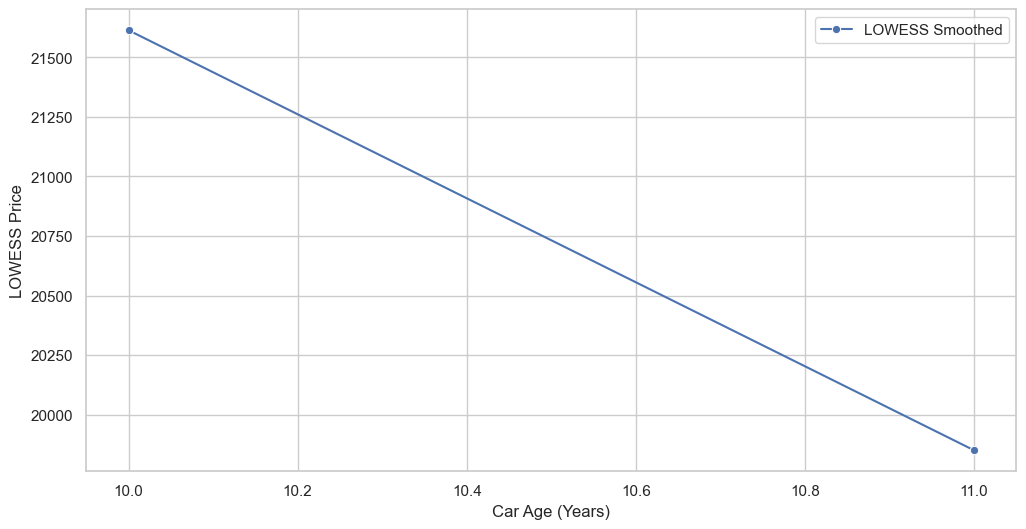

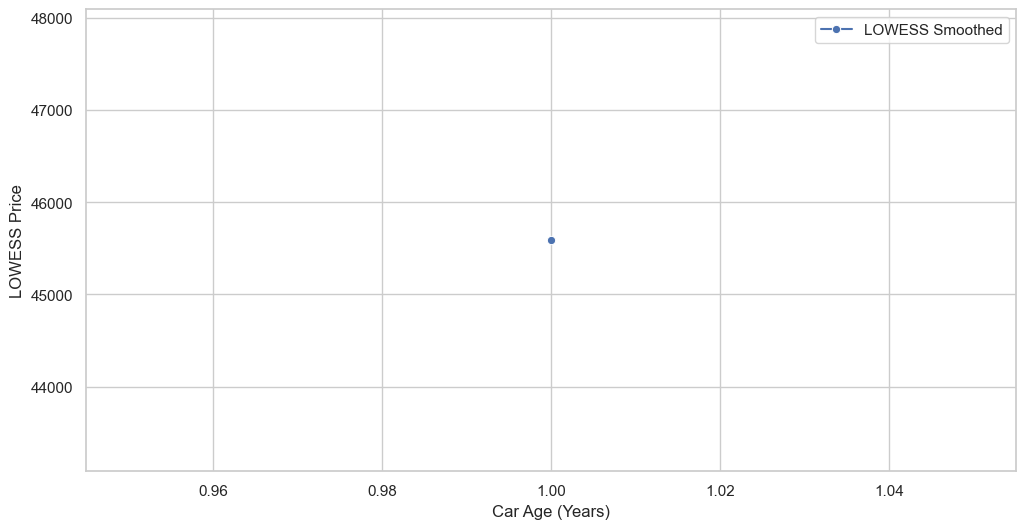

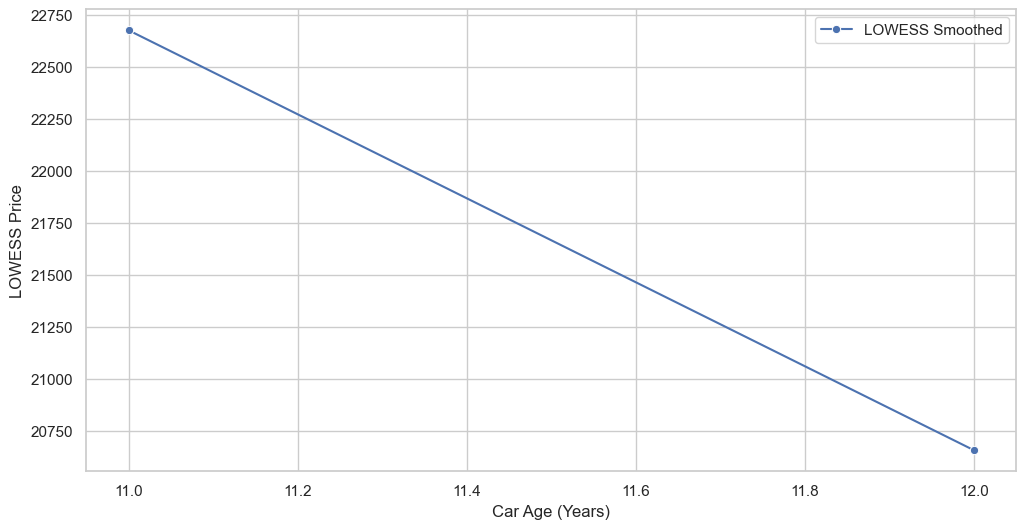

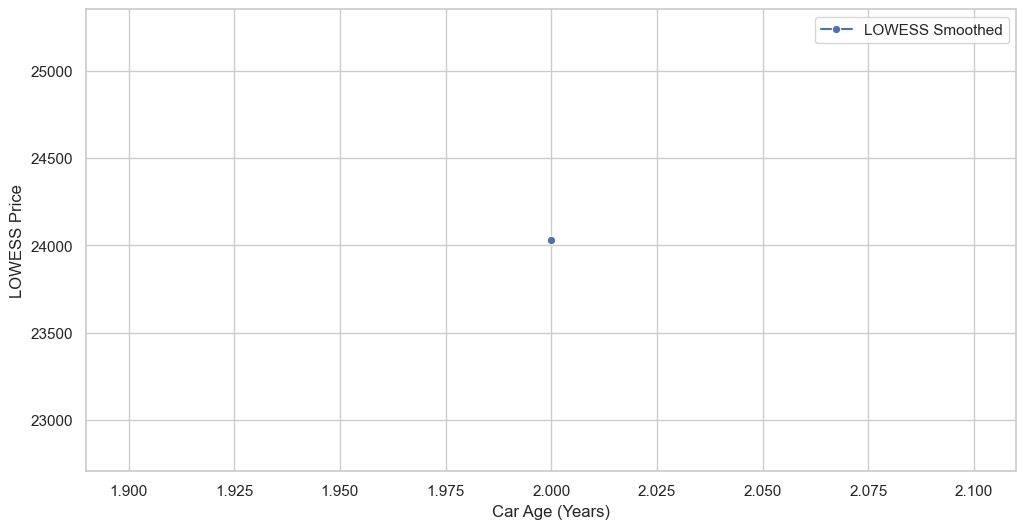

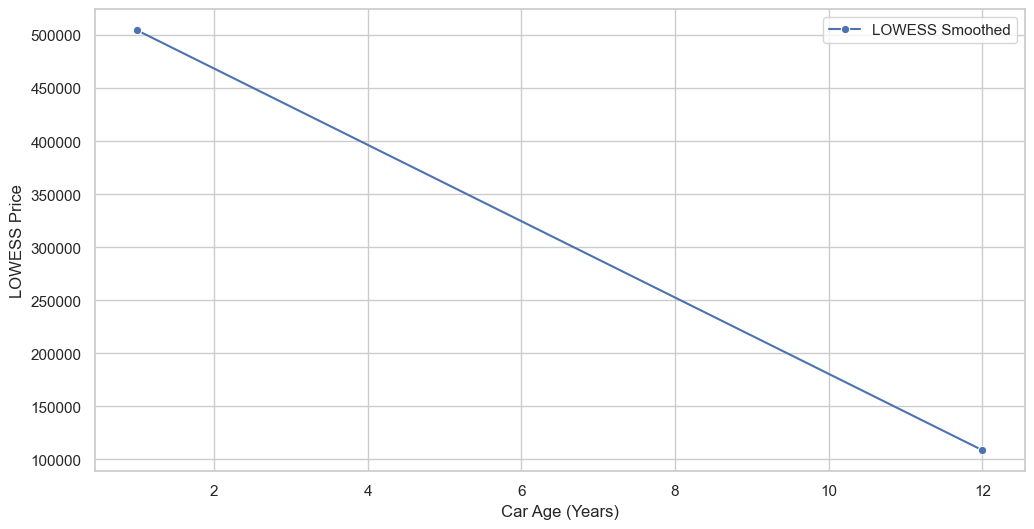

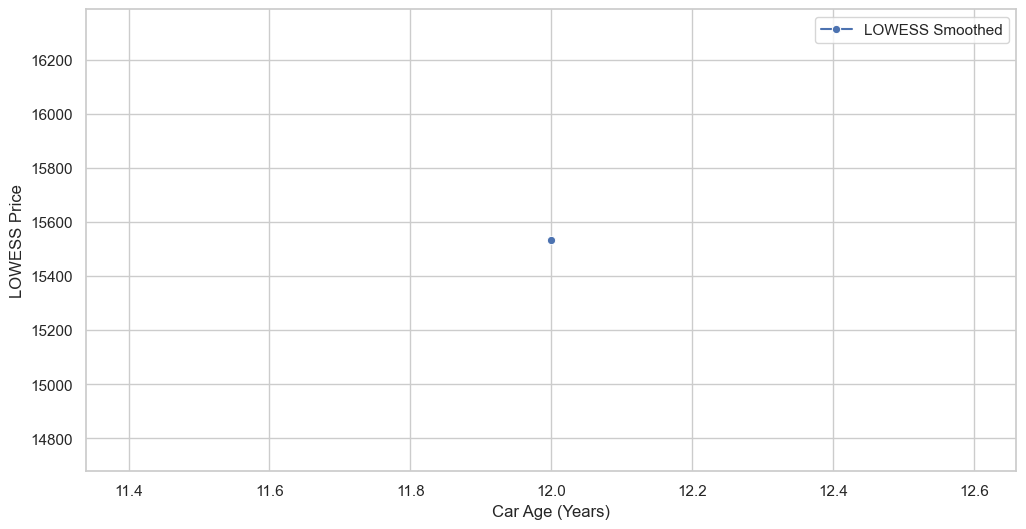

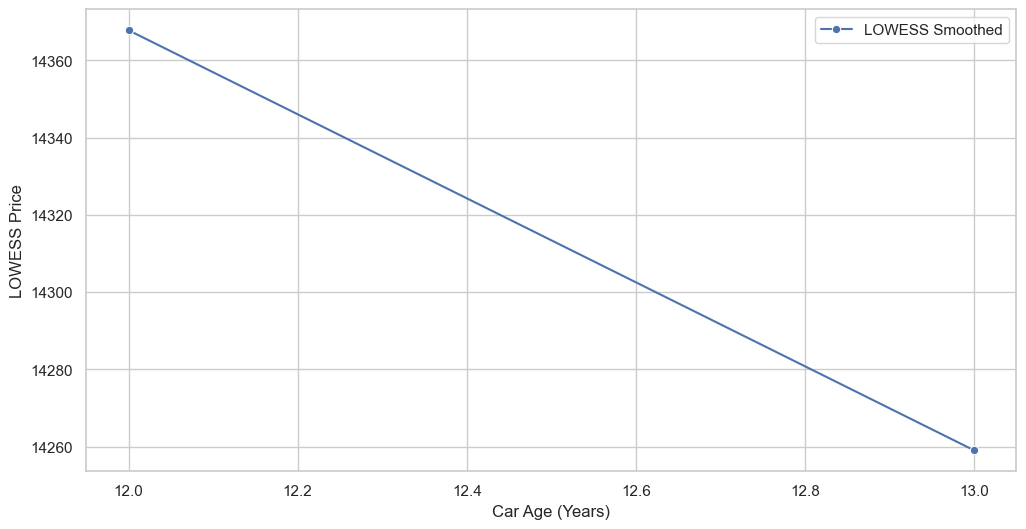

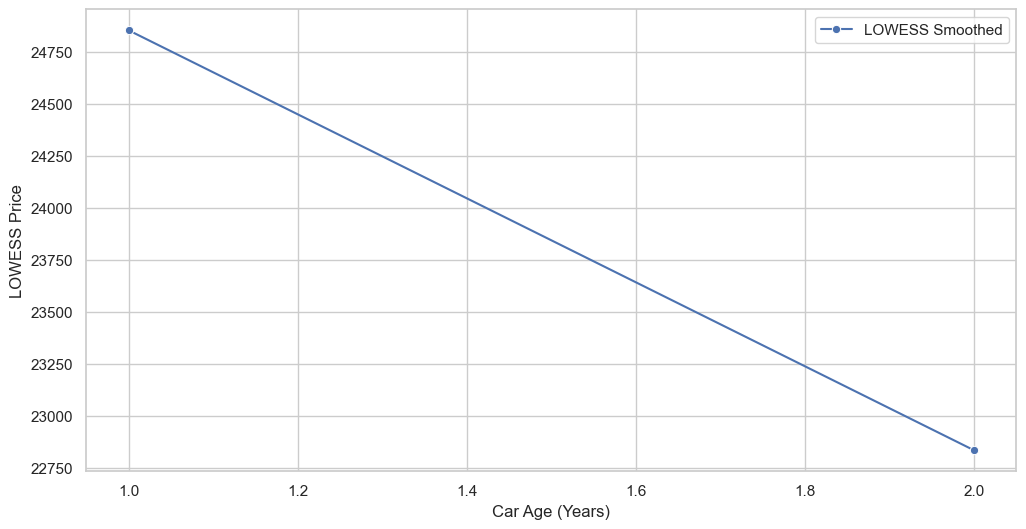

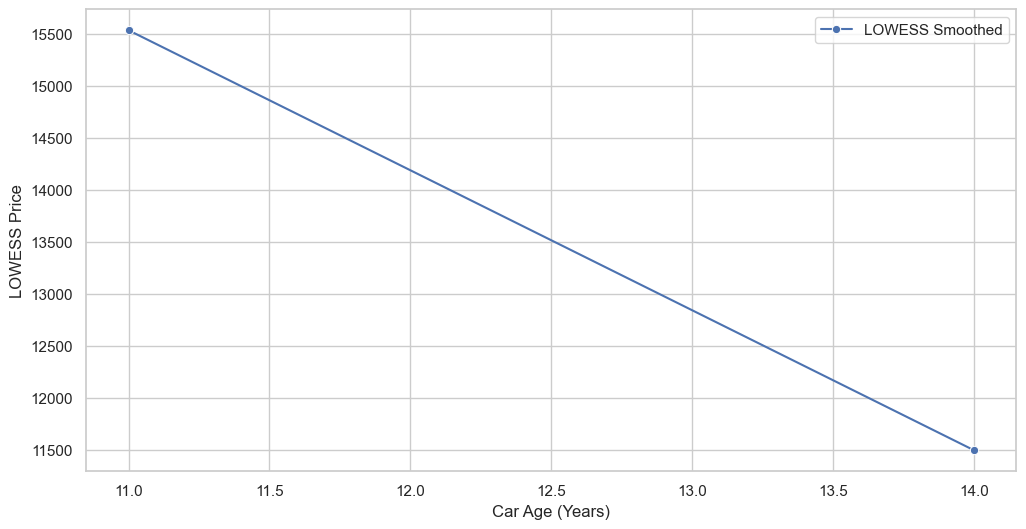

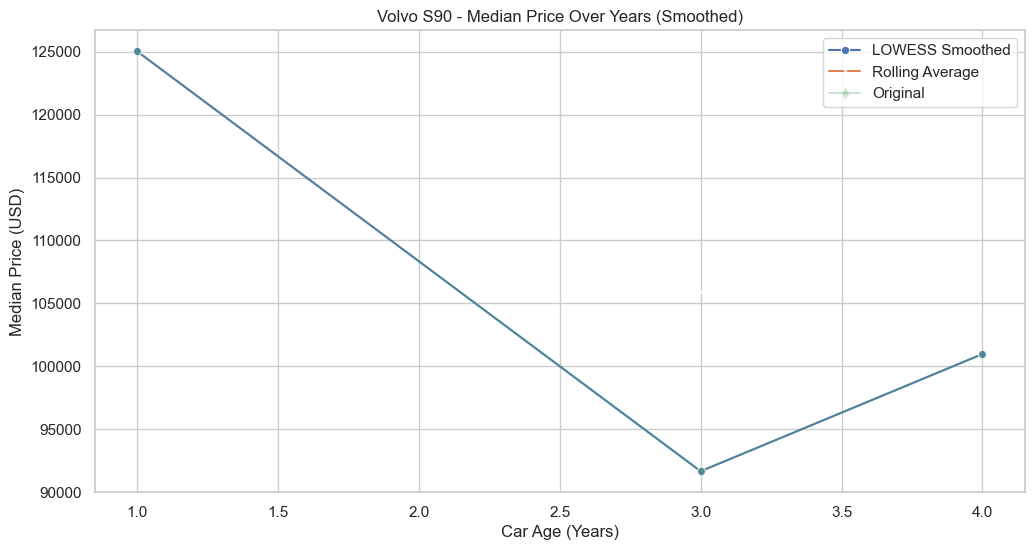

Volvo S90 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count      Price USD
0                1              NaN          5  125038.831935
2                3       -26.708075          5   91643.367505
3                4        10.169492          5  100963.031998
Processing Tata Indigo
Columns in median_prices for Tata Indigo: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Tata Indigo: 'y'
Processing Suzuki SX4
Columns in median_prices for Suzuki SX4: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')


/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


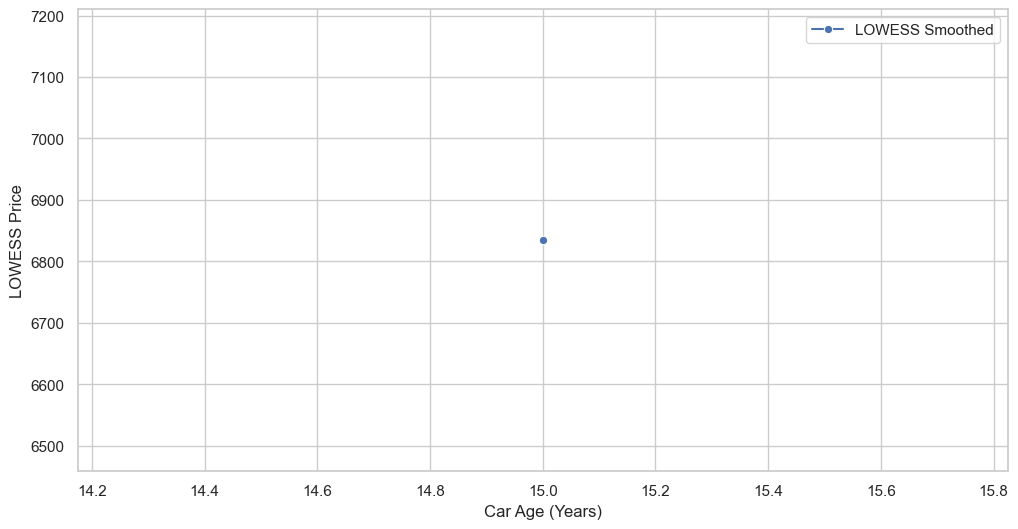

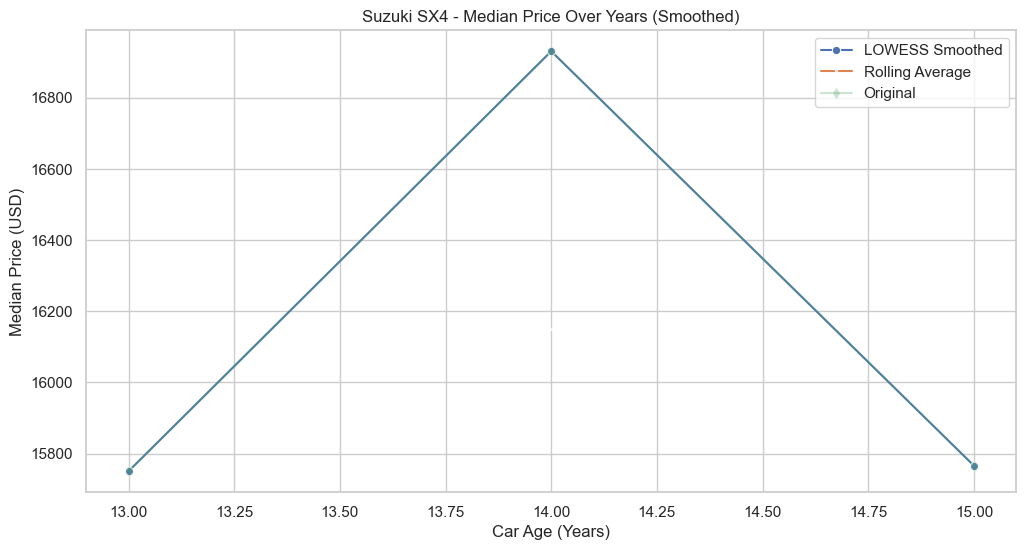

Suzuki SX4 - Percentage Loss Over Years
   Car Age (Years)  Percentage Loss  Car Count     Price USD
2               13              NaN          7  15750.232992
3               14         7.495069          5  16930.723827
4               15        -6.880734          6  15765.765766
Processing Citroen C3 Picasso
Columns in median_prices for Citroen C3 Picasso: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Citroen C3 Picasso: 'y'
Processing Toyota Verso
Columns in median_prices for Toyota Verso: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Toyota Verso: 'y'
Processing Tata Marina
No data available for Tata Marina after filtering for car count.
Processing Porsche 911
Columns in median_prices for Porsche 911: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
 

/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res

Columns in median_prices for Dacia Jogger: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Dacia Jogger: 'y'
Processing Dacia Duster
Columns in median_prices for Dacia Duster: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Dacia Duster: 'y'
Processing Chevrolet Epica
Columns in median_prices for Chevrolet Epica: Index(['Car Age (Years)', 'Price USD', 'Car Count', 'Smoothed Price',
       'LOWESS Price', 'Percentage Loss'],
      dtype='object')
Error processing Chevrolet Epica: 'y'
Processing Audi A8
No data available for Audi A8 after filtering for car count.
Processing Toyota Corona
No data available for Toyota Corona after applying filters.
Processing Citroen C2
No data available for Citroen C2 after applying filters.
Processing Jaguar X-Type
No data available for Jaguar X-Type

/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/soringrigoras/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


Error processing Volkswagen Scirocco: 'y'
Processing Chevrolet Rezzo
No data available for Chevrolet Rezzo after applying filters.

Results for Opel Corsa:
    Car Age (Years)     Price USD  Car Count  Smoothed Price  LOWESS Price  \
1                 1  34172.103138         76             NaN  34172.103138   
2                 2  29512.270892         39    30651.340996  29512.270892   
3                 3  28269.648959         31    28290.359325  28269.648959   
4                 4  27089.158124         50    26426.426426  27089.158124   
5                 5  23920.472196         17    25302.889096  23920.472196   
6                 6  24899.036968          6    23625.349487  24899.036968   
7                 7  22056.539298         55    22538.055297  22056.539298   
8                 8  20658.589624         45    20917.469193  20658.589624   
9                 9  20037.278658         85    19364.191778  20037.278658   
10               10  17396.707052        115    18018.018018  17

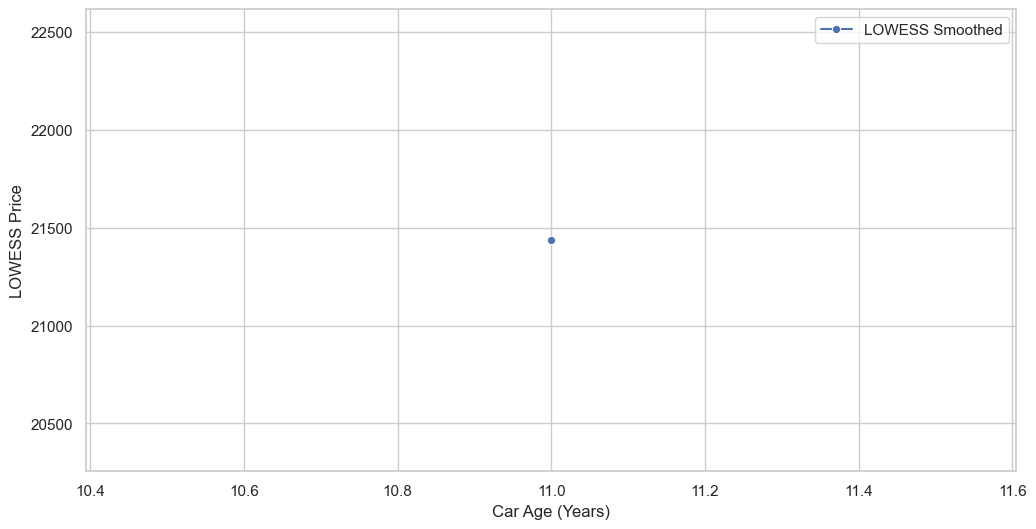

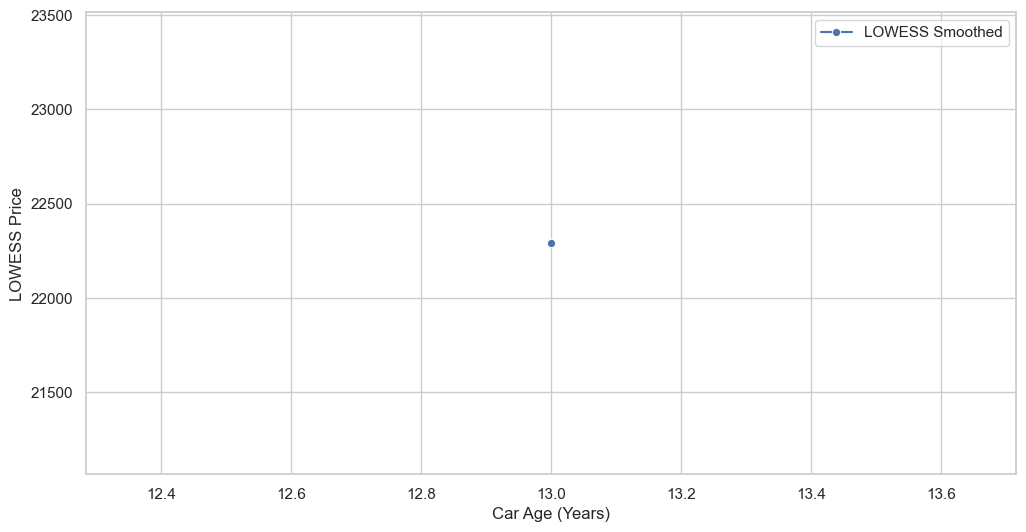

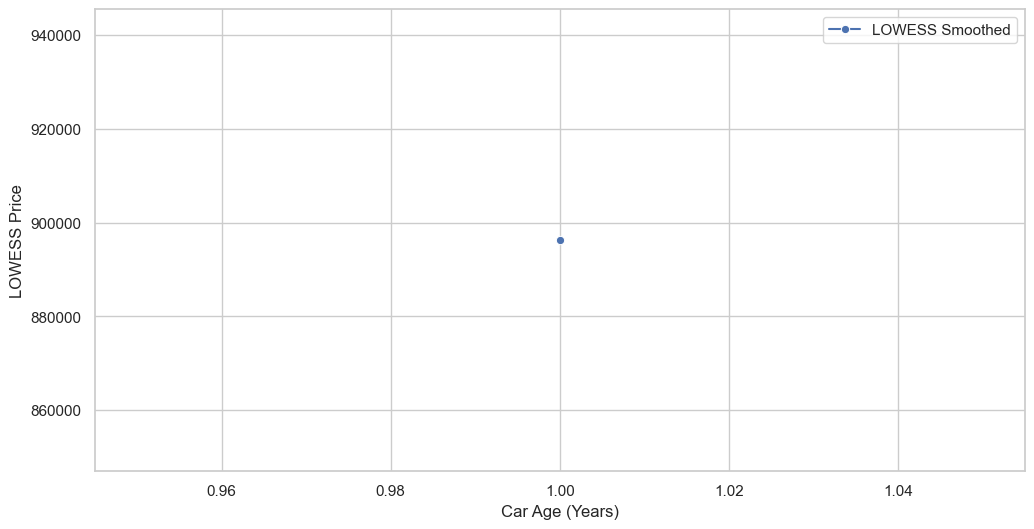

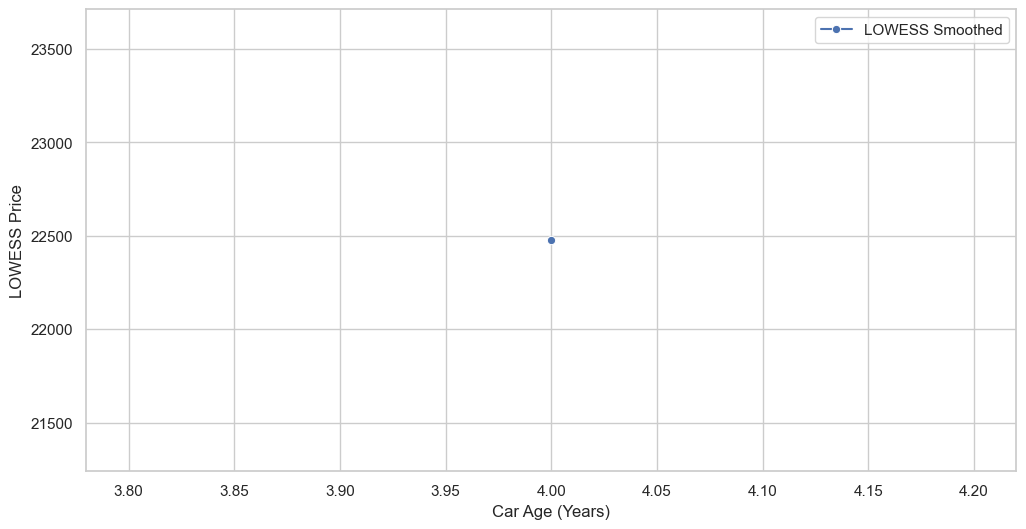

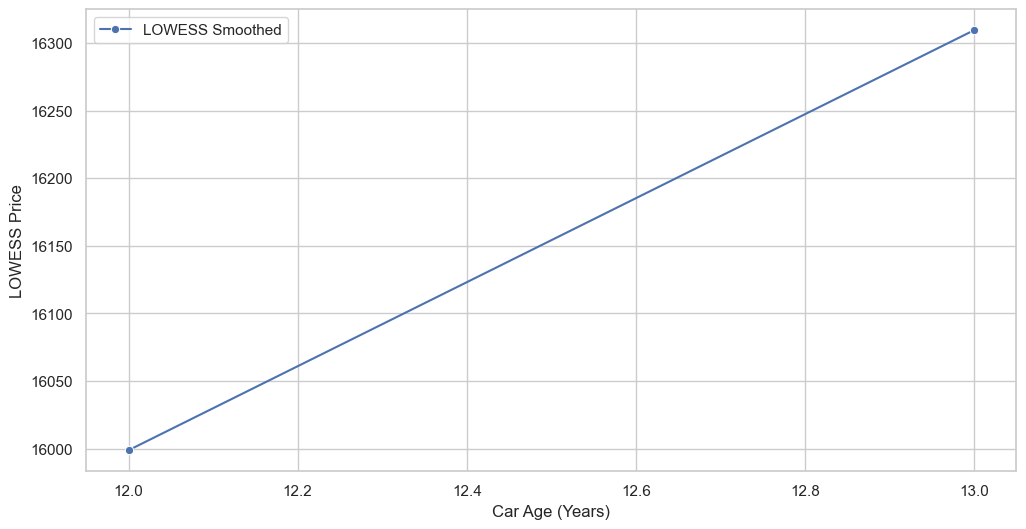

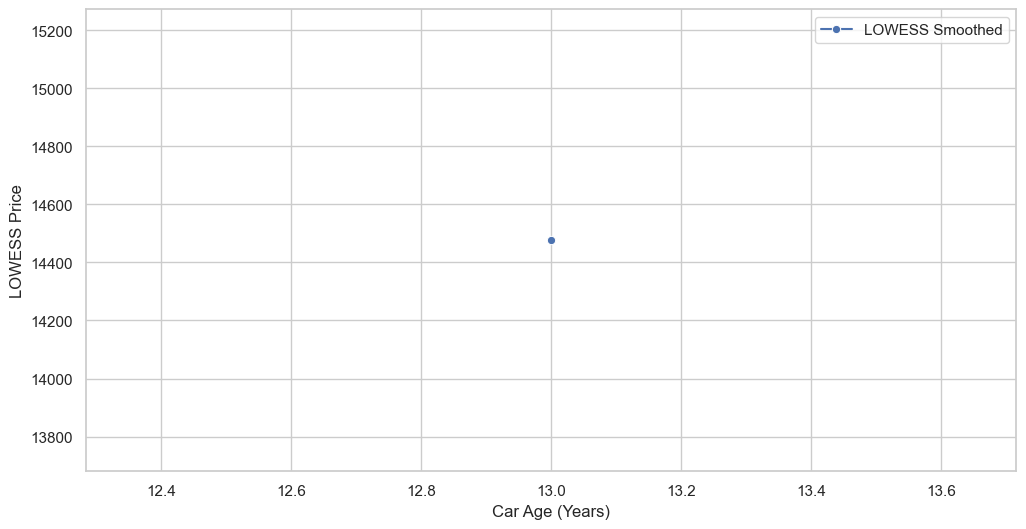

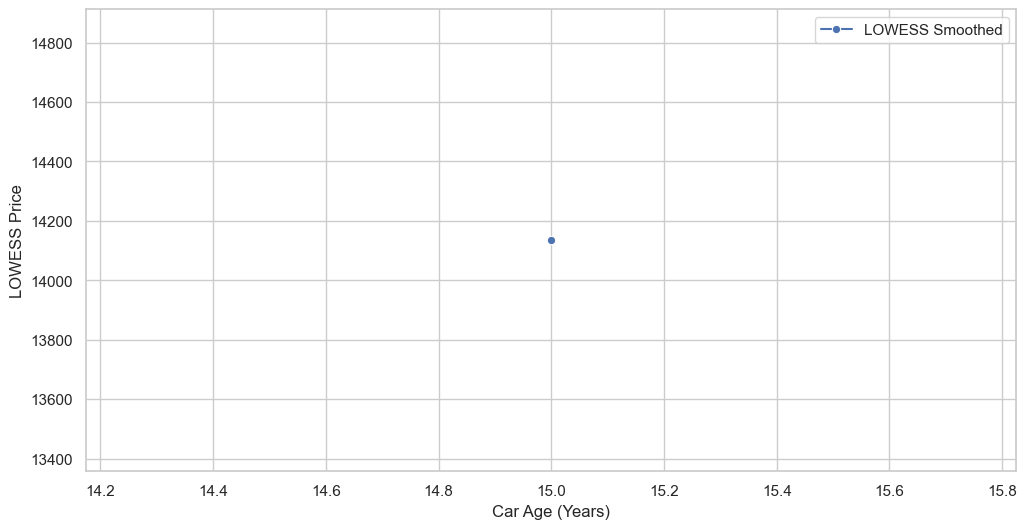

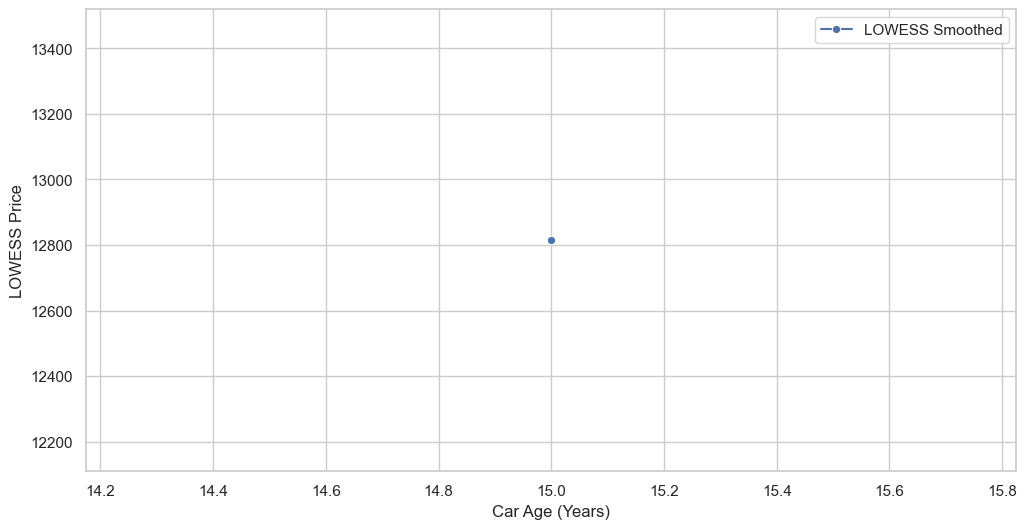

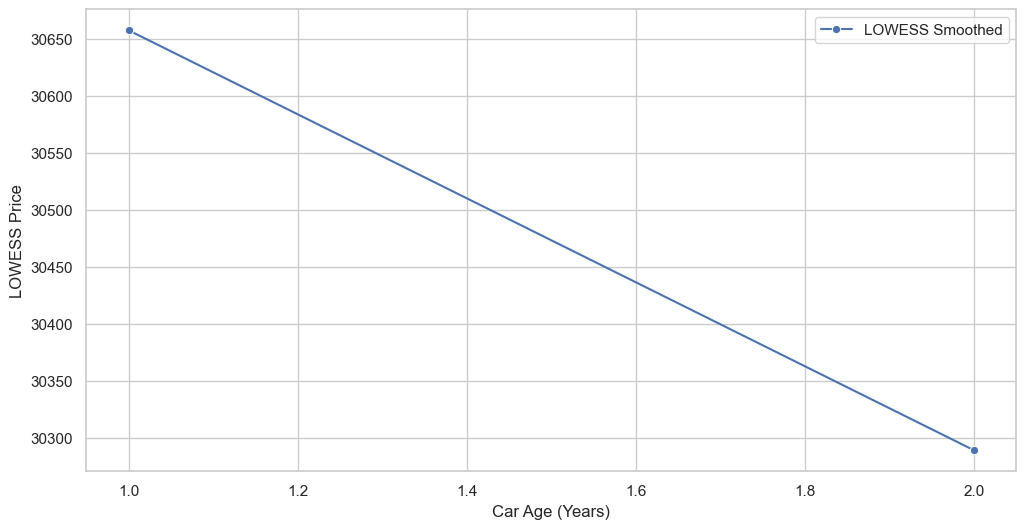

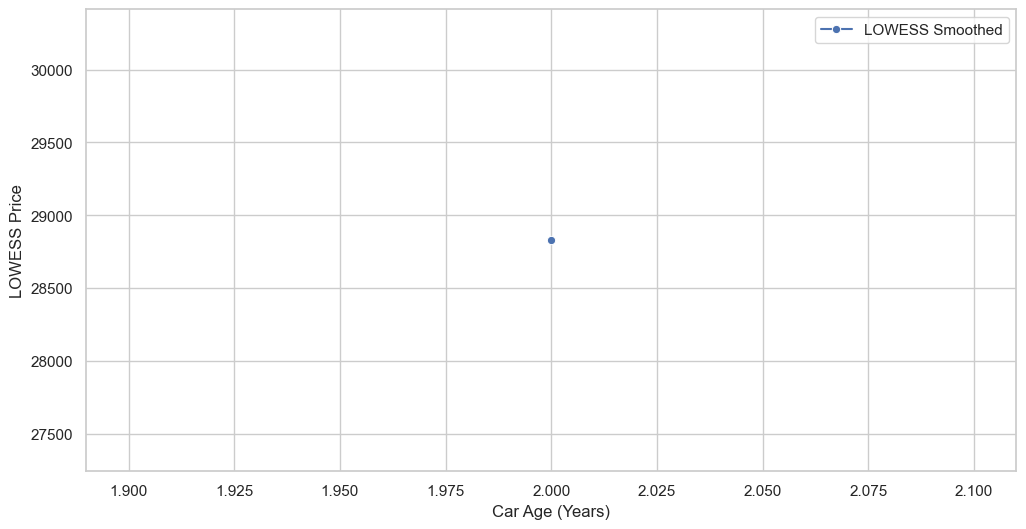

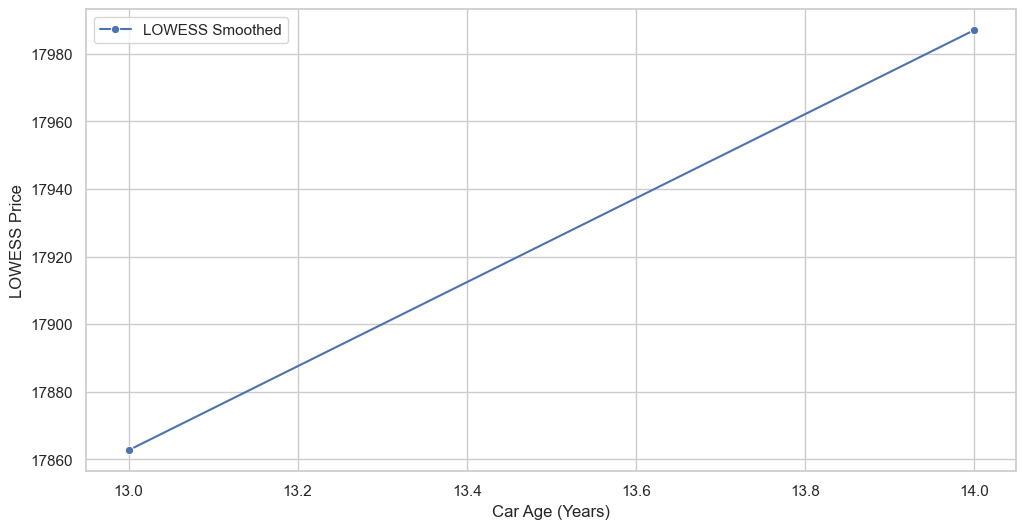

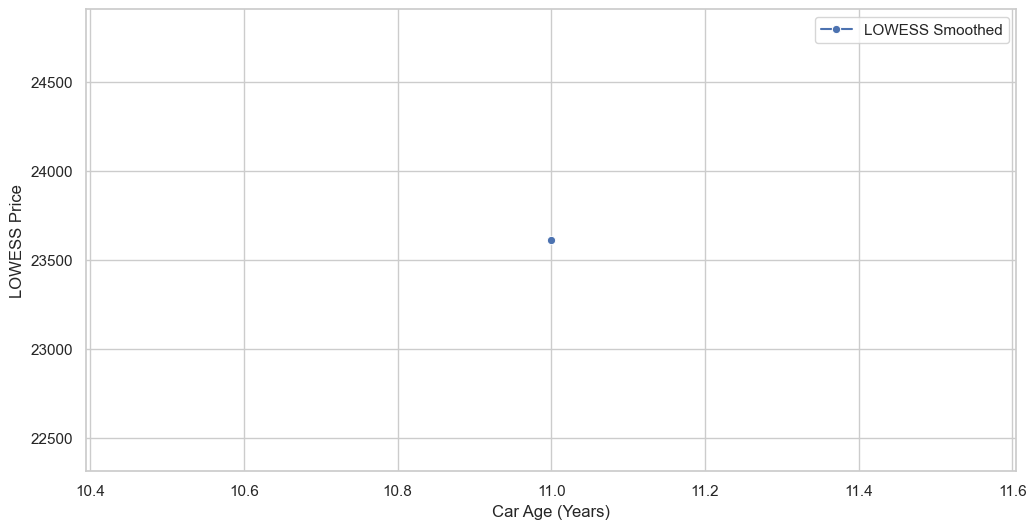

In [11]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Identify all Make-Model combinations and count their occurrences
make_model_counts = df_2024.groupby(['Make', 'Model']).size().reset_index(name='counts')

# Filter out Make-Model combinations with fewer than 20 entries
make_model_filtered = make_model_counts[make_model_counts['counts'] >= 20]

# Remove specific models(Diger in Turkish means "Other")
# make_model_filtered = make_model_filtered[~((make_model_filtered['Make'] == 'BMW') & (make_model_filtered['Model'] == 'Diğer'))]
# make_model_filtered = make_model_filtered[~((make_model_filtered['Make'] == 'Chevrolet') & (make_model_filtered['Model'] == 'Kalos'))]
# make_model_filtered = make_model_filtered[~(make_model_filtered['Model'] == 'Diğer')]

# Sort the Make-Model combinations by total counts in descending order
make_model_filtered = make_model_filtered.sort_values(by='counts', ascending=False)

# Prepare a dictionary to store results
results = {}
percentage_losses = []

# Process each Make-Model combination
for _, row in make_model_filtered.iterrows():
    make, model = row['Make'], row['Model']
    print(f"Processing {make} {model}")
    
    try:
        df_make_model = df_2024[(df_2024['Make'] == make) & (df_2024['Model'] == model)]
        
        # Filter based on kilometers
        median_km = df_make_model['Kilometers (km)'].median()
        df_make_model = df_make_model[df_make_model['Kilometers (km)'] <= median_km * 1.3]
        
        # Filter out cars older than 15 years
        df_make_model = df_make_model[df_make_model['Car Age (Years)'] <= 15]

        # Ensure there are still rows left after filtering
        if df_make_model.empty:
            print(f"No data available for {make} {model} after applying filters.")
            continue

        # Group by "Car Age (Years)" and calculate the median price for each age
        median_prices = df_make_model.groupby('Car Age (Years)')['Price USD'].median().reset_index()

        # Ensure we have a complete range of years
        min_year = int(median_prices['Car Age (Years)'].min())
        max_year = int(median_prices['Car Age (Years)'].max())
        all_years = pd.DataFrame({'Car Age (Years)': range(min_year, max_year + 1)})
        median_prices = pd.merge(all_years, median_prices, on='Car Age (Years)', how='left')
        median_prices['Price USD'].interpolate(method='linear', inplace=True)

        # Add the count of cars used to calculate the median price for each year
        car_counts = df_make_model.groupby('Car Age (Years)').size().reindex(all_years['Car Age (Years)'], fill_value=0).reset_index(name='Car Count')
        median_prices = pd.merge(median_prices, car_counts, on='Car Age (Years)', how='left')

        # Filter out entries with fewer than 5 cars
        median_prices = median_prices[median_prices['Car Count'] >= 5]

        if median_prices.empty:
            print(f"No data available for {make} {model} after filtering for car count.")
            continue

        # Apply rolling average for smoothing
        median_prices['Smoothed Price'] = median_prices['Price USD'].rolling(window=3, center=True).mean()

        # Apply LOWESS for further smoothing
        lowess_smoothed = lowess(median_prices['Price USD'], median_prices['Car Age (Years)'], frac=0.2)
        median_prices['LOWESS Price'] = lowess_smoothed[:, 1]

        # Calculate the percentage loss for each year-to-year step
        median_prices['Percentage Loss'] = median_prices['LOWESS Price'].pct_change() * 100

        # Calculate the percentage loss over every possible 3-year period
        for start_year in range(min_year, max_year - 2):
            end_year = start_year + 3
            if end_year <= max_year:
                start_price = median_prices.loc[median_prices['Car Age (Years)'] == start_year, 'LOWESS Price'].values
                end_price = median_prices.loc[median_prices['Car Age (Years)'] == end_year, 'LOWESS Price'].values
                if len(start_price) > 0 and len(end_price) > 0:
                    percentage_loss_3yr = ((end_price[0] - start_price[0]) / start_price[0]) * 100
                    percentage_losses.append((make, model, start_year, end_year, percentage_loss_3yr))

        # Store the median prices in the results dictionary
        results[(make, model)] = median_prices

        # Print the columns of median_prices to ensure correct column names
        print(f'Columns in median_prices for {make} {model}: {median_prices.columns}')

        # Skip problematic entries
        if 'Smoothed Price' not in median_prices.columns or 'LOWESS Price' not in median_prices.columns:
            print(f"Skipping {make} {model} due to missing columns.")
            continue

        # Plot the results
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=median_prices, x='Car Age (Years)', y='LOWESS Price', marker='o', label='LOWESS Smoothed')
        sns.lineplot(data=median_prices, x='Car Age (Years)', y='Smoothed Price', marker='x', label='Rolling Average')
        sns.lineplot(data=median_prices, x='Car Age (Years)', y='Price USD', marker='d', label='Original', alpha=0.3)
        plt.title(f'{make} {model} - Median Price Over Years (Smoothed)')
        plt.xlabel('Car Age (Years)')
        plt.ylabel('Median Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Display the percentage loss along with Car Count and Price USD
        print(f'{make} {model} - Percentage Loss Over Years')
        print(median_prices[['Car Age (Years)', 'Percentage Loss', 'Car Count', 'Price USD']])

    except Exception as e:
        print(f"Error processing {make} {model}: {e}")
        continue

# Identify the top 20 Make-Model combinations with the least percentage loss over any 3-year period
top_20_make_models = sorted(percentage_losses, key=lambda x: x[4], reverse=True)[:20]

# Print the results dictionary for inspection
for key, value in results.items():
    make, model = key
    print(f"\nResults for {make} {model}:")
    print(value)

# Print the top 20 Make-Model combinations with the least percentage loss over any 3-year period
print("\nTop 20 Make-Model combinations with the least percentage loss over any 3-year period:")
for make, model, start_year, end_year, percentage_loss_3yr in top_20_make_models:
    print(f"{make} {model} ({start_year}-{end_year}) - 3-Year Percentage Loss: {percentage_loss_3yr:.2f}%")

# At the bottom the function presents the Top20 Make-Model-Year combinations; I choose 4 of them:


#Top 20 Make-Model combinations with the least percentage loss over any 3-year period:
#Alfa Romeo Giulietta (10-13) - 3-Year Percentage Loss: 8.71%
#Seat Ibiza (3-6) - 3-Year Percentage Loss: 5.44%
#Fiat Egea (6-9) - 3-Year Percentage Loss: 4.97%
#Toyota Auris (7-10) - 3-Year Percentage Loss: 3.09%
#Volkswagen Golf (4-7) - 3-Year Percentage Loss: 0.48%
#Hyundai Elantra (10-13) - 3-Year Percentage Loss: 0.44%
#Renault Symbol (12-15) - 3-Year Percentage Loss: -1.16%
#Dacia Sandero (4-7) - 3-Year Percentage Loss: -1.40%
#Fiat Egea (5-8) - 3-Year Percentage Loss: -1.70%
#Toyota Auris (8-11) - 3-Year Percentage Loss: -1.71%
#Kia Ceed (4-7) - 3-Year Percentage Loss: -2.45%
#Citroen C-Elysee (9-12) - 3-Year Percentage Loss: -3.08%
#Hyundai Accent Blue (10-13) - 3-Year Percentage Loss: -3.57%
#Hyundai i20 (2-5) - 3-Year Percentage Loss: -3.89%
#Volkswagen Polo (11-14) - 3-Year Percentage Loss: -4.10%
#Peugeot 208 (7-10) - 3-Year Percentage Loss: -4.10%
#Renault Clio (5-8) - 3-Year Percentage Loss: -4.32%
#Dacia Sandero (3-6) - 3-Year Percentage Loss: -4.64%
#Peugeot 301 (4-7) - 3-Year Percentage Loss: -4.80%
#Seat Ibiza (10-13) - 3-Year Percentage Loss: -4.85%

In [12]:
# Look further into these specific makes and models and choose the ones worth investing into

# List of top 20 Make-Model combinations with the least percentage loss over any 3-year period
top_20_make_models = [
    ("Alfa Romeo", "Giulietta", 10, 13, 8.71),
    ("Seat", "Ibiza", 3, 6, 5.06),
    ("Fiat", "Egea", 6, 9, 4.37),
    ("Toyota", "Auris", 7, 10, 3.09),
    ("Hyundai", "Elantra", 10, 13, 0.44),
    ("Volkswagen", "Golf", 4, 7, 0.00),
    ("Renault", "Symbol", 12, 15, -1.38),
    ("Dacia", "Sandero", 4, 7, -1.69),
    ("Fiat", "Egea", 5, 8, -1.70),
    ("Toyota", "Auris", 8, 11, -3.04),
    ("Citroen", "C-Elysee", 9, 12, -3.08),
    ("Hyundai", "i20", 2, 5, -3.42),
    ("Hyundai", "Accent Blue", 10, 13, -3.57),
    ("Volkswagen", "Polo", 11, 14, -3.69),
    ("Peugeot", "308", 12, 15, -3.89),
    ("Dacia", "Sandero", 3, 6, -3.97),
    ("Kia", "Ceed", 4, 7, -3.98),
    ("Peugeot", "208", 7, 10, -4.10),
    ("Renault", "Clio", 5, 8, -4.32),
    ("Peugeot", "301", 4, 7, -4.80)
]

# Print the summary statistics for each Make-Model combination
for make, model, start_year, end_year, _ in top_20_make_models:
    key = (make, model)
    if key in results:
        median_prices = results[key]
        print(f"\nSummary statistics for {make} {model} ({start_year}-{end_year}):")
        
        # Filter based on the specified year range
        filtered_prices = median_prices[(median_prices['Car Age (Years)'] >= start_year) & (median_prices['Car Age (Years)'] <= end_year)]
        
        # Calculate median km for each car age in the range
        km_median = df_2024[(df_2024['Make'] == make) & (df_2024['Model'] == model)]
        km_median = km_median.groupby('Car Age (Years)')['Kilometers (km)'].median().reset_index()
        filtered_prices = pd.merge(filtered_prices, km_median, on='Car Age (Years)', how='left')
        
        print(filtered_prices[['Car Age (Years)', 'Percentage Loss', 'Car Count', 'Price USD', 'Kilometers (km)']])
    else:
        print(f"\nNo data available for {make} {model}.")
        
##################################################################################################################
##################################################################################################################
# Based on the below I chose the 4 Make-Model combinations I am interested in:
######## Fiat Egea (6-9) - 3-Year Percentage Loss: 4.37%
######## Volkswagen Golf (4-7) - 3-Year Percentage Loss: 0.00%
######## Dacia Sandero (4-7) - 3-Year Percentage Loss: -1.69%
######## Hyundai i20 (2-5) - 3-Year Percentage Loss: -3.42%
##################################################################################################################
##################################################################################################################'''


Summary statistics for Alfa Romeo Giulietta (10-13):
   Car Age (Years)  Percentage Loss  Car Count     Price USD  Kilometers (km)
0               10        -5.035971         15  20503.261883         162250.0
1               11        -1.515152          7  20192.606400         154000.0
2               12         1.461538         14  20487.729108         171000.0
3               13         8.794541         10  22289.530910         182000.0

Summary statistics for Seat Ibiza (3-6):
   Car Age (Years)  Percentage Loss  Car Count     Price USD  Kilometers (km)
0                3        -7.469512         24  23570.984778          34000.0
1                4        -2.471170         10  22988.505747          39050.0
2                6         8.108108          9  24852.438646          59000.0

Summary statistics for Fiat Egea (6-9):
   Car Age (Years)  Percentage Loss  Car Count     Price USD  Kilometers (km)
0                6        -1.348148         61  20686.548618         140000.0
1    

In [15]:
'''import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
import joblib

##########################
# List available models
##########################

# List of model files based on the provided results
model_files = [
    "Audi_A3_model.pkl", "Audi_A4_model.pkl", "Audi_A5_model.pkl", "Audi_A6_model.pkl", "BMW_1_Series_model.pkl",
    "BMW_3_Series_model.pkl", "BMW_5_Series_model.pkl", "Chevrolet_Aveo_model.pkl", "Chevrolet_Cruze_model.pkl",
    "Chevrolet_Kalos_model.pkl", "Chevrolet_Lacetti_model.pkl", "Citroen_C-Elysee_model.pkl", "Citroen_C3_model.pkl",
    "Citroen_C4_model.pkl", "Citroen_C5_model.pkl", "Dacia_Logan_model.pkl", "Dacia_Lodgy_model.pkl", "Dacia_Sandero_model.pkl",
    "Fiat_Albea_model.pkl", "Fiat_Egea_model.pkl", "Fiat_Linea_model.pkl", "Fiat_Palio_model.pkl", "Fiat_Punto_model.pkl",
    "Ford_Escort_model.pkl", "Ford_Fiesta_model.pkl", "Ford_Focus_model.pkl", "Ford_Mondeo_model.pkl", "Honda_Civic_model.pkl",
    "Honda_City_model.pkl", "Honda_Jazz_model.pkl", "Hyundai_Accent_model.pkl", "Hyundai_Accent_Blue_model.pkl",
    "Hyundai_Accent_Era_model.pkl", "Hyundai_Elantra_model.pkl", "Hyundai_Getz_model.pkl", "Hyundai_i20_model.pkl",
    "Hyundai_i30_model.pkl", "Kia_Ceed_model.pkl", "Kia_Cerato_model.pkl", "Kia_Picanto_model.pkl", "Kia_Rio_model.pkl",
    "Lada_Samara_model.pkl", "Lada_Vega_model.pkl", "Mazda_3_model.pkl", "Mazda_323_model.pkl", "Mercedes_A_model.pkl",
    "Mercedes_C_model.pkl", "Mercedes_CLA_model.pkl", "Mercedes_E_model.pkl", "MINI_Cooper_model.pkl", "Mitsubishi_Lancer_model.pkl",
    "Nissan_Micra_model.pkl", "Nissan_Primera_model.pkl", "Opel_Astra_model.pkl", "Opel_Corsa_model.pkl", "Opel_Vectra_model.pkl",
    "Peugeot_206_model.pkl", "Peugeot_207_model.pkl", "Peugeot_208_model.pkl", "Peugeot_301_model.pkl", "Peugeot_307_model.pkl",
    "Peugeot_308_model.pkl", "Peugeot_508_model.pkl", "Renault_Clio_model.pkl", "Renault_Fluence_model.pkl", "Renault_Laguna_model.pkl",
    "Renault_Megane_model.pkl", "Renault_R_9_model.pkl", "Renault_Symbol_model.pkl", "Seat_Cordoba_model.pkl", "Seat_Leon_model.pkl",
    "Seat_Toledo_model.pkl", "Skoda_Fabia_model.pkl", "Skoda_Favorit_model.pkl", "Skoda_Felicia_model.pkl", "Skoda_Octavia_model.pkl",
    "Skoda_Rapid_model.pkl", "Skoda_SuperB_model.pkl", "Suzuki_Swift_model.pkl", "Tofaş_Doğan_model.pkl", "Tofaş_Kartal_model.pkl",
    "Tofaş_Şahin_model.pkl", "Toyota_Auris_model.pkl", "Toyota_Corolla_model.pkl", "Toyota_Yaris_model.pkl", "Volkswagen_Golf_model.pkl",
    "Volkswagen_Jetta_model.pkl", "Volkswagen_Passat_model.pkl", "Volkswagen_Polo_model.pkl"
]

# Extracting the available models from the filenames and sorting them alphabetically
available_models = sorted([model.replace('_model.pkl', '').replace('_', ' ') for model in model_files])

# Print available models
print("Available models:")
print(" / ".join(available_models))

##########################
# User input
##########################

# Function to clean and prepare user input
def clean_input(input_str):
    return input_str.strip().title()

# Function to check if the make and model exist in the available models
def model_exists(make, model, available_models):
    return f"{make} {model}" in available_models

# Prompt user for input
print("\nTell me about your great find")

while True:
    make = clean_input(input("Enter Make: "))
    model = clean_input(input("Enter Model: "))
    if model_exists(make, model, available_models):
        break
    else:
        print(f"Model {make} {model} is not available. Please enter again.")

# Ensure the year is a valid year format
while True:
    try:
        year = int(clean_input(input("Enter Year: ")))
        if year < 1900 or year > 2024:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid year between 1900 and 2024.")

# Ensure the price is a valid number
while True:
    try:
        price = float(re.sub(r'[^\d.]', '', input("Enter Price in USD: ")))
        break
    except ValueError:
        print("Please enter a valid price.")

# Ensure the kilometers is a valid number
while True:
    try:
        km = int(re.sub(r'[^\d]', '', input("Enter Approximate km: ")))
        break
    except ValueError:
        print("Please enter valid kilometers.")

# Display the collected input data
print(f"\nInput data:")
print(f"Make: {make}")
print(f"Model: {model}")
print(f"Year: {year}")
print(f"Price USD: {price}")
print(f"Km: {km}")

##########################
# Display feature importance for the specified model
##########################

# Print details about the model available for this vehicle
print("\nDetails about the model available for this vehicle:")

# Load the XGBoost model for the specified make and model
model_file = f"{make}_{model}_model.pkl".replace(" ", "_")
xgb_model = joblib.load(model_file)

# Get feature importance from the model
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Assuming 'X_columns' is a list of column names from your dataset's features
X_columns = [
    'Year', 'Kilometers (km)', 'Engine Size (cc)', 'Engine Power (hp)',
    'Fuel Tank Size (L)', 'Transmission_Automatic', 'Transmission_Manual',
    'Fuel Type_Diesel', 'Fuel Type_Gasoline', 'Body Type_SUV',
    'Body Type_Sedan', 'Vehicle Condition_Used', 'From_Dealer', 'From_Owner'
]  # Replace with actual column names used in the model training

# Map generic names (f0, f1, ...) back to the original feature names
feature_map = {f"f{i}": col for i, col in enumerate(X_columns)}
sorted_features = [(feature_map.get(k, k), v) for k, v in sorted_features]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame(sorted_features, columns=['Feature', 'Importance'])

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title(f'Feature Importances for {make} {model}')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


####################################################
# Depreciation graph and generic Make-Model info
####################################################

# Filter the dataframe for the specific Make and Model provided by the user
df_make_model = df_2024[(df_2024['Make'].str.title() == make) & (df_2024['Model'].str.title() == model)]

# Filter based on kilometers
median_km = df_make_model['Kilometers (km)'].median()
df_make_model = df_make_model[df_make_model['Kilometers (km)'] <= median_km * 1.3]

# Filter out cars older than 15 years
df_make_model = df_make_model[df_make_model['Car Age (Years)'] <= 15]

# Ensure there are still rows left after filtering
if df_make_model.empty:
    print(f"No data available for {make} {model} after applying filters.")
else:
    # Group by "Car Age (Years)" and calculate the median price for each age
    median_prices = df_make_model.groupby('Car Age (Years)')['USD Absolute'].median().reset_index()

    # Ensure we have a complete range of years
    min_year = int(median_prices['Car Age (Years)'].min())
    max_year = int(median_prices['Car Age (Years)'].max())
    all_years = pd.DataFrame({'Car Age (Years)': range(min_year, max_year + 1)})
    median_prices = pd.merge(all_years, median_prices, on='Car Age (Years)', how='left')
    median_prices['USD Absolute'].interpolate(method='linear', inplace=True)

    # Add the count of cars used to calculate the median price for each year
    car_counts = df_make_model.groupby('Car Age (Years)').size().reindex(all_years['Car Age (Years)'], fill_value=0).reset_index(name='Car Count')
    median_prices = pd.merge(median_prices, car_counts, on='Car Age (Years)', how='left')

    # Filter out entries with fewer than 5 cars
    median_prices = median_prices[median_prices['Car Count'] >= 5]

    if median_prices.empty:
        print(f"No data available for {make} {model} after filtering for car count.")
    else:
        # Apply rolling average for smoothing
        median_prices['Smoothed Price'] = median_prices['USD Absolute'].rolling(window=3, center=True).mean()

        # Apply LOWESS for further smoothing
        lowess_smoothed = lowess(median_prices['USD Absolute'], median_prices['Car Age (Years)'], frac=0.2)
        median_prices['LOWESS Price'] = lowess_smoothed[:, 1]

        # Calculate the percentage loss for each year-to-year step
        median_prices['Percentage Loss'] = median_prices['LOWESS Price'].pct_change() * 100

        # Plot the results
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=median_prices, x='Car Age (Years)', y='LOWESS Price', marker='o', label='LOWESS Smoothed')
        sns.lineplot(data=median_prices, x='Car Age (Years)', y='Smoothed Price', marker='x', label='Rolling Average')
        sns.lineplot(data=median_prices, x='Car Age (Years)', y='USD Absolute', marker='d', label='Original', alpha=0.3)
        plt.title(f'{make} {model} - Median Price Over Years (Smoothed)')
        plt.xlabel('Car Age (Years)')
        plt.ylabel('Median Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Display the percentage loss along with Car Count and USD Absolute
        print(f'{make} {model} - Percentage Loss Over Years')
        print(median_prices[['Car Age (Years)', 'Percentage Loss', 'Car Count', 'USD Absolute']])
        
##########################
# Top 5 similar km cars
##########################

# Filter the dataframe for the specific Make, Model, and Year provided by the user
try:
    df_similar_cars = df_2024[(df_2024['Make'].str.title() == make) & 
                             (df_2024['Model'].str.title() == model) & 
                             (df_2024['Year'] == year)].copy()

    # Ensure there are cars to process
    if df_similar_cars.empty:
        print("No similar cars found.")
    else:
        # Calculate the absolute difference between the listed km and the km entered by the user
        df_similar_cars['Km Difference'] = (df_similar_cars['Kilometers (km)'] - km).abs()

        # Sort the dataframe by the absolute difference in kilometers
        df_similar_cars = df_similar_cars.sort_values(by='Km Difference')

        # Display the similar cars
        num_similar_cars = len(df_similar_cars)

        if num_similar_cars == 0:
            print("No similar cars found.")
        elif num_similar_cars < 5:
            print(f"We were only able to find {num_similar_cars} similar cars:")
            for index, row in df_similar_cars.iterrows():
                print(f"Year: {row['Year']} / Make: {row['Make']} / Model: {row['Model']} / Km: {row['Kilometers (km)']:,} / Price: {int(row['USD Absolute']):,} / Link: {row['Link']}")
        else:
            print(f"\nSimilar {year} {make} {model} with approximately {km:,} km:")
            top_5_similar_cars = df_similar_cars.head(5)
            for index, row in top_5_similar_cars.iterrows():
                print(f"Year: {row['Year']} / Make: {row['Make']} / Model: {row['Model']} / Km: {row['Kilometers (km)']:,} / Price: {int(row['USD Absolute']):,} / Link: {row['Link']}")

except Exception as e:
    print(f"An error occurred: {e}")'''

'import re\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom statsmodels.nonparametric.smoothers_lowess import lowess\nimport joblib\n\n##########################\n# List available models\n##########################\n\n# List of model files based on the provided results\nmodel_files = [\n    "Audi_A3_model.pkl", "Audi_A4_model.pkl", "Audi_A5_model.pkl", "Audi_A6_model.pkl", "BMW_1_Series_model.pkl",\n    "BMW_3_Series_model.pkl", "BMW_5_Series_model.pkl", "Chevrolet_Aveo_model.pkl", "Chevrolet_Cruze_model.pkl",\n    "Chevrolet_Kalos_model.pkl", "Chevrolet_Lacetti_model.pkl", "Citroen_C-Elysee_model.pkl", "Citroen_C3_model.pkl",\n    "Citroen_C4_model.pkl", "Citroen_C5_model.pkl", "Dacia_Logan_model.pkl", "Dacia_Lodgy_model.pkl", "Dacia_Sandero_model.pkl",\n    "Fiat_Albea_model.pkl", "Fiat_Egea_model.pkl", "Fiat_Linea_model.pkl", "Fiat_Palio_model.pkl", "Fiat_Punto_model.pkl",\n    "Ford_Escort_model.pkl", "Ford_Fiesta_model.pkl", "F

## For the 4 winning Make-Models - Based on the Random Forest Model, calculate Predicted Price and compare to Actual Price; then look at the importance of smaller factors to pick the best: Color, Body Type, Fuel etc

In [16]:
'''import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Assuming df_4yr, X_train, encoder, scaler, and random_forest are already defined and trained

def get_user_input():
    year = int(input("Enter the year of the vehicle: "))
    make = input("Enter the make of the vehicle: ")
    model = input("Enter the model of the vehicle: ")
    return year, make, model

def find_best_deals(year, make, model):
    filtered_data = df_4yr[(df_4yr['Make'] == make) & 
                           (df_4yr['Model'] == model) & 
                           (df_4yr['Year'] == year)].copy()

    # Check if filtered data is empty
    if filtered_data.empty:
        print(f"No {year}-year-old {make} {model} found.")
        return

    # Prepare the data: retain the same columns as used during training
    relevant_columns = X_train.columns
    X_filtered = filtered_data[relevant_columns].copy()

    # Handle missing values
    for col in X_filtered.select_dtypes(include=['object']).columns:
        X_filtered[col].fillna(X_filtered[col].mode()[0], inplace=True)
    for col in X_filtered.select_dtypes(exclude=['object']).columns:
        X_filtered[col].fillna(X_filtered[col].median(), inplace=True)

    # Encode categorical variables
    categorical_cols_initial = ['Transmission', 'Fuel Type', 'Body Type', 'Vehicle Condition', 'From', 'Traction']
    categorical_cols = X_filtered[categorical_cols_initial]
    encoded_cols = pd.DataFrame(encoder.transform(categorical_cols), 
                                columns=encoder.get_feature_names_out(categorical_cols_initial))
    X_filtered_encoded = X_filtered.drop(columns=categorical_cols_initial).join(encoded_cols)

    # Ensure the feature set of the filtered data matches the training data
    missing_cols = set(X_train.columns) - set(X_filtered_encoded.columns)
    for c in missing_cols:
        X_filtered_encoded[c] = 0
    X_filtered_encoded = X_filtered_encoded[X_train.columns]

    # Ensure column order matches
    X_filtered_encoded = X_filtered_encoded.reindex(columns=X_train.columns, fill_value=0)

    # Scale the independent variables
    X_filtered_scaled = scaler.transform(X_filtered_encoded)

    # Predict prices
    y_pred_filtered = random_forest.predict(X_filtered_scaled)

    # Calculate the difference between actual prices and predicted prices
    filtered_data['Predicted Price'] = y_pred_filtered
    filtered_data['Deal'] = filtered_data['USD Absolute'] - filtered_data['Predicted Price']

    # Sort by Deal value in descending order
    best_deals = filtered_data.sort_values(by='Deal', ascending=False).head(10)

    # Set pandas option to display full string
    pd.set_option('display.max_colwidth', None)

    # Print the best 10 deals
    print(f"Top 10 deals for {year}-year-old {make} {model}:")
    print(best_deals[['Link', 'USD Absolute', 'Predicted Price', 'Deal']])
    print("\n")

# Get user input
year, make, model = get_user_input()

# Find and print the best deals
find_best_deals(year, make, model)'''

'import numpy as np\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Assuming df_4yr, X_train, encoder, scaler, and random_forest are already defined and trained\n\ndef get_user_input():\n    year = int(input("Enter the year of the vehicle: "))\n    make = input("Enter the make of the vehicle: ")\n    model = input("Enter the model of the vehicle: ")\n    return year, make, model\n\ndef find_best_deals(year, make, model):\n    filtered_data = df_4yr[(df_4yr[\'Make\'] == make) & \n                           (df_4yr[\'Model\'] == model) & \n                           (df_4yr[\'Year\'] == year)].copy()\n\n    # Check if filtered data is empty\n    if filtered_data.empty:\n        print(f"No {year}-year-old {make} {model} found.")\n        return\n\n    # Prepare the data: retain the same columns as used during training\n    relevant_columns = X_train.colu

# List the 3 best deals from the 4 x chosen Make / Model / Year, with links to the actual cars

In [17]:
'''# Function to find and print the best 3 deals for a specified car make, model, and age
def find_best_deals(make, model, year):
    filtered_data = df_4yr[(df_4yr['Make'] == make) & 
                           (df_4yr['Model'] == model) & 
                           (df_4yr['Year'] == year)]

    # Check if filtered data is empty
    if filtered_data.empty:
        print(f"No {year}-year-old {make} {model} found.")
    else:
        # Step 2: Preprocess the filtered data
        X_filtered = filtered_data.drop(columns=['USD Absolute', 'Link'])  # Drop columns that are not features
        y_filtered = filtered_data['USD Absolute']

        # Separate numeric and categorical columns
        numeric_cols = X_filtered.select_dtypes(include=['number']).columns
        categorical_cols = X_filtered.select_dtypes(exclude=['number']).columns

        # Impute missing values for numeric data
        imputer_numeric = SimpleImputer(strategy='mean')
        X_filtered[numeric_cols] = imputer_numeric.fit_transform(X_filtered[numeric_cols])

        # Impute missing values for categorical data
        imputer_categorical = SimpleImputer(strategy='most_frequent')
        X_filtered[categorical_cols] = imputer_categorical.fit_transform(X_filtered[categorical_cols])

        # Encode categorical variables
        X_filtered = pd.get_dummies(X_filtered)

        # Ensure that the feature set of the filtered data matches the training data
        missing_cols = set(X.columns) - set(X_filtered.columns)
        for c in missing_cols:
            X_filtered[c] = 0
        X_filtered = X_filtered[X.columns]

        # Scale the independent variables
        X_filtered_scaled = scaler.transform(X_filtered)

        # Step 3: Predict prices
        y_pred_filtered = random_forest.predict(X_filtered_scaled)

        # Calculate the difference between actual prices and predicted prices
        filtered_data = filtered_data.copy()  # Create a copy to avoid SettingWithCopyWarning
        filtered_data.loc[:, 'Predicted Price'] = np.exp(y_pred_filtered)  # Inverse of log transformation
        filtered_data.loc[:, 'Difference'] = filtered_data['USD Absolute'] - filtered_data['Predicted Price']

        # Find the best 3 deals (minimum difference)
        best_deals = filtered_data.nsmallest(3, 'Difference')

        # Set pandas option to display full string
        pd.set_option('display.max_colwidth', None)

        # Print the best 3 deals
        print(f"Best deals for {year}-year-old {make} {model}:")
        print(best_deals[['Link', 'USD Absolute', 'Predicted Price', 'Difference']])
        print("\n")

# Assuming df_4yr is your DataFrame and the model has been trained

# Run the function for each specified car
find_best_deals('Fiat', 'Egea', 2018)
find_best_deals('Volkswagen', 'Golf', 2020)
find_best_deals('Dacia', 'Sandero', 2020)
find_best_deals('Hyundai', 'i20', 2022)'''

'# Function to find and print the best 3 deals for a specified car make, model, and age\ndef find_best_deals(make, model, year):\n    filtered_data = df_4yr[(df_4yr[\'Make\'] == make) & \n                           (df_4yr[\'Model\'] == model) & \n                           (df_4yr[\'Year\'] == year)]\n\n    # Check if filtered data is empty\n    if filtered_data.empty:\n        print(f"No {year}-year-old {make} {model} found.")\n    else:\n        # Step 2: Preprocess the filtered data\n        X_filtered = filtered_data.drop(columns=[\'USD Absolute\', \'Link\'])  # Drop columns that are not features\n        y_filtered = filtered_data[\'USD Absolute\']\n\n        # Separate numeric and categorical columns\n        numeric_cols = X_filtered.select_dtypes(include=[\'number\']).columns\n        categorical_cols = X_filtered.select_dtypes(exclude=[\'number\']).columns\n\n        # Impute missing values for numeric data\n        imputer_numeric = SimpleImputer(strategy=\'mean\')\n        